README:  
Introcuction: This script is for figure 3 in fullscope analysis(cell class type DTU analysis)  
Author: Y0NEKO  
Time: 2025.10.11 

In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)
library(ggdensity)
library(Seurat)
library(scCustomize)
library(ComplexUpset)
#BiocManager::install("Nebulosa")
library(Nebulosa)
library(ggpubr)
library(ggplot2) # Create Elegant Data Visualisations Using the Grammar of Graphics
library(ggsignif) # Significance Brackets for 'ggplot2'
library(gghalves)
library(randomcoloR)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [3]:
#load data
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
cellan = read.csv("../ref/T44/cell_type_type20230220-macaque1-contour2_v1.csv")
cellan = unique(cellan[,c("subclass","class")])
areaan = read.csv("../ref/area_annotation.csv")
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"

In [75]:
transtls = qread("data/reads_full_anotation/read_trans_stat_list_dedup_fsrawcor_25_10_10.qs")
#fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_dedup_24_09_04.qs")

In [4]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_fil_delete_multiread_25_10_09.qs")
fsraw.cor = fsraw.cor[fsraw.cor$class != "",]

In [53]:
#srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_24_10_24.qs")
# srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_n10_24_11_12.qs")
srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_25_12_03.qs")

In [ ]:
read.totalan = qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")
head(read.totalan)
length(unique(read.totalan$readid))

In [5]:
#isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_24_03_28.qs")
isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_25_10_10.qs")
#isosigls.cl = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsraw_dedup_celltype_24_09_17.qs")

In [5]:
longbed = qread("ref/long_read_mapping_total_rawnano_total_fil_24_11_12.qs")
head(longbed)

GRanges object with 6 ranges and 2 metadata columns:
         seqnames      ranges strand |                   name     score
            <Rle>   <IRanges>  <Rle> |            <character> <numeric>
  [1] NC_022272.1   7974-9433      - | m84129_240219_104600..        59
  [2] NC_022272.1 48672-48735      - | m84129_240219_104600..        59
  [3] NC_022272.1 61854-61961      - | m84129_240219_104600..        59
  [4] NC_022272.1   8762-9264      - | m84129_240219_104600..        34
  [5] NC_022272.1   8899-9433      - | m84075_240302_105507..        60
  [6] NC_022272.1 48672-48735      - | m84075_240302_105507..        60
  -------
  seqinfo: 4782 sequences from an unspecified genome; no seqlengths

In [17]:
datas3 = list()

In [12]:
theme_presentation<- function(base_size = 16, base_family = "") {
  # Starts with theme_grey and then modify some parts
  theme_bw(base_size = base_size, base_family = base_family) %+replace%
    theme(
      strip.background = element_blank(),
      strip.text.x = element_text(size=16,colour="white"),
      strip.text.y = element_text(size=16,colour="white"),
      axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks =  element_blank(), 
      axis.title.x= element_blank(),
      axis.title.y= element_blank(),
      panel.background = element_rect(fill="black"), 
      panel.border =element_blank(),  
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.margin = unit(1.0, "lines"), 
      plot.background = element_rect(fill="black"), 
      plot.title =element_text(size=16,colour="white"), 
      # plot.margin = unit(c(1,  1, 1, 1), "lines"),
      legend.background=element_rect(fill='black'),
      legend.title=element_text(size=12,colour="white"),
      legend.text=element_text(size=12,colour="white"),
      legend.key = element_rect( fill = 'black'),
      # legend.key.size = unit(c(0, 0), "lines"),
      axis.line.x = element_blank(),
      axis.line.y = element_blank()
    )
}

In [13]:
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')

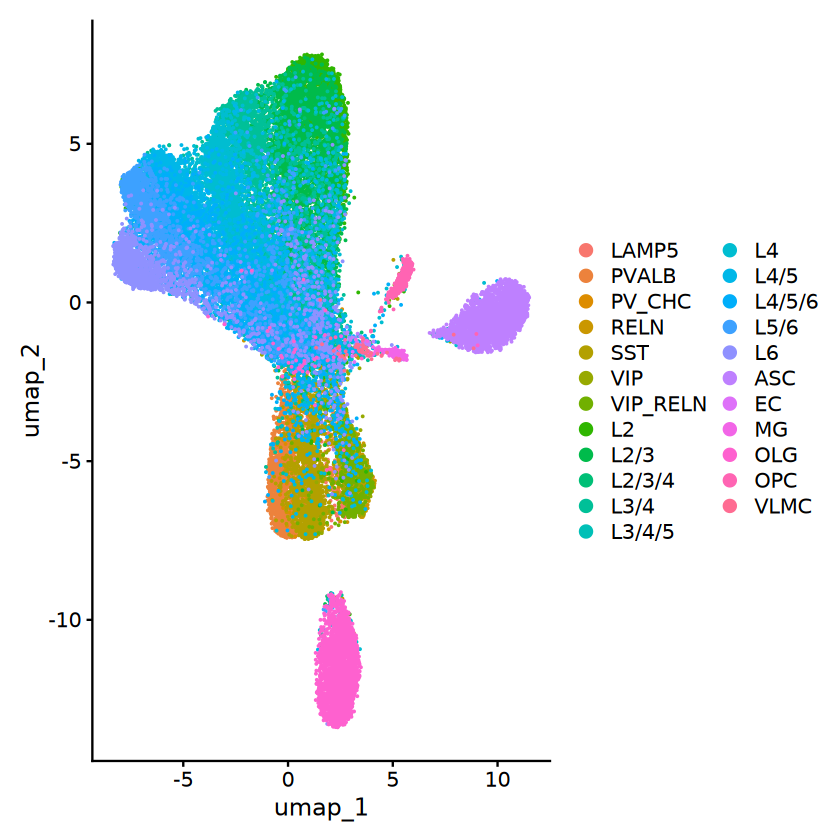

In [21]:
DimPlot(srtt)

### DTU calculate

In [6]:
transti = transtls$subclass
transti = merge(transti,cellan,by.x = "areatr",by.y = "subclass")
head(transti)
transti$relative = transti$count/transti$genecount
nrow(transti)
transti = transti[transti$count > 10,]
nrow(transti)
transti = transti %>% group_by(gene_id,class) %>% filter(length(areatr) > 1)
nrow(transti)
transti = transti %>% group_by(gene_id) %>% filter(length(unique(class)) == 3)
transti = transti %>% group_by(gene_id) %>% filter(length(unique(transcript_id)) > 1)
nrow(transti)
transti.wide = dcast(transti,gene_id+transcript_id~areatr,value.var = "relative")
dim(transti.wide)
transti.wide = transti.wide[,colSums(!is.na(transti.wide)) > 0.2*nrow(transti.wide)]
dim(transti.wide)
head(transti.wide)

areatr gene_id      transcript_id     count genecount class    
1 ASC    LOC107129104 XR_001489206.1     1     2        NonNeuron
2 ASC    LOC102139777 XR_001488298.1     1     1        NonNeuron
3 ASC    LOC102130709 LOC102130709-FS-3  9    23        NonNeuron
4 ASC    RER1         XM_015443766.1     1    73        NonNeuron
5 ASC    SDF2L1       XM_005567866.1    49    49        NonNeuron
6 ASC    TATDN1       XM_005564047.2    19    26        NonNeuron

[1] 412803

[1] 161145

[1] 157517

[1] 61675

[1] 5563   25

[1] 5563   21

gene_id transcript_id  ASC       L2        L2/3      L2/3/4    L3/4     
1 AACS    NM_001284010.1 0.7380952 0.8227848 0.8697479 1.0000000 0.8225108
2 AACS    XM_015430724.1 0.2619048 0.1772152 0.1302521        NA 0.1774892
3 AAMDC   AAMDC-FS-1     0.3238095 0.1584158 0.2200772 0.1549296 0.2058824
4 AAMDC   NM_001283690.1        NA 0.1485149 0.1274131 0.1830986 0.1911765
5 AAMDC   XM_005579175.2 0.5809524 0.6930693 0.6525097 0.6619718 0.6029412
6 AAMP    XM_005574266.2 0.6792453 0.7402597 0.7224880 0.8157895 0.7683616
  L3/4/5    L4        L4/5      ⋯ L5/6      L6        LAMP5  OLG      
1 0.9000000 0.9726027 0.8520179 ⋯ 0.8296296 0.9523810     NA 0.9056604
2        NA        NA 0.1479821 ⋯ 0.1703704        NA     NA        NA
3        NA 0.2040816 0.1659574 ⋯ 0.2019231 0.1836735     NA 0.1881720
4        NA 0.1428571 0.1446809 ⋯ 0.1153846 0.1530612     NA 0.1559140
5 0.8181818 0.6530612 0.6893617 ⋯ 0.6826923 0.6632653     NA 0.6559140
6 0.7647059 0.8188976 0.8250000 ⋯ 0.8617021 0.7777778 0.8125 0.8437500
  OPC       PVALB     RELN SST       VIP VIP_RELN 
1        NA 0.8813559   NA 0.7968750 NA         NA
2        NA        NA   NA 0.2031250 NA         NA
3        NA 0.2613636   NA 0.1486486 NA         NA
4        NA        NA   NA 0.1621622 NA         NA
5        NA 0.6363636 0.75 0.6891892 NA  0.7142857
6 0.9166667 0.8437500 0.75 0.8208955 NA  0.9230769

In [7]:
areatrs = unique(cellan$class)
areatrs
dtumkdf = NULL
for(i in areatrs){
    areatri = unique(cellan[cellan$class %in% i,]$subclass)
    for(j in 1:nrow(transti.wide)){
        transti.widei = transti.wide[j,]
        queryv = unlist(transti.widei[,colnames(transti.widei) %in% areatri])
        refv = unlist(transti.widei[,!colnames(transti.widei) %in% c(areatri,"gene_id","transcript_id")])
        queryv = queryv[!is.na(queryv)]
        refv = refv[!is.na(refv)]
        if(length(queryv) > 1 & length(refv) > 1){
            pv = t.test(queryv,refv)$p.value
            dr = mean(queryv) - mean(refv)
            dtumkdf = rbind(dtumkdf,
                            data.frame("gene_id" = transti.widei$gene_id,
                                       "transcript_id" = transti.widei$transcript_id,
                                      "pvalue" = pv,
                                      "dr" =  dr,
                                      "cluster" = i))
        }
    }
}
head(dtumkdf)

[1] "GLU"       "GABA"      "NonNeuron"

gene_id transcript_id  pvalue    dr          cluster
1 AACS    NM_001284010.1 0.2178764  0.06196210 GLU    
2 AACS    XM_015430724.1 0.2221621 -0.07185310 GLU    
3 AAMDC   AAMDC-FS-1     0.3492225 -0.04330717 GLU    
4 AAMDC   NM_001283690.1 0.2187589 -0.01285186 GLU    
5 AAMDC   XM_005579175.2 0.7308458  0.01066094 GLU    
6 AAMP    XM_005574266.2 0.3544943 -0.03090399 GLU

[1] 261

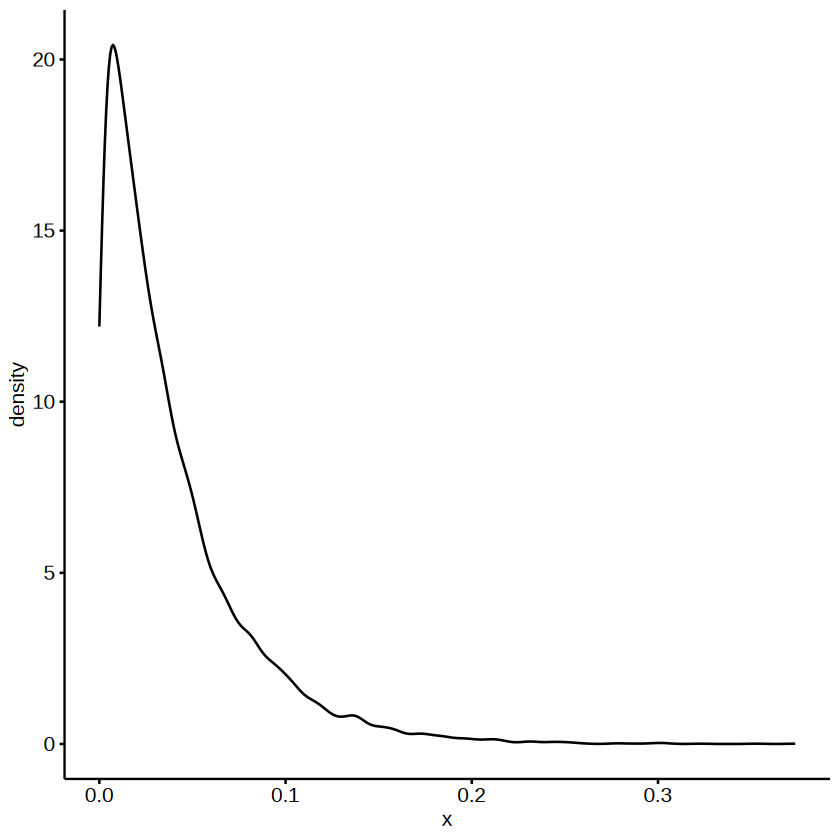

In [8]:
dtumkdf$qvalue = p.adjust(dtumkdf$pvalue)
ggdensity(abs(dtumkdf$dr))
nrow(dtumkdf[abs(dtumkdf$dr) > 0.1 & dtumkdf$pvalue < 0.05,])


     GABA       GLU NonNeuron 
       72        85       104 

gene_id transcript_id  pvalue      dr         cluster qvalue
59  AGPAT4  NM_001283744.1 0.036047929  0.1075413 GLU     1     
80  AKAP7   XM_005551840.2 0.001680890 -0.1270569 GLU     1     
147 APRT    APRT-FS-2      0.031255038 -0.1490733 GLU     1     
153 ARFIP2  NM_001283276.1 0.008221913  0.1434062 GLU     1     
154 ARFIP2  XM_005578789.2 0.005116373 -0.1711690 GLU     1     
188 ASIC3   XM_005551178.2 0.007652467 -0.1679861 GLU     1

Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors."


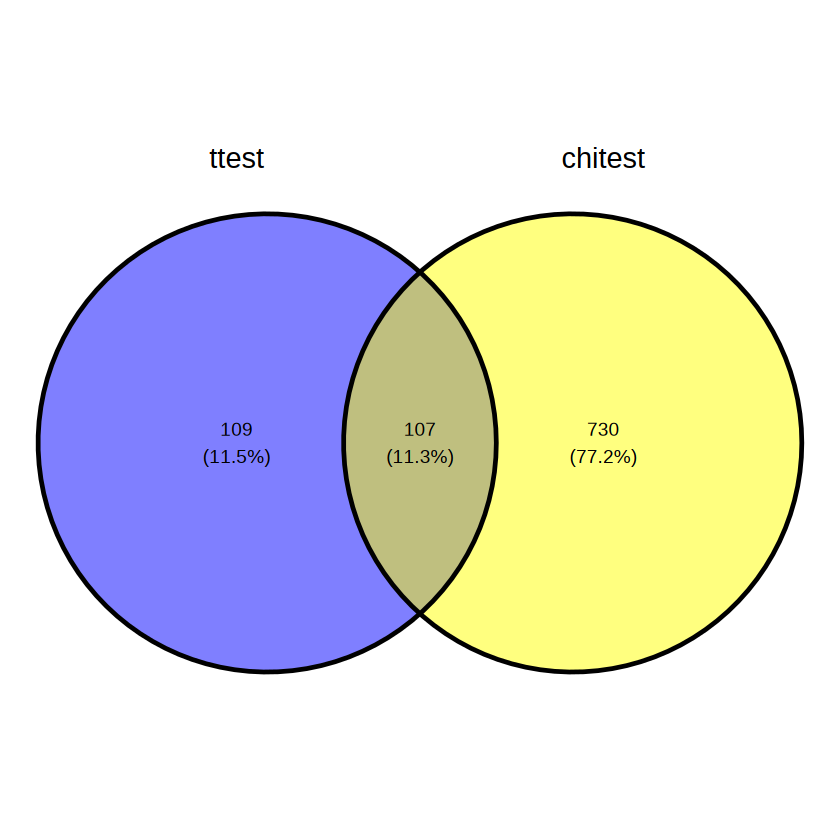

In [15]:
dtumkdf.hub = dtumkdf[abs(dtumkdf$dr) > 0.1 & dtumkdf$pvalue < 0.05,]
table(dtumkdf.hub$cluster)
head(dtumkdf.hub)
isosigi = isosigls$class
isosigi = isosigi[isosigi$sig != "N",]
library(ggvenn)
ggvenn(list("ttest" = dtumkdf.hub$transcript_id,"chitest" = isosigi$transcript_id))
qsave(dtumkdf.hub,file = "result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")

In [10]:
unique(dtumkdf.hub$gene_id)[order(unique(dtumkdf.hub$gene_id))]
dtumkdf[dtumkdf$gene_id == 'CDC42',]

[1] "AATK"         "ABHD6"        "AGPAT4"       "AIDA"         "AKAP7"       
  [6] "AKIP1"        "AKR1A1"       "APRT"         "ARFIP2"       "ARPP21"      
 [11] "ARRB1"        "ASIC3"        "ASL"          "B4GALT3"      "BOLA1"       
 [16] "BRE"          "C4H6orf120"   "C4H6orf203"   "CAMKK2"       "CAMLG"       
 [21] "CAPZB"        "CARNMT1"      "CCDC82"       "CD47"         "CDC37"       
 [26] "CDC42"        "CKMT1A"       "CLK1"         "CLTA"         "CMPK1"       
 [31] "CNN3"         "CSNK1G1"      "CSNK2A2"      "DAP3"         "DAPK1"       
 [36] "DCAF11"       "DCAF8"        "DCBLD2"       "DDHD1"        "DDX17"       
 [41] "DDX19B"       "DDX54"        "DLG2"         "DNAJC24"      "DPYSL4"      
 [46] "EIF1AD"       "ELMO2"        "ERCC1"        "ERGIC3"       "ETFA"        
 [51] "EXOSC3"       "FAM104A"      "FAM107B"      "FAM50A"       "FBXO16"      
 [56] "FLRT3"        "GALK1"        "GNG4"         "HIBCH"        "HNRNPH2"     
 [61] "HOPX"         "HSD17B6"      "HYOU1"        "IGFLR1"       "ING2"        
 [66] "IP6K2"        "IRS1"         "JOSD2"        "KLHL5"        "KXD1"        
 [71] "LAMP2"        "LANCL1"       "LOC101926696" "LOC102123414" "LOC102125828"
 [76] "LOC102139832" "LOC102141554" "LOC102142055" "LOC102145630" "LOC107127721"
 [81] "LOC107127847" "LOC107128490" "LOC107129729" "LOC107130962" "LZIC"        
 [86] "MAP2K5"       "MAPKAP1"      "MCFD2"        "MICU3"        "MKKS"        
 [91] "MORN4"        "MYL6"         "NOL3"         "NPRL3"        "NSMCE1"      
 [96] "NSUN5"        "NTMT1"        "NTNG1"        "NTRK2"        "NTRK3"       
[101] "OSBPL7"       "PAFAH1B3"     "PBDC1"        "PCDH10"       "PDE9A"       
[106] "PEX14"        "PFKP"         "PGGT1B"       "PHACTR3"      "PIGC"        
[111] "PLPPR2"       "POLD2"        "POLD4"        "POP5"         "PPP2R2B"     
[116] "PSME3"        "PSMG1"        "PTBP2"        "PVRL2"        "PVRL3"       
[121] "RABEPK"       "RAP1A"        "RAPGEF4"      "REEP3"        "RER1"        
[126] "REXO2"        "RGL1"         "RIC8B"        "RING1"        "RITA1"       
[131] "RNF123"       "RNF130"       "RNF219"       "RNPC3"        "RPF1_1"      
[136] "RPL22L1"      "RPS24"        "RPS6KB1"      "RSRC1"        "RWDD1"       
[141] "SCARB1"       "SEC11A"       "SEPT11"       "SEPT8"        "SH3GL2"      
[146] "SH3PXD2A"     "SIAH1"        "SIGMAR1"      "SKA2"         "SLC20A2"     
[151] "SMARCE1"      "SPRY2"        "SRGAP2"       "SRRD"         "SRSF5"       
[156] "SSBP4"        "ST8SIA5"      "STKLD1"       "STRA13"       "SUGP2"       
[161] "TAMM41"       "TCERG1"       "TCP11L1"      "TEX30"        "TMEM106B"    
[166] "TMEM107"      "TMEM155"      "TRNT1"        "TUBB2B"       "TUBGCP5"     
[171] "TYW3"         "UBE2W"        "UIMC1"        "UNC5B"        "UPF3B"       
[176] "USP20"        "VGLL4"        "WBP1"         "YDJC"         "ZBED5"       
[181] "ZHX1"         "ZNF251"       "ZNF528"       "ZNF652"       "ZNF800"

gene_id transcript_id  pvalue      dr          cluster   qvalue
522  CDC42   CDC42-FS-1     0.433487202  0.03450424 GLU       1     
523  CDC42   NM_001283401.1 0.393524283 -0.04840669 GLU       1     
4157 CDC42   CDC42-FS-1     0.029526024  0.07658166 GABA      1     
4158 CDC42   NM_001283401.1 0.001067779 -0.10277473 GABA      1     
7409 CDC42   CDC42-FS-1     0.002296756 -0.18914065 NonNeuron 1     
7410 CDC42   NM_001283401.1 0.004301516  0.17538476 NonNeuron 1

### Case plot funtion

In [12]:
#case plot
BuildPlotBed = function(npclf,nanobed,groupname,geneex,sigtr = NULL){
    readgroup = npclf[npclf$gene_id == geneex,]
    # readgroup = readgroup[readgroup$arealayer %in% paste0("l",1:6),]
    readgroup = unique(readgroup[c("readid","transcript_id","gene_id",
                                   groupname)])
    # readgroup = readgroup %>% group_by(readid) %>% 
    #   mutate(transgroup = 
    #            paste(unique(transcript_id)[order(unique(transcript_id))],
    #                              collapse = "|"))
    readgrt = nanobed[nanobed$name %in% readgroup$readid,]
    readgrt$group = readgroup[match(readgrt$name,
                                    readgroup$readid),
                              groupname]
    # readgrt$transcript_id = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transcript_id"]
    # readgrt$transgroup = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transgroup"]
    
    grtdfl = as.data.frame(readgrt)
    colnames(grtdfl)[ncol(grtdfl)] = "group"
    colnames(grtdfl)[6] = "readid"
    grtdfl = merge(grtdfl,readgroup[c("readid",
                              "transcript_id")],
          by = "readid")
    grtdfl = grtdfl[order(grtdfl$transcript_id,
                          grtdfl$start,grtdfl$end),]
    grtdfl = grtdfl[!is.na(grtdfl$group) &
                      grtdfl$group != "",]
    grtdfl
    grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
    grtdfl = grtdfl %>% group_by(group) %>% 
      mutate(orid = as.numeric(factor(readord,
                                      levels = unique(readord)))) %>%
      mutate(oridnorm = orid/max(orid))
    grtdfl$sig = "black"
    grtdfl[grtdfl$group %in% sigtr, "sig"] = "red"
    return(grtdfl)
}

IsoformReadPlot = function(gtfp, grtdfl, geneex, onlyhub = T,mycolor = NULL){
    library(randomcoloR)
    library(ggbio)
    library(ggtranscript)
    tartrans = gtfp[which(gtfp$gene_id == geneex),]
    tartrans = as.data.frame(tartrans)
    tartrans = tartrans[tartrans$type == "exon",]
    tartrans = tartrans[order(tartrans$transcript_id),]
    tartrans$orid = as.numeric(factor(tartrans$transcript_id,levels = unique(tartrans$transcript_id)))
    tartrans$group = NA
    if(onlyhub){
      grtdfl = grtdfl %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
      grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
      grtdfl = grtdfl %>% group_by(group) %>% 
        mutate(orid = as.numeric(factor(readord,
                                        levels = unique(readord)))) %>%
        mutate(oridnorm = orid/max(orid))
      tartrans = tartrans[tartrans$transcript_id %in% grtdfl$transcript_id,]
    }
    # tartrans = merge(tartrans,unique(grtdfl[c("transcript_id",
    #                                           "transgroup")]),
    #                  by = "transcript_id")
    tartranstx = tartrans %>% group_by(transcript_id,orid) %>% 
      summarise(start = min(start),end = max(end))
    tartranstx$group = NA
    mylim = c(min(tartranstx$start)-1000,max(tartranstx$end)+1000)
    library(ggh4x)
    
    #facetcol = list()
    #facetcoldf = unique(grtdfl[c("group","sig")])
    #facetcoldf = facetcoldf[order(facetcoldf$group,decreasing = F),]
    #for (i in 1:nrow(facetcoldf)) {
    #  facetcol[[i]] = element_text(color = facetcoldf[i,]$sig)
    #}
    #facetcol[[nrow(facetcoldf)+1]] = element_text(color = "black")
    grtdflin = to_intron(grtdfl,
                     "readord")
    no_of_colors = length(unique(grtdfl$transcript_id)) 
    colorful_palette = distinctColorPalette(no_of_colors) 
    names(colorful_palette) = unique(grtdfl$transcript_id)
    if(!is.null(mycolor)){
        colorful_palette = mycolor
    }

    
    pc = ggplot(grtdfl,aes(x = start,xend = end,
                      y = orid,
                      yend = orid,
                      fill = transcript_id,color = transcript_id)) +
      geom_segment(size = 0.5) +
      geom_segment(data = grtdflin,
                   aes(x = start,xend = end,
                       y = orid,
                       yend = orid),
                   size = 0.03,alpha = 0.5,color = "grey") +
      geom_range(data = tartrans,
                 aes(xstart = start,xend = end,
                     y = orid,
                     fill = transcript_id,color = transcript_id),
                 size = 0.2) +
      geom_intron(data = to_intron(tartrans,
                                   "transcript_id"),
                  aes(xstart = start,xend = end,strand = strand),
                  size = 0.2,
                  arrow.min.intron.length = 200,
                  arrow = arrow(length=unit(0.3,"cm"))) +
      geom_text(data = tartranstx,
                aes(x = (start + end) / 2,y = orid,
                    label = transcript_id),
                size = 3, vjust = -0.1, color = "black") +
     # facet_grid2(group~.,scales = "free",
     #             strip = strip_themed(
     #               text_y = facetcol
    #            )) +
      facet_wrap(group~.,scales = "free",ncol = 1,strip.position = "top") +
      scale_x_continuous(limits = mylim)+
      scale_color_manual(values = colorful_palette) +
      scale_fill_manual(values = colorful_palette) +
      # scale_fill_discreterainbow() +
      # scale_color_discreterainbow() +
      theme_void() + 
      ggtitle(geneex) +
      theme(legend.position = "none",
            panel.spacing = unit(0,'lines'),
            strip.background = element_rect(fill = NA,color = NA),
           strip.placement = "outside",
           plot.title = element_text(hjust = 0.5))
    pc
    
    return(pc)
}
#fsraw.cor = fsraw[fsraw$layer %in% paste0("l",1:6),]
#
IsoformReadPlotTotal = function(fsraw,isosigi,longbed,gtf,geneex,hubtrans = NULL,onlyhub = F,mycolors =NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(transname))
        names(mycolors) = transname
    }
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub,mycolors)
    pci1
    return(pci1)
}

CaseCountPlotBox = function(fsraw,geneex,transname,mycolors = NULL){
    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(unique(npcase1$transcript_id)))
    }
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }
    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      # geom_line(data = npcase1m,aes(x = areatr, y = mean,
      #                              group = transcript_id),
      #           position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + 
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5)) +
    xlab("") + ylab("Isoform read ratio")
    return(pci2)
}

CasePlotTotalClass = function(fsraw,isosigi,gtf,geneex,hubtrans = NULL,markdfb,edgesdf){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    print(mycolors)
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    print(head(grtdfl))
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
#ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
#           width = 6,height = 5)

    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }


    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
#library(ggstatsplot)

    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      geom_line(data = npcase1m,aes(x = areatr, y = mean,
                                   group = transcript_id),
                position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + xlab("") + ylab("Isoform read ratio")
    
#     pci2 = ggbarplot(npcase1,
#                     x = "areatr", y = "rate", 
#                     fill = "areatr",size = 0.5,
#                     width = 0.7,facet.by = "transcript_id",
#                     add = c("mean_se")) +
#         geom_jitter(data = npcase1,
#                 aes(x = areatr, y = rate),size = 0.3,
#                     width = 0.25) +
#         scale_fill_flatui() +
# #        scale_fill_manual(values = mycolors) +
#         stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,
#                            ref.group = ".all.") + 
#         xlab("") + ylab("Isoform ratio") + labs(fill = "") +
#         theme_pubr() + 
#     theme(axis.text.x = element_blank(),
#          axis.ticks.x = element_blank(),
#           legend.position = "bottom")
#     pci2
    pci3 = MarkerSpPlot(fsraw.cor,markdfb,geneex,hubtrans,edgesdf,200)
    #pci3 = MarkerSpPlot(fsrawdp.cell,fsrawdp.cellb,geneex,mycolors,hubtrans)
    
    pci = ggarrange(ggarrange(pci1,pci2,widths = c(1.5,2),ncol = 1),pci3,nrow = 1)
    return(pci)
}


In [13]:
#
CasePlotTotalClass = function(fsraw,isosigi,gtf,geneex,srtt,hubtrans = NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    #print(mycolors)
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    #print(head(grtdfl))
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
#ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
#           width = 6,height = 5)

    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$count > 5,]
    npcase1 = npcase1[npcase1$areatr != "",]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }
    
    pci2 = ggbarplot(npcase1,
                    x = "areatr", y = "rate", 
                    fill = "areatr",size = 0.5,
                    width = 0.7,facet.by = "transcript_id",
                    add = c("mean_se")) +
        geom_jitter(data = npcase1,
                aes(x = areatr, y = rate),size = 0.3,
                    width = 0.25) +
        scale_fill_flatui() +
#        scale_fill_manual(values = mycolors) +
        stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.5,
                           comparisons = list(c("GABA","GLU"),c("GABA","NonNeuron"),c("GLU","NonNeuron"))) + 
        xlab("") + ylab("Isoform ratio") + labs(fill = "") +
        theme_pubr() + 
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank(),
          legend.position = "bottom")
    pci2

    featurei = gsub(transname,pattern = "_",replacement = "-")
    featurei = paste0(geneex,"-",featurei)
    pci3 = list()
    DefaultAssay(srtt) = "ISOFORM"
    isodf = GetAssayData(srtt,assay = "ISOFORM")
    umapdf = as.data.frame(srtt@reductions$umap@cell.embeddings)
    for(i in 1:length(featurei)){
        # library(ggpointdensity)
        isodfi = isodf[featurei[i],]
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
        pci3i = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(featurei[i]) + coord_fixed()
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
        # ggtitle(featurei[i]) + theme_void() + coord_fixed()
        pci3[[i]] = pci3i
    }
    pci3 = ggarrange(plotlist = pci3,common.legend = T,legend = "bottom")
    pci = ggarrange(ggarrange(pci1,pci2,widths = c(1.5,1),ncol = 1),pci3,nrow = 1,widths = c(1,1))
    return(pci)
}


In [14]:
MarkerSpPlot = function(npclfdp.cell,npclfdp.cellb,geneex,mycolor = NULL,hubtrans = NULL){
    markdf = npclfdp.cell[npclfdp.cell$gene_id %in% geneex,]
    if(!is.null(hubtrans)){
        markdf = markdf[markdf$transcript_id %in% hubtrans,]
    }
    markdfb = npclfdp.cellb[!npclfdp.cellb$cell_id %in% markdf$cell_id,]
    markdf = markdf %>% group_by(cell_id,gene_id) %>% mutate(readrate = readnum/sum(readnum))
    markdf = markdf[markdf$readrate > 0.5,]
    markdfst = markdf %>% group_by(transcript_id) %>% summarise(cellnum = length(cell_id))
    markdfst$cellpop = markdfst$cellnum/sum(markdfst$cellnum)
    markdfst = markdfst[markdfst$cellpop > 0.01,]
    markdf = markdf[markdf$transcript_id %in% markdfst$transcript_id,]

    if(is.null(mycolor)){
        mycolor = distinctColorPalette(length(unique(markdf$transcript_id)))
    }
    
    pmkpti = ggplot() +
      scattermore::geom_scattermore(
        data = markdfb,
        aes(x,y),
        color = "white",
        # pixels = raster.dpi,
        pointsize = 0.05
      ) +
      geom_point(data = markdf,
                 aes(x,y,color = transcript_id,size = readnum)) + 
      scale_size(range = c(0.05,0.1)) +
      # facet_wrap(~gene_id,nrow = 2) +
      theme_void() + 
      scale_color_manual(values = mycolor) +
      theme_presentation() + 
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 6)) +
      guides(color = guide_legend(override.aes = list(size=4),
                                  nrow = 2),
            size = "none") +
      scale_y_reverse() + scale_x_reverse()
    pmkpti
    return(pmkpti)
}

### Celltype spatial and MetaCell annotation

In [ ]:
fsraw = qread("main_data_read_total_annotation")

In [ ]:
cellanuq = qread("ref/cellball_annotation_n10_24_04_03.qs")
head(cellanuq)

In [ ]:
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
nrow(cellanuq)

In [ ]:
cellanuq.meta = cellanuq %>% group_by(metacell,class,subclass,layer) %>% summarise(x = mean(x),y = mean(y),cellnum = length(unique(cell_id)))

In [ ]:
pmetacp = ggplot(data = cellanuq, aes(x, y,color = layer)) +
    scattermore::geom_scattermore(
        pointsize = 1.5
      ) +
    # geom_pointdensity(size = 0.1) +
    scale_color_discreterainbow() +
    # scale_color_viridis(option = "D") +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_wrap(~subclass) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
pmetacp
ggexport(pmetacp, filename = "result/figure2/subclass_annotation_facet_wrap_24_05_14.pdf", width = 12, height = 12)

In [ ]:
pmetacp2 = ggplot(data = cellanuq, aes(x, y,color = layer)) +
    scattermore::geom_scattermore(
        pointsize = 1.5
      ) +
    # geom_pointdensity(size = 0.1) +
    scale_color_discreterainbow() +
    # scale_color_viridis(option = "D") +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_grid(~class) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
pmetacp2
ggexport(pmetacp2, filename = "result/figure2/class_annotation_facet_wrap_24_05_14.pdf", width = 8, height = 2.4)

In [ ]:
pmetacp = ggplot(data = cellanuq,aes(x, y)) +
    geom_pointdensity(size = 0.01) + 
    scale_color_viridis(option = "D") +
    #scale_color_smoothrainbow(discrete = T) +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_wrap(~subclass) +
    theme_presentation() + 
    scale_y_reverse() + 
    scale_x_reverse()
pmetacp

### Long read MetaCell UMAP

In [ ]:
gtfdf = as.data.frame(gtf)
gtfdf$gene_idnew = gtfdf$gene_id
gtfdf[gtfdf$seqnames == "NC_012670.1",]$gene_idnew = paste0("MT-",gtfdf[gtfdf$seqnames == "NC_012670.1",]$gene_id)
genenm = unique(gtfdf[,c("gene_id","gene_idnew")])
nrow(genenm)

In [ ]:
#build meta cell
cellan = qread("../ref/T44_cell_pos_type_area_annotation_nobackground_23_08_16.qs")
cellanuq = cellan[!is.na(cellan$cell_id),] %>% group_by(cell_id, class, subclass, cell_type, areaid,layer) %>% 
summarise(x = mean(x),y = mean(y))

n = 10
CellBallCluster = function(n,x,y){
    data = data.frame("x" = x, "y" = y)
    num_clusters <- ceiling(nrow(data) / n)
    # 使用k-means进行聚类
    kmeans_result <- kmeans(data[c("x","y")], centers = num_clusters)
    # 将每个点的分组分配到data中
    return(kmeans_result$cluster)
}

cellanuq = cellanuq  %>% group_by(areaid,layer,class,subclass) %>% mutate(cluster = CellBallCluster(n,x,y))


In [ ]:
cellanuq$metacell = paste0(cellanuq$class,"-",cellanuq$subclass,"-",cellanuq$layer,"-",cellanuq$areaid,"-",cellanuq$cluster)
cellanuq = cellanuq %>% group_by(metacell) %>% 
      mutate(cellnum = length(unique(cell_id)))
summary(cellanuq$cellnum)
length(unique(cellanuq$metacell))
qsave(cellanuq,file = "ref/cellball_annotation_n10_24_10_24.qs")

In [ ]:
length(unique(cellanuq[cellanuq$cellnum > 3,]$metacell))
#summary(cellanuq.old$cellnum)
length(unique(cellanuq.old[cellanuq.old$cellnum > 3,]$metacell))

In [55]:
#cellanuq = qread("ref/cellball_annotation_n10_24_04_03.qs")
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
cellanuq = cellanuq %>% group_by(cell_id) %>% filter(n() == 1)
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
cellanuq = cellanuq[cellanuq$cellnum > 3,]
nrow(cellanuq)

[1] 380986

In [55]:
head(cellanuq)
datas3$metacell = cellanuq

cell_id class subclass cell_type                   areaid layer x       
1  2      GLU   L5/6     GLU L5/6.8 RXFP1/KRT17      VIP    l6    22809.65
2  8      GLU   L6       GLU L6.8 SYT6/SEMA3E        v23b   l2    15164.54
3 18      GABA  RELN     GABA RELN.11 ADARB2/NDNF    23c    l5    16832.75
4 25      GLU   L4/5     GLU L4/5.6 DSG2/DRD3        V3v    l6    18633.42
5 31      GABA  PVALB    GABA PVALB.9 POSTN/ADAMTS20 TEO    l3    42829.32
6 36      GLU   L2       GLU L2.5 ADAMTS12/GIPC2     FST    l2    40998.10
  y        cluster metacell             cellnum
1 52865.12 39      GLU-L5/6-l6-VIP-39    5     
2 73537.81  2      GLU-L6-l2-v23b-2      6     
3 42088.91  1      GABA-RELN-l5-23c-1    7     
4 80957.13  4      GLU-L4/5-l6-V3v-4    10     
5 70858.90 43      GABA-PVALB-l3-TEO-43 20     
6 71728.81 38      GLU-L2-l2-FST-38     20

In [ ]:
ngscount = fread("/cluster/home/xiliyuan/T44_info/total_gene_T44_macaque_f001_2D_macaque1-20230306.txt")
fsraw = fsraw[fsraw$class != "" & fsraw$layer %in% paste0("l",1:6),]
fsraw$metacell = cellanuq[match(fsraw$cell_id,cellanuq$cell_id),]$metacell
genect = fsraw %>% group_by(metacell,gene_id) %>% 
    summarise(count = length(readid))
ngscount = ngscount[ngscount$cell_label != 0,]
ngscount$metacell = cellanuq[match(ngscount$cell_label,cellanuq$cell_id),]$metacell
ngscount = ngscount[!is.na(ngscount$metacell),]
head(ngscount)
genect.ngs = ngscount %>% group_by(metacell,gene) %>% 
    summarise(count = sum(umi_count))
head(genect.ngs)
qsave(genect.ngs,"data/meta_cell_ngs/ngs_isoform_metacell_gene_n10_24_10_23.qs")
qsave(genect,"data/meta_cell_ngs/nano_isoform_metacell_gene_n10_24_10_23.qs")
#ngscount = fread("/cluster/home/xiliyuan/T44_info/total_gene_T44_macaque_f001_2D_macaque1-20230306.txt")
# transct = fsraw %>% group_by(metacell,transcript_id) %>% 
#     summarise(count = length(readid))
# head(transct)

In [ ]:
#genect.ngs = qread("data/meta_cell_ngs/ngs_isoform_metacell_gene_n10_24_10_23.qs")
#genect = qread("data/meta_cell_ngs/nano_isoform_metacell_gene_n10_24_10_23.qs")
#build gene matrix
colnames(genect.ngs)[2] = "gene_id"
genectt = rbind(genect,genect.ngs)
genectt = genectt %>% group_by(metacell,gene_id) %>% summarise(count = sum(count))
summary(genectt$count)

In [ ]:
genectt.st = genectt %>% group_by(gene_id) %>%summarise(count = sum(count))
nrow(genectt.st)
genectt.st = genectt.st[genectt.st$count > 50,]
nrow(genectt.st)

In [ ]:
#genectt = genectt[!is.na(genectt$metacell),]
genectt = genectt[genectt$metacell %in% cellanuq$metacell & genectt$gene_id %in% genectt.st$gene_id,]
#genemx = tidyr::spread(genectt, key = metacell, value = count, fill = 0)
genemx = dcast.data.table(setDT(genectt), gene_id~metacell, value.var = "count", fun.aggregate = sum)
#genemx = dcast(genectt, gene_id~metacell, value.var = "count", fun.aggregate = sum)
dim(genemx)

In [ ]:
#genemx = qread("data/meta_cell_ngs/total_gene_cell_st_metacell_n10_mx_24_10_23.qs")
genemx = as.data.frame(genemx)
rownames(genemx) = genemx$gene_id
genemx = genemx[,-1]

In [ ]:
qsave(genemx,file = "data/meta_cell_ngs/total_gene_cell_st_metacell_n10_mx_24_10_23.qs")
genemx = genemx[rownames(genemx) %in% genenm$gene_id,]
dim(genemx)
rownames(genemx) = genenm[match(rownames(genemx),genenm$gene_id),]$gene_idnew

In [ ]:
ProcessSrtUmapSingle = function(genemx,cellidan){
    srtt = CreateSeuratObject(genemx)
    srtt = NormalizeData(srtt)
    srtt = ScaleData(srtt)
  #  srtt[["percent.mt"]] <- PercentageFeatureSet(srtt, pattern = "^MT-")
    #srtt <- SCTransform(srtt, new.assay.name = "SCT_GENE")
    #srtt = SCTransform(srtt,new.assay.name = "SCT_GENE")
    
    srtt$class = MySplit(colnames(srtt),"-",1)
    names(srtt$class) = colnames(srtt)
    srtt$subclass = MySplit(colnames(srtt),"-",2)
    names(srtt$subclass) = colnames(srtt)
    srtt$layer = MySplit(colnames(srtt),"-",3)
    names(srtt$layer) = colnames(srtt)
    srtt$region = MySplit(colnames(srtt),"-",4)
    names(srtt$region) = colnames(srtt)
    
    # VariableFeatures(srtt) = c(VariableFeatures(srtg),sigtrangroup)
    srtt <- FindVariableFeatures(srtt, selection.method = "vst",
                                 nfeatures = 2000)
    VariableFeatures(srtt) = c(VariableFeatures(srtt))
    srtt <- RunPCA(srtt,
                   #assay =  "SCT_GENE",
                   features = VariableFeatures(object = srtt))
    srtt <- FindNeighbors(srtt, dims = 1:20)
    srtt <- FindClusters(srtt, resolution = 0.5)
    srtt <- RunUMAP(srtt, dims = 1:10)
    Idents(srtt) = srtt$subclass
    DimPlot(srtt)
    
    return(srtt)
}


In [ ]:
library(Seurat)
dim(genemx)
genemxf = genemx[, colSums(genemx > 0) > 1000]
dim(genemxf)
srtt = ProcessSrtUmapSingle(genemxf,cellidan)

DimPlot(srtt,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

file saved to result/figure3/metacell_n10_umap_cluster_genecounts_with_ont-ngs-24_12_05.pdf



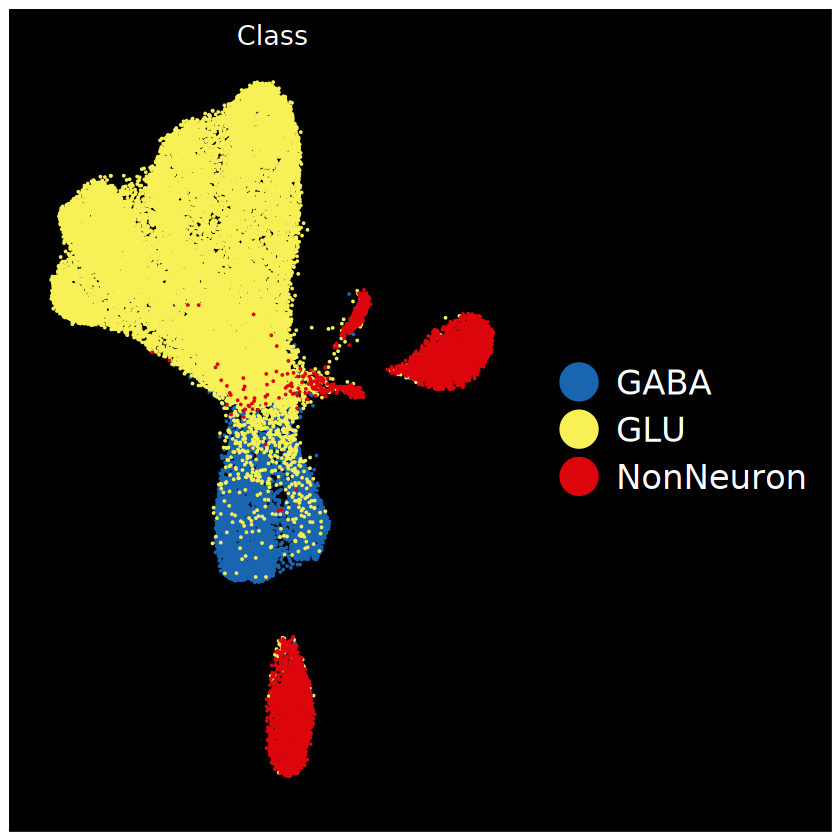

In [123]:
psrtg1 = DimPlot(srtt,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'subclass',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Subclass") +
    theme_presentation() + 
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    scale_color_discreterainbow()
  
psrtg2 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'layer',pt.size = 0.01) +
    theme_presentation() +
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Layer") +
    scale_color_discreterainbow()
  
psrtg3 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'class',pt.size = 0.01) +
    theme_presentation() +
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Class") +
    scale_color_discreterainbow()
psrtg3
ggexport(psrtg1+psrtg2+psrtg3,filename = "result/figure3/metacell_n10_umap_cluster_genecounts_with_ont-ngs-24_12_05.pdf",
           width = 25, height = 8)

In [283]:
g <- ggplot_build(psrtg1)
unique(g$data[[1]]$colour)

[1] "#90C987" "#EE8026" "#F4A736" "#E65518" "#DC050C" "#A5170E" "#72190E"
 [8] "#CAACCB" "#BA8DB4" "#AA6F9E" "#994F88" "#882E72" "#1965B0" "#437DBF"
[15] "#6195CF" "#7BAFDE" "#4EB265" "#E8ECFB" "#D9CCE3" "#CAE0AB" "#F7F056"
[22] "#F7CB45" "#42150A"

In [ ]:
qsave(srtt,file = "data/meta_cell_ngs/total_gene_metacell_n10_srt_24_10_24.qs")

#### Add isoform information

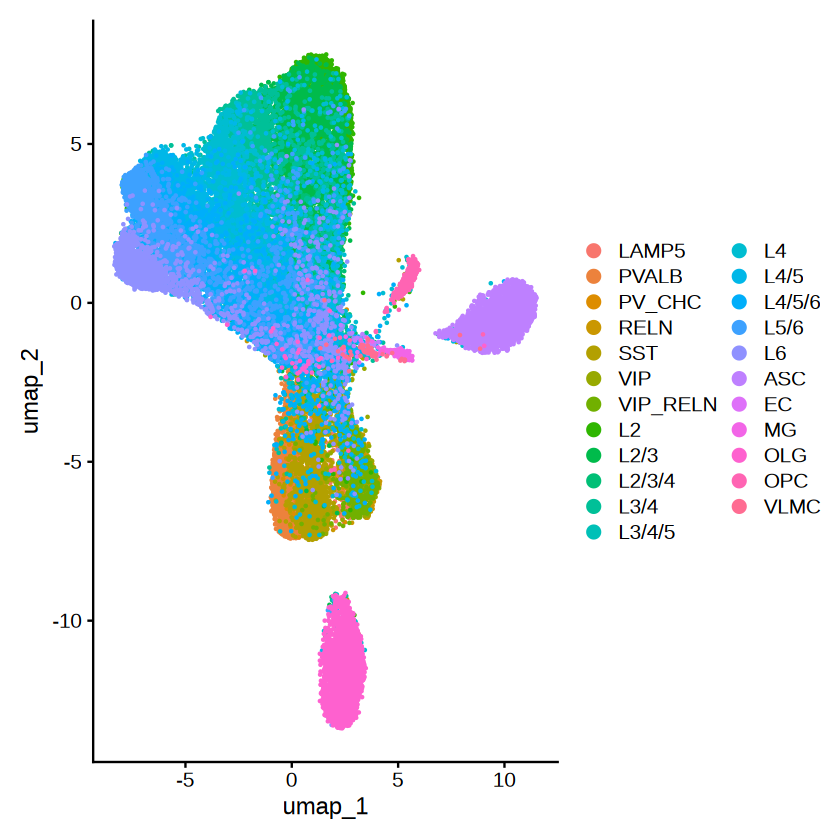

In [65]:
srtt = qread(file = "data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_n10_24_11_12.qs")
DimPlot(srtt)

In [66]:
fsraw.cor = fsraw.cor[fsraw.cor$class != "" & fsraw.cor$layer %in% paste0("l",1:6),]
fsraw.cor$metacell = cellanuq[match(fsraw.cor$cell_id,cellanuq$cell_id),]$metacell
transct = fsraw.cor %>% group_by(metacell,gene_id,transcript_id) %>% 
    summarise(count = length(readid))
transct = transct[!is.na(transct$metacell),]
transct.st = transct %>% group_by(transcript_id) %>%summarise(count = sum(count))
nrow(transct.st)
transct.st = transct.st[transct.st$count > 50,]
nrow(transct.st)

transct = transct[transct$metacell %in% cellanuq$metacell & transct$transcript_id %in% transct.st$transcript_id,]
transct$transcript_id = paste0(transct$gene_id,"|",transct$transcript_id)
transmx = dcast.data.table(setDT(transct), transcript_id~metacell, value.var = "count", fun.aggregate = sum)
transmx = as.data.frame(transmx);rownames(transmx) = transmx$transcript_id;transmx = transmx[,-1]
#isomx = qread("data/meta_cell_ngs/nano_isoform_count_mx_metacell_n10_st_24_03_28.qs")
qsave(transmx,file = "data/meta_cell_ngs/nano_isoform_cell_st_metacell_n10_mx_25_12_03.qs")

DefaultAssay(srtt)
srtt[['ISOFORM']] = CreateAssayObject(transmx[,colnames(srtt)])
DefaultAssay(srtt) = "ISOFORM"
srtt = NormalizeData(srtt)
srtt = ScaleData(srtt)
DefaultAssay(srtt) = "RNA"
qsave(srtt,file = "data/meta_cell_ngs/umap_srt_combined_with_isoform_25_12_03.qs")

[1] "RNA"

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have pipe characters ('|'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have pipe characters ('|'), replacing with dashes ('-')"
Warning message:
"Different cells and/or features from existing assay ISOFORM"
Centering and scaling data matrix



In [ ]:
transmxf = transmx[rowSums(transmx > 0 )>(ncol(transmx)/100),colnames(genemxf)]
srttc = ProcessSrtUmapSingle(rbind(genemxf,transmxf),cellidan)

DimPlot(srttc,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
DimPlot(srtt,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
#single cell test
fsraw = fsraw[fsraw$class != "" & fsraw$layer %in% paste0("l",1:6),]
cellids = unique(fsraw$cell_id)
cellids.sample = sample(cellids, replace = FALSE,20000)
fsraw.test = fsraw[fsraw$cell_id %in% cellids.sample,]
fsraw.test$metacell = paste0(fsraw.test$class,"-",fsraw.test$subclass,"-",fsraw.test$layer,"-",fsraw.test$region,"-",fsraw.test$cell_id)
genect.test = fsraw.test %>% group_by(metacell,gene_id) %>% 
    summarise(count = length(readid))

cellanuq.down = unique(fsraw.test[,c("cell_id","metacell")])
ngscount.test = ngscount[ngscount$cell_label %in% cellids.sample,]
ngscount.test$metacell = cellanuq.down[match(ngscount.test$cell_label,cellanuq.down$cell_id),]$metacell
genect.ngs.test = ngscount.test %>% group_by(metacell,gene) %>% 
    summarise(count = sum(umi_count))
colnames(genect.ngs.test)[2] = "gene_id"
genectt.test = rbind(genect.test,genect.ngs.test)
genectt.test = genectt.test %>% group_by(metacell,gene_id) %>% summarise(count = sum(count))
summary(genectt.test$count)
genectt.test = genectt.test[genectt.test$gene_id %in% genectt.test$gene_id,]
#genemx = tidyr::spread(genectt, key = metacell, value = count, fill = 0)
genemx.test = dcast.data.table(setDT(genectt.test), gene_id~metacell, value.var = "count", fun.aggregate = sum)
genemx.test = as.data.frame(genemx.test);rownames(genemx.test) = genemx$gene_id;genemx.test = genemx.test[,-1]
qsave(genemx.test,file = "data/meta_cell_ngs/total_gene_cell_st_metacell_n1_mx_downsample_24_10_23.qs")
srtt.down = ProcessSrtUmapSingle(genemx.test,cellidan)

DimPlot(srtt.down,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
# cellidan = data.frame("metacell" = colnames(genemx))
# cellidan$class = MySplit(cellidan$metacell,"-",1)
# cellidan$subclass = MySplit(cellidan$metacell,"-",2)
# cellidan$layer = MySplit(cellidan$metacell,"-",3)
# cellidan$areaid = MySplit(cellidan$metacell,"-",4)
# colnames(cellidan)[1] = "cell_id"
# qsave(cellidan,file = "data/meta_cell_ngs/metacell_annotation_n10_24_08_25.qs")
cellidan = qread("data/meta_cell_ngs/metacell_annotation_n5_24_08_25.qs")

In [ ]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
srtt[["percent.mt"]] <- PercentageFeatureSet(srtt, pattern = "^MT-")
# Visualize QC metrics as a violin plot
VlnPlot(srtt, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,idents = NULL)

In [ ]:
Exmatrix = function(genect){
    genemx.fl = tidyr::spread(genect, key = metacell, value = count, fill = 0)
    genemx.fl = as.data.frame(genemx.fl)
    rownames(genemx.fl) = genemx.fl$gene_id;genemx = genemx[-1]
    genemx.fl = genemx.fl[,cellidanf$cell_id]
    return(genemx.fl)
}
genemx.fl = Exmatrix(genect)
# genemx.flf = genemx.fl[rowSums(genemx.fl > 0 )>(ncol(genemx.fl)/100),
#                    colSums(genemx.fl > 0) > 500]
dim(genemx.flf)
srtt.fl = ProcessSrtUmapSingle(genemx.fl,cellidan)


genemx.ngs = Exmatrix(genect.ngs)
genemx.ngsf = genemx.ngs[rowSums(genemx.ngs > 0 )>(ncol(genemx.ngs)/100),
                   colSums(genemx.ngs > 0) > 500]
dim(genemx.ngsf)
srtt.ngs = ProcessSrtUmapSingle(genemx.ngsf,cellidan)


In [ ]:
DimPlot(srtt.fl,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

DimPlot(srtt.ngs,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

DimPlot(srtt,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
transids = unique(transct$transcript_id)
transids1 = transids[1:as.integer(length(transids)/2)]
transids2 = transids[as.integer(length(transids)/2):length(transids)]
isomx1 = dcast.data.table(setDT(transct[transct$transcript_id %in% transids1,]), transcript_id~metacell,  value.var = "count",fill = 0)
isomx1 = as.data.frame(isomx1)
rownames(isomx1) = isomx1$transcript_id;isomx1 = isomx1[-1]

isomx2 = dcast.data.table(setDT(transct[transct$transcript_id %in% transids2,]), transcript_id~metacell,  value.var = "count",fill = 0)
isomx2 = as.data.frame(isomx2)
rownames(isomx2) = isomx2$transcript_id;isomx2 = isomx2[-1]
cmd = intersect(colnames(isomx2),colnames(isomx1))
isomx = rbind(isomx1[,cmd],isomx2[,cmd])
qsave(isomx,"data/meta_cell_ngs/nano_isoform_metacell_n10_mx_24_08_25.qs")

genemx = dcast.data.table(setDT(genect), gene_id~metacell,  value.var = "count",fill = 0)
genemx = as.data.frame(genemx)
rownames(genemx) = genemx$gene_id;genemx = genemx[-1]
qsave(genemx,"data/meta_cell_ngs/nano_gene_metacell_n10_mx_24_08_25.qs")

In [ ]:
srtg = ProcessSrtUmapSingle(genemx,cellidan)
srti = ProcessSrtUmapSingle(isomx,cellidan)

qsave(srtg,"data/meta_cell_ngs/nano_gene_metacell_n10_srt_24_08_25.qs")
qsave(srti,"data/meta_cell_ngs/nano_isoform_metacell_n10_srt_24_08_25.qs")

In [ ]:
DimPlot(srtg,group = "layer")
DimPlot(srti,group = "layer")

In [ ]:
#try n20
genemx = GetAssayData(srtt,"RNA")
genemx = as.data.frame(genemx)
genemx$gene_id = rownames(genemx)
genedf = melt(genemx)
head(genedf)

In [ ]:
genedf = genedf[genedf$value != 0,]
genedf$variable = as.character(genedf$variable)
genedf$clusterid = as.numeric(MySplit(genedf$variable,"-",5))
genedf$class = MySplit(genedf$variable,"-",1)
genedf$subclass = MySplit(genedf$variable,"-",2)
genedf$layer = MySplit(genedf$variable,"-",3)
genedf$region = MySplit(genedf$variable,"-",4)
genedf$clusterid2 = as.integer(genedf$clusterid/2)
qsave(genedf,"data/meta_cell_ngs/total_isoform_metacell_gene_n10_24_11_12.qs")
genedf$metacell = paste0(genedf$class,"-",genedf$subclass,"-",genedf$layer,"-",genedf$region,"-",genedf$clusterid2)

In [ ]:
genedf = genedf %>% group_by(metacell,gene_id) %>% summarise(count = sum(value))
genemx = dcast.data.table(setDT(genedf), gene_id~metacell, value.var = "count", fun.aggregate = sum)
genemx = as.data.frame(genemx);rownames(genemx) = genemx$gene_id;genemx = genemx[,-1]
dim(genemx)
#genemxf = genemx[, colSums(genemx > 0) > 1000]
srtt.n20 = ProcessSrtUmapSingle(genemx)


In [ ]:
DimPlot(srtt.n20,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'subclass',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("layer") +
    theme_presentation() +
    scale_color_discreterainbow()

#### Velocity Analysis

In [ ]:
#velocity calculate
library(Seurat)
library(velocyto.R)
library(SeuratWrappers)

##### Build NGS splicing matrix

In [ ]:
#ngs spliced data build
#filels = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ngs_staralign_splice/summary_split_stat/",full.names = T)
#ngssl = NULL
for(i in 44:length(filels)){
    ngssli = qread(filels[i])
    ngssl = rbind(ngssl,ngssli)
    ngssl = ngssl %>% group_by(cell_id,origin_name,subclass,type,gene_id) %>% summarise(count = sum(count))
    print(i)
}
qsave(ngssl,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ngs_staralign_splice/splice_summary_stat_24_11_21.qs")

In [ ]:
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
head(cellanuq)
head(ngssl)

In [ ]:
ngssl$splice = "unspliced"
ngssl[ngssl$type == "exonic",]$splice = "spliced"
ngssl = ngssl[ngssl$subclass != "",]
ngssl$metacell = cellanuq[match(ngssl$cell_id,cellanuq$cell_id),]$metacell
spdfcl.ngs = ngssl %>% group_by(metacell, splice, gene_id) %>% summarise(count = sum(count))
spdfcl.ngs = spdfcl.ngs[!is.na(spdfcl.ngs$metacell),]
spdfcl.ngs$metacell = as.character(spdfcl.ngs$metacell)
spdfcl.ngs = spdfcl.ngs %>% group_by(metacell,splice,gene_id) %>% summarise(count = sum(count))
qsave(spdfcl.ngs,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_ngs_st_df_24_11_12.qs")

In [ ]:
spmx.sp = dcast.data.table(setDT(spdfcl.ngs[spdfcl.ngs$splice == "spliced",]), gene_id~metacell,  value.var = "count",fill = 0)
spmx.sp = as.data.frame(spmx.sp)
rownames(spmx.sp) = spmx.sp$gene_id;spmx.sp = spmx.sp[-1]
#qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_24_11_12.qs")
qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_ngs_st_24_11_12.qs")
spmx.usp = dcast.data.table(setDT(spdfcl.ngs[spdfcl.ngs$splice == "unspliced",]), gene_id~metacell,  value.var = "count",fill = 0)
spmx.usp = as.data.frame(spmx.usp)
rownames(spmx.usp) = spmx.usp$gene_id;spmx.usp = spmx.usp[-1]
#qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_24_11_12.qs")
qsave(spmx.usp,file = "data/meta_cell_ngs/isoform_unsplice_rate_mx_metacell_n10_ngs_st_24_11_12.qs")
#srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_24_10_24.qs")
srtt[['spliced']] = CreateAssayObject(spmx.sp[,colnames(srtt)])
srtt[['unspliced']] = CreateAssayObject(spmx.usp[,colnames(srtt)])
srtt[['ambiguous']] = srtt[['RNA']]


In [ ]:
qsave(srtt,"data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_ngs_n10_24_11_12.qs")

##### Build fullscope splicing matrix

In [ ]:
#bedids.info = qread("data/reads_full_anotation/fullscope_bed_read_block_info_09_11.qs")
#bedids.infof = bedids.info[bedids.info$layer %in% paste0("l",1:6) & !is.na(bedids.info$subclass),]
read.notran = read.totalan[is.na(read.totalan$transcript_id),]
length(unique(read.notran$readid))
length(unique(read.totalan$readid))
longbed.up = longbed[longbed$name %in% read.notran$readid,]
length(longbed.up)
# bedids.info
# bedids.infof$splice = "unspliced"
# bedids.infof[bedids.infof$rblockn > 1,]$splice = "spliced"
# bedids.infof = bedids.infof[bedids.infof$subclass != "",]
# bedids.infof$metacell = cellanuq[match(bedids.infof$cell_id,cellanuq$cell_id),]$metacell
# spdfcl = bedids.infof %>% group_by(metacell, splice, gene_id) %>% summarise(count = length(readid))

In [ ]:
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
#txdb = gtf <- import(gtf_file = "ref/bambu_extended_annotations_novelname.gtf")
txdb <- makeTxDbFromGFF("../ref/GCF_000364345.1_Macaca_fascicularis_5.0_genomic.gtf")
# 为BED文件中的每个read注释基因
annotations <- annotateFeatures(longbed.up, txdb, use.names = TRUE, use.transcripts = "gene_id")
head(annotations)

In [ ]:
#gtf <- import("../ref/GCF_000364345.1_Macaca_fascicularis_5.0_genomic.gtf")
#introns <- intronsByTranscript(txdb)
#head(introns)
transcript <- transcripts(txdb)
names(transcript) <- GenomeInfoDb::seqnames(transcript)
head(transcript)
head(introns)

In [ ]:
hits <- mapToTranscripts(longbed.up,transcript)
longbed.up <- longbed.up[hits$xHits,]
IRanges::ranges(longbed.up) <- IRanges::ranges(hits)
head(longbed.up)

In [ ]:
spdfcl = spdfcl[!is.na(spdfcl$metacell),]
spdfcl$metacell = as.character(spdfcl$metacell)
spdfcl$clusterid = as.numeric(MySplit(spdfcl$metacell,"-",5))
spdfcl$class = MySplit(spdfcl$metacell,"-",1)
spdfcl$subclass = MySplit(spdfcl$metacell,"-",2)
spdfcl$layer = MySplit(spdfcl$metacell,"-",3)
spdfcl$region = MySplit(spdfcl$metacell,"-",4)
spdfcl$clusterid2 = as.integer(spdfcl$clusterid/2)
spdfcl$metacell = paste0(spdfcl$class,"-",spdfcl$subclass,"-",spdfcl$layer,"-",spdfcl$region,"-",spdfcl$clusterid2)
spdfcl = spdfcl %>% group_by(metacell,splice,gene_id) %>% summarise(count = sum(count))
qsave(spdfcl,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n20_st_df_24_11_12.qs")

In [ ]:
#qsave(spdfcl,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_df_24_11_12.qs")
spmx.sp = dcast.data.table(setDT(spdfcl[spdfcl$splice == "spliced",]), gene_id~metacell,  value.var = "count",fill = 0)
spmx.sp = as.data.frame(spmx.sp)
rownames(spmx.sp) = spmx.sp$gene_id;spmx.sp = spmx.sp[-1]
#qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_24_11_12.qs")
qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n20_st_24_11_12.qs")
spmx.usp = dcast.data.table(setDT(spdfcl[spdfcl$splice == "unspliced",]), gene_id~metacell,  value.var = "count",fill = 0)
spmx.usp = as.data.frame(spmx.usp)
rownames(spmx.usp) = spmx.usp$gene_id;spmx.usp = spmx.usp[-1]
#qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_24_11_12.qs")
qsave(spmx.sp,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n20_st_24_11_12.qs")
#srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_24_10_24.qs")
srtt.n20[['spliced']] = CreateAssayObject(spmx.sp[,colnames(srtt.n20)])
srtt.n20[['unspliced']] = CreateAssayObject(spmx.usp[,colnames(srtt.n20)])
srtt.n20[['ambiguous']] = srtt.n20[['RNA']]
qsave(srtt.n20,"data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_n20_24_11_12.qs")

In [ ]:
qsave(srtt.n20,"data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_n20_24_11_12.qs")

In [ ]:
srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_24_10_24.qs")
srtt[['spliced']] = CreateAssayObject(spmx.sp[,colnames(srtt)])
srtt[['unspliced']] = CreateAssayObject(spmx.usp[,colnames(srtt)])
srtt[['ambiguous']] = srtt[['RNA']]

In [ ]:
qsave(srtt,"data/meta_cell_ngs/umap_srt_combined_with_isoform_withspliced_forvelocity_n10_24_11_12.qs")

In [ ]:
srtdown <- sample(colnames(srtt.n20),size = 2000,replace = F)
srtt_ds <- subset(srtt.n20, cells = srtdown)
srtt_ds = srtt.n20
dim(srtt_ds)

srtt_ds <- RunVelocity(object = srtt_ds, deltaT = 1, kCells = 25, fit.quantile = 0.02)
ident.colors <- (scales::hue_pal())(n = length(x = levels(x = srtt_ds)))
names(x = ident.colors) <- levels(x = srtt_ds)

cell.colors <- ident.colors[Idents(object = srtt_ds)]
names(x = cell.colors) <- colnames(x = srtt_ds)
show.velocity.on.embedding.cor(emb = Embeddings(object = srtt_ds, reduction = "umap"), 
                               vel = Tool(object = srtt_ds, slot = "RunVelocity"),
                               n = 200, scale = "sqrt", 
                               cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

In [ ]:
DimPlot(srtt_ds,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'layer',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("layer") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
srtdown <- sample(colnames(srtt),size = 5000,replace = F)
srtt_ds <- subset(srtt, cells = srtdown)
dim(srtt_ds)
Idents(srtt_ds) = srtt_ds$subclass
srtt_ds <- RunVelocity(object = srtt_ds, deltaT = 1, kCells = 25, fit.quantile = 0.02)
ident.colors <- (scales::hue_pal())(n = length(x = levels(x = srtt_ds)))
names(x = ident.colors) <- levels(x = srtt_ds)

cell.colors <- ident.colors[Idents(object = srtt_ds)]
names(x = cell.colors) <- colnames(x = srtt_ds)
show.velocity.on.embedding.cor(emb = Embeddings(object = srtt_ds, reduction = "umap"), 
                               vel = Tool(object = srtt_ds, slot = "RunVelocity"),
                               n = 200, scale = "sqrt", 
                               cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

In [ ]:
#srtt_ds[common_genes[10:15], ]
srtdown <- sample(colnames(srtt),size = 5000,replace = F)
srtt_ds <- subset(srtt, cells = srtdown,features = common_genes)

In [ ]:
library(SeuratDisk)
options(Seurat.object.assay.version = "v3")
common_genes <- intersect(rownames(srtt[['spliced']]), rownames(srtt[['RNA']]))
common_genes = intersect(common_genes,rownames(srtt[['unspliced']]))
srtt_ft <- subset(srtt, features = common_genes)
srtt_v3 = CreateSeuratObject(counts = GetAssayData(srtt_ft, assay="RNA", layer = "counts"),
                                        meta.data = srtt_ft@meta.data)

srtt_v3[['spliced']] = srtt_ft[['spliced']]
srtt_v3[['unspliced']] = srtt_ft[['unspliced']]
DefaultAssay(srtt_v3) = "RNA"
srtt_v3@reductions = srtt_ft@reductions
SaveH5Seurat(srtt_v3, filename = "data/meta_cell_ngs/umap_forvelocity_n10_v3_ngs_24_11_20.h5Seurat",overwrite = T)
Convert("data/meta_cell_ngs/umap_forvelocity_n10_v3_ngs_24_11_20.h5Seurat", dest = "h5ad",overwrite = T)

In [ ]:
options(Seurat.object.assay.version = "v3")
srtt_ds_v3 = CreateSeuratObject(counts = GetAssayData(srtt_ds, assay="RNA", layer = "counts"),
                                        meta.data = srtt_ds@meta.data)
srtt_ds_v3[['spliced']] = srtt_ds[['spliced']]
srtt_ds_v3[['unspliced']] = srtt_ds[['unspliced']]
DefaultAssay(srtt_ds_v3) = "RNA"
srtt_ds_v3@reductions = srtt_ds@reductions
# srtt_ds_v3 = NormalizeData(srtt_ds_v3)
#     srtt_ds_v3 = ScaleData(srtt_ds_v3)
# srtt_ds_v3 <- FindVariableFeatures(srtt_ds_v3, selection.method = "vst",
#                                  nfeatures = 2000)
#     VariableFeatures(srtt_ds_v3) = c(VariableFeatures(srtt_ds_v3))
# srtt_ds_v3 <- RunPCA(srtt_ds_v3,
#                    #assay =  "SCT_GENE",
#                    features = VariableFeatures(object = srtt_ds_v3))
# srtt_ds_v3 <- FindNeighbors(srtt_ds_v3, dims = 1:20)
# srtt_ds_v3 <- FindClusters(srtt_ds_v3, resolution = 0.5)
# srtt_ds_v3 <- RunUMAP(srtt_ds_v3, dims = 1:10)
Idents(srtt_ds_v3) = srtt_ds_v3$subclass
DimPlot(srtt_ds_v3)

In [ ]:
SaveH5Seurat(srtt_ds_v3, filename = "data/meta_cell_ngs/umap_forvelocity_n10_downsample_v5_24_11_18.h5Seurat",overwrite = T)
Convert("data/meta_cell_ngs/umap_forvelocity_n10_downsample_v5_24_11_18.h5Seurat", dest = "h5ad",overwrite = T)

In [ ]:
DimPlot(srtt_ds,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'layer',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("layer") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
#$curves <- getCurves(lineages, approx_points = 300, thresh = 0.01, stretch = 0.8, allow.breaks = FALSE, shrink = 0.99)


In [ ]:
library(slingshot)
dimred <- srtt_ds@reductions$umap@cell.embeddings
clustering <- srtt_ds$subclass
clustering = as.factor(clustering)
counts <- as.matrix(GetAssayData(srtt_ds,"RNA")[VariableFeatures(srtt_ds), ])
set.seed(1)
lineages <- getLineages(data = dimred, clusterLabels = clustering)
lineages
pal <- c(RColorBrewer::brewer.pal(9, "Set1"), RColorBrewer::brewer.pal(8, "Set2"))
par(mfrow=c(1,2))
plot(dimred[,1:2], col = pal[clustering],  cex=.5,pch = 16)

for(i in levels(clustering)){ 
  text( mean(dimred[clustering==i,1]),
        mean(dimred[clustering==i,2]), labels = i,font = 2) }
plot(dimred, col = pal[clustering],  pch = 16)
lines(SlingshotDataSet(curves), lwd = 3, col = 'black')

In [ ]:
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
head(cellanuq)
#srtt = qread("data/meta_cell_ngs/umap_srt_combined_24_03_28.qs")
genemx = qread("data/meta_cell_ngs/ngs_gene_cell_st_metacell_n10_mx_24_03_28.qs")

In [ ]:
#fsrawdp = fsrawdp[fsrawdp$class != "",]
#fsrawdp$metacell = cellanuq[match(fsrawdp$cell_id,cellanuq$cell_id),]$metacell
bedids.info = qread("data/reads_full_anotation/fullscope_bed_read_block_info_09_11.qs")
bedids.infof = bedids.info[bedids.info$layer %in% paste0("l",1:6) & !is.na(bedids.info$subclass),]
bedids.infof$splice = "unspliced"
bedids.infof[bedids.infof$rblockn > 1,]$splice = "spliced"

In [ ]:
bedids.infof = bedids.infof[bedids.infof$subclass != "",]
bedids.infof$metacell = cellanuq[match(bedids.infof$cell_id,cellanuq$cell_id),]$metacell
spdfcl = bedids.infof %>% group_by(metacell, splice, gene_id) %>% summarise(count = length(readid))
spdfcl = spdfcl %>% group_by(metacell, gene_id) %>% mutate(tcount = sum(count),rate = count/tcount)
spdfcl = spdfcl[spdfcl$splice == "spliced",]
head(spdfcl)

In [ ]:
summary(spdfcl$rate)

In [ ]:
spmx = dcast.data.table(setDT(spdfcl), gene_id~metacell,  value.var = "rate",fill = 0)
#isomx = dcast(isodfcl,transcript_id~metacell,  value.var = "count", fill = 0,fun.aggregate = sum)
spmx = as.data.frame(spmx)
rownames(spmx) = spmx$gene_id;spmx = spmx[-1]
qsave(spmx,file = "data/meta_cell_ngs/isoform_splice_rate_mx_metacell_n10_st_24_09_12.qs")

In [ ]:
commoncl = intersect(colnames(spmx),colnames(genemx))
srtt2 = CreateSeuratObject(rbind(spmx[,commoncl],genemx[,commoncl]))
srtt2 = SrtProcess(srtt2)
DimPlot(srtt2,group = "subclass") + scale_color_discreterainbow()

##### Pseudotime analysis

In [ ]:
library(Seurat)
library(tidyverse)
library(magrittr)
library(monocle)
cds <- as.CellDataSet(srtt)
cds <- estimateSizeFactors(cds)
cds <- estimateDispersions(cds)
## ordering by marker gene per cluster
cds <- monocle::setOrderingFilter(cds, VariableFeatures(srtt))

## dimension reduciton
cds <- monocle::reduceDimension(cds, method = 'DDRTree')

## ordering cells
cds <- monocle::orderCells(cds)

## ordering cells by assigning root nodes
# GM_state <- function(cds){
#   if (length(unique(cds$State)) > 1){
#     T0_counts <- table(cds$State, cds$subclass)[,"L6"]
#     return(as.numeric(names(T0_counts)[which(T0_counts == max(T0_counts))]))
#   } else {
#     return (1)
#   }
# }
# cds <- monocle::orderCells(cds, root_state =  GM_state(cds))
# plot_cells(cds, color_cells_by = "pseudotime", label_cell_groups = FALSE, label_leaves = FALSE, 
#     label_branch_points = FALSE)
monocle::plot_cell_trajectory(cds, color_by = "subclass") 
monocle::plot_cell_trajectory(cds, color_by = "Pseudotime")

In [ ]:
qsave(cds,file = "data/meta_cell_ngs/velocity_data/pseudotime_analysis_cds_24_11_19.qs")

In [ ]:
pseuv = cds$Pseudotime
names(pseuv) = colnames(cds)
umapdf = as.data.frame(srtt@reductions$umap@cell.embeddings)
umapdf$pseudotime = pseuv[match(rownames(umapdf),names(pseuv))]
head(umapdf)
psd = ggplot(umapdf,aes(x = umap_1,y = umap_2,color = pseudotime)) + geom_point(size = 0.1) + scale_color_viridis_b() + theme_pubr()
psd
DimPlot(srtt,group.by = "layer")
ggexport(psd,filename = "result/figure5/cell_umap_pseudotime_analysis_24_11_20.pdf",width = 4,height = 4)


In [ ]:
fsrawdp = fsrawdp[fsrawdp$class != "",]
fsrawdp$metacell = cellanuq[match(fsrawdp$cell_id,cellanuq$cell_id),]$metacell

In [ ]:
#fsraw = fsraw[!is.na(fsraw$metacell),]
isodfcl = fsrawdp %>% group_by(gene_id, metacell) %>% 
        mutate(genecount = length(unique(readid))) %>% 
        group_by(gene_id,transcript_id,metacell) %>% 
        summarise(count = length(unique(readid)),
                  genecount = unique(genecount))
isodfcl$relative = isodfcl$count/isodfcl$genecount
head(isodfcl)
qsave(isodfcl,file = "data/meta_cell_ngs/nano_isoform_metacell_n10_st_24_04_21.qs")

In [ ]:
gst = fsrawdp %>% group_by(gene_id) %>% summarise(genenum = length(unique(readid)))
gstf = gst[gst$genenum > 100,]
nrow(gstf)
isodfclf = isodfcl[isodfcl$gene_id %in% gstf$gene_id & isodfcl$metacell %in% colnames(srtt),]
head(isodfclf)

In [ ]:
#isomx = tidyr::spread(isodfclf[,c("transcript_id","metacell","count")], key = metacell, value = count, fill = 0)
#library(data.table)
isomx = dcast.data.table(setDT(isodfclf), transcript_id~metacell,  value.var = "count",fill = 0)
#isomx = dcast(isodfcl,transcript_id~metacell,  value.var = "count", fill = 0,fun.aggregate = sum)
isomx = as.data.frame(isomx)
rownames(isomx) = isomx$transcript_id;isomx = isomx[-1]
qsave(isomx,file = "data/meta_cell_ngs/nano_isoform_count_mx_metacell_n10_st_24_04_21.qs")
#srtt = ProcessSrtUmapSingle(genemx,cellidan)
 # rownames(isomx) = paste0(rownames(isomx),"-long")
 # srtt[['ISOFORM']] = CreateAssayObject(isomx[colnames(srtt)])

In [ ]:
summary(colSums(isomx))
#tmp = colnames(isomx[,colSums(isomx) == 0])[1]
#isodfcl[isodfcl$metacell == tmp,]

In [ ]:
#isomx = qread("data/meta_cell_ngs/nano_isoform_count_mx_metacell_n10_st_24_03_28.qs")
srtt[['ISOFORM']] = CreateAssayObject(isomx[,colnames(srtt)])

DefaultAssay(srtt) = "ISOFORM"
srtt = NormalizeData(srtt)
srtt = ScaleData(srtt)
DefaultAssay(srtt) = "RNA"
qsave(srtt,file = "data/meta_cell_ngs/umap_srt_combined_with_isoform_24_04_21.qs")

In [ ]:
isomxr = tidyr::spread(isodfcl[c("transcript_id","metacell","relative")], key = metacell, value = relative, fill = 0)
isomxr = as.data.frame(isomxr)
rownames(isomxr) = isomxr$transcript_id;isomxr = isomxr[-1]

In [ ]:
isodfclg = fsrawdp %>% group_by(gene_id, metacell) %>% 
        summarise(genecount = length(unique(readid)))
isogmx = tidyr::spread(isodfclg[c("gene_id","metacell","genecount")], key = metacell, value = genecount, fill = 0)
isogmx = as.data.frame(isogmx)
rownames(isogmx) = isogmx$gene_id;isogmx = isogmx[-1]
qsave(isogmx,file = "data/meta_cell_ngs/nano_isoform_genecount_mx_metacell_n10_st_24_03_28.qs")


In [ ]:
#isomx = qread("data/meta_cell_ngs/nano_isoform_count_mx_metacell_n10_st_24_03_28.qs")

In [ ]:
isogmxf = isogmx[rowSums(isogmx > 0 )>(ncol(isogmx)/100),
                   colSums(isogmx > 0) > 100]
dim(isogmxf)

In [ ]:
dim(isomx)
isomxf = isomx[rowSums(isomx > 0 ) > 200,
                   colSums(isomx > 0) > 50]
#genemxf = genemx[rowSums(genemx > 0 )>(ncol(genemx)/10),
#                   colSums(genemx > 0) > 1000]
dim(isomxf)
#dim(genemxf)

In [ ]:

SrtProcess = function(srtt2){
    srtt2$region = MySplit(colnames(srtt2),"-",4)
    names(srtt2$region) = colnames(srtt2)
    srtt2$layer = MySplit(colnames(srtt2),"-",3)
    names(srtt2$layer) = colnames(srtt2)
    srtt2$class = MySplit(colnames(srtt2),"-",1)
    names(srtt2$class) = colnames(srtt2)
    srtt2$subclass = MySplit(colnames(srtt2),"-",2)
    names(srtt2$subclass) = colnames(srtt2)

    srtt2 = NormalizeData(srtt2)
    srtt2 = ScaleData(srtt2)
    srtt2 <- FindVariableFeatures(srtt2, selection.method = "vst", 
                                      nfeatures = 2000)
    srtt2 <- RunPCA(srtt2, 
                features = VariableFeatures(object = srtt2))
    srtt2 <- FindNeighbors(srtt2, dims = 1:20)
    srtt2 <- FindClusters(srtt2, resolution = 0.5)
    srtt2 <- RunUMAP(srtt2, dims = 1:10)
    Idents(srtt2) = srtt2$subclass    
    return(srtt2)
}

In [ ]:
#commoncl = intersect(colnames(isomxf),colnames(isogmxf))
srt.iso = CreateSeuratObject(isomx)
#srt.isor = CreateSeuratObject(isomxr)
#srt.isog = CreateSeuratObject(isogmxf)
srt.iso = SrtProcess(srt.iso)
#srt.isog = SrtProcess(srt.isog)
#srt.isor = SrtProcess(srt.isor)
DimPlot(srt.iso,group = "subclass") + scale_color_discreterainbow()

In [ ]:
unique(isodfcl[isodfcl$gene_id == "MYL6",]$transcript_id)

In [ ]:
FeaturePlot(srt.iso,features = c('MYL6-WeiLab-1','MYL6-WeiLab-2','MYL6-WeiLab-3','XM-005596019.2'))

In [ ]:
DimPlot(srt.isog,group = "subclass") + scale_color_discreterainbow()

In [ ]:
commoncl = intersect(colnames(isomxf),colnames(genemxf))
srtt = CreateSeuratObject(genemxf[,commoncl])
srtt = SrtProcess(srtt)


In [ ]:

psrtg1 = DimPlot(srtt,reduction = 'umap',label = T,
                   label.color = "white",
                   group.by = 'subclass',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()
psrtg1
psrtg2 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'layer',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Layer") +
    theme_presentation() +
    scale_color_discreterainbow()
psrtg2
psrtg3 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'region',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("region") +
    theme_presentation()
psrtg3
ggexport(psrtg1+psrtg2+psrtg3,filename = "result/figure3/metacell_n10_umap_cluster_genecounts_24_03_28.pdf",
           width = 15, height = 4)

In [ ]:
srtt2 = CreateSeuratObject(rbind(isomxr[,commoncl],genemxf[,commoncl]))
srtt2 = SrtProcess(srtt2)
DimPlot(srtt2,group = "subclass") + scale_color_discreterainbow()

In [ ]:
DimPlot(srtt2,group = "subclass") + scale_color_discreterainbow()

In [ ]:
isomk = FindAllMarkers(srtt2)

In [ ]:
splicedf$ratio = splicedf$ratio/100
splicedf = merge(splicedf,cellan,by.x = "areatr",by.y = "subclass")

file saved to result/figure3/velocity_spliced_ratio_stat_ngs_subclass_boxplot_24_12_11.pdf



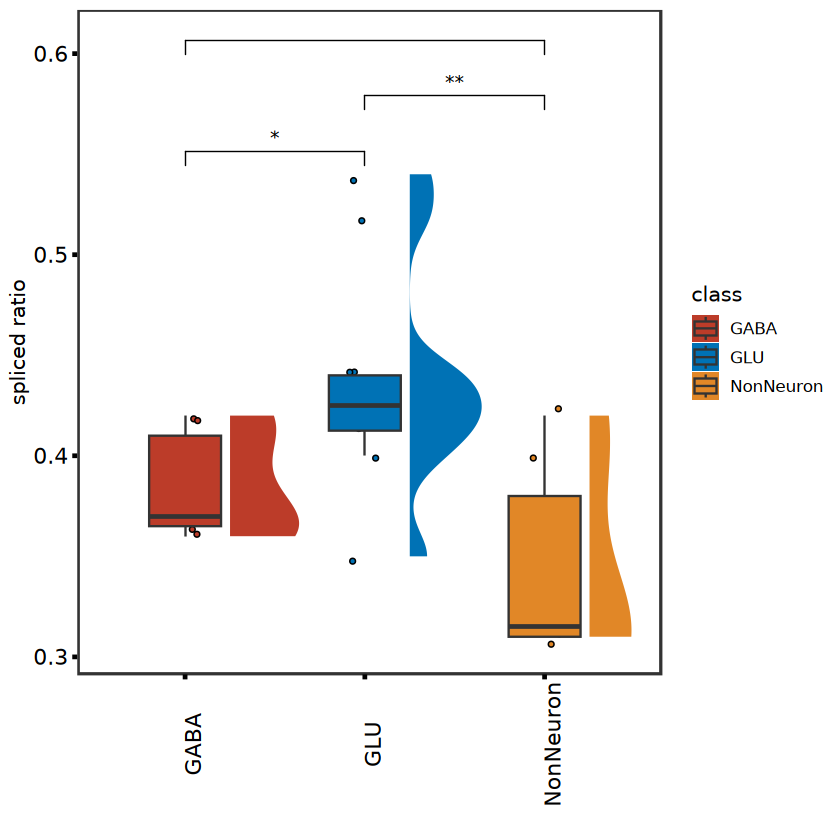

In [310]:
psubspbox = ggplot(splicedf[splicedf$group == "spliced",],aes(x = class, y = ratio, fill = class)) + 
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                         comparisons = list(c("GLU","GABA"),c("GLU","NonNeuron"),
                                      c("NonNeuron","GABA")))  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_nejm() + ylab("spliced ratio") + xlab("")
psubspbox
ggexport(psubspbox,filename = "result/figure3/velocity_spliced_ratio_stat_ngs_subclass_boxplot_24_12_11.pdf",width = 3,height = 3)

In [ ]:
splicedf = data.frame("areatr" = paste0("layer",1:6),
                      "ratio" = c(34,41,43,41,41,40))
splicedf$group = "spliced"
unsplicedf = splicedf
unsplicedf$group = "unspliced"
unsplicedf$ratio = 100 - unsplicedf$ratio
splicedf = rbind(splicedf,unsplicedf)
splicedf$proplabel = paste0(splicedf$ratio,"%")
splicedf$group = factor(splicedf$group,levels = c("unspliced","spliced"))
psubsp = ggplot(splicedf,aes(x = areatr,y = ratio,fill = group)) + 
    geom_bar(stat = "identity") + 
    geom_text(aes(label = proplabel),color = "white",
              position = position_stack(0.5),angle = 90) + 
    theme_bw() +
    scale_fill_manual(values = c("#2B2A4C","#B31312")) +
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5,hjust = 1),legend.position = "top",
          panel.grid.major = element_blank()) +
    xlab("") + ylab("Proportion")
psubsp
ggexport(psubsp,filename = "result/figure3/velocity_spliced_ratio_stat_ngs_layer_24_12_11.pdf",width = 2,height = 3)

### Isoform diversity analysis

In [39]:
subclst = fsraw.cor %>% group_by(subclass) %>% summarise(readnum = length(unique(readid)))

In [49]:
subclst = fsraw.cor %>% group_by(gene_id) %>% summarise(readnum = length(unique(readid)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      28     202    1265     857 1000568 

In [37]:
subclst = fsraw.cor %>% group_by(class,subclass) %>% summarise(cellnum = length(unique(cell_id)))
subclst

`summarise()` has grouped output by 'class'. You can override using the
`.groups` argument.


class     subclass cellnum
1  GABA      LAMP5     3683  
2  GABA      PVALB    18183  
3  GABA      PV_CHC     877  
4  GABA      RELN      6872  
5  GABA      SST      18344  
6  GABA      VIP       3491  
7  GABA      VIP_RELN  4893  
8  GLU       L2       20794  
9  GLU       L2/3     47025  
10 GLU       L2/3/4   17775  
11 GLU       L3/4     37563  
12 GLU       L3/4/5    3328  
13 GLU       L4       37339  
14 GLU       L4/5     42333  
15 GLU       L4/5/6   27254  
16 GLU       L5/6     20215  
17 GLU       L6       17806  
18 NonNeuron ASC      27040  
19 NonNeuron EC         106  
20 NonNeuron MG        2746  
21 NonNeuron OLG      26226  
22 NonNeuron OPC       3717  
23 NonNeuron VLMC       811

In [7]:
ReadIsoNumRandom = function(npclfglu,n = 500,mygroup){
    readids = unique(npclfglu$readid)
    readid1 = readids[sample(1:length(readids),n)]
    transt1 = npclfglu[npclfglu$readid %in% readid1,]
    transt1 = transt1[order(transt1$readid,transt1$gene_id,
                            transt1$transcript_id),]
    transt1 = transt1[!duplicated(transt1[c("readid","gene_id")]),]
    
    transt1 = transt1 %>% group_by(gene_id) %>% 
      summarise(transnum = length(unique(transcript_id)),
                readnum = length(unique(readid)))
    transt1f = transt1[transt1$readnum > 1,]
    median(transt1f$transnum)
    
    resdf = data.frame("mison" = mean(transt1f$transnum),
                       "isot" = sum(transt1$transnum),
                       "genet" = nrow(transt1),
                       "readnum" = n,
                       "group" = mygroup)
    
    return(resdf)
  }

groupanid = unique(subclst[subclst$readnum > 100000,]$subclass)
groupanid = groupanid[groupanid != ""]
fsrawdpls = list()
for (i in 1:length(groupanid)) {
    fsrawdpls[[i]] = fsraw.cor[fsraw.cor$subclass == groupanid[i],]
}
names(fsrawdpls) = groupanid
  
k = 100000
cellrdsto = NULL
for (i in 1:100) {
    print(i)
    for (j in 1:length(fsrawdpls)) {
      cellrdti = ReadIsoNumRandom(fsrawdpls[[j]],k,names(fsrawdpls)[j])
      cellrdsto = rbind(cellrdsto,cellrdti)
    }
}
qsave(cellrdsto,"result/figure3/bambu_subclass_isoform_diversity_cmp_25_10_11.qs")
#groupanid = unique(subclst[subclst$readnum > 1000000,]$class)
groupanid = unique(cellan$class)
groupanid
fsrawdpls = list()
for (i in 1:length(groupanid)) {
    fsrawdpls[[i]] = fsraw.cor[fsraw.cor$class == groupanid[i],]
}
names(fsrawdpls) = groupanid
  
k = 1000000
cellrdsto2 = NULL
for (i in 1:100) {
    print(i)
    for (j in 1:length(fsrawdpls)) {
      cellrdti = ReadIsoNumRandom(fsrawdpls[[j]],k,names(fsrawdpls)[j])
      cellrdsto2 = rbind(cellrdsto2,cellrdti)
    }
}
qsave(cellrdsto2,"result/figure3/bambu_class_isoform_diversity_cmp_25_10_11.qs")



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'subclst' not found


In [ ]:
fsraw.cor$areatr = fsraw.cor$class
CellIsoNumRandom = function(fsraw.cor,n = 100,time = 10){
    areatrs = unique(fsraw.cor$areatr)
    cellrdsto = NULL
    for (i in 1:length(areatrs)) {
        fsrawi = fsraw.cor[fsraw.cor$areatr == areatrs[i],]
        cellids = unique(fsrawi$cell_id)
        if(length(cellids) < n) next;
        for (j in 1:time) {
            cellid.down = cellids[sample(1:length(cellids),n)]
            fsrawij = fsrawi[fsrawi$cell_id %in% cellid.down,]
            transtj = fsrawij %>% group_by(gene_id) %>% 
                summarise(transnum = length(unique(transcript_id)),
                readnum = length(unique(readid)))
            #transtjf = transtj[transtj$readnum > 1,]
            cellrdti = data.frame("mison" = mean(transtj$transnum),
                       "isot" = sum(transtj$transnum),
                       "genet" = nrow(transtj),
                       "cellnum" = n,
                       "group" = areatrs[i])
            cellrdsto = rbind(cellrdsto,cellrdti)
        }
    }
    
    return(cellrdsto)
}


In [ ]:
fsraw.cor$areatr = fsraw.cor$class
cellrdsto2 = CellIsoNumRandom(fsraw.cor,n = 10000,time = 100)
cellrdsto2$group = factor(cellrdsto2$group,levels = c("GLU","GABA","NonNeuron"))
pt1 = ggplot(cellrdsto2,aes(x = group, y = mison, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ylab("Isoform diversity per 10000 cells") + xlab("")

  
  pt2 = ggplot(cellrdsto2,aes(x = group, y = isot, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ylab("Isoform number per 10000 cells") + xlab("")

  
  pt3 = ggplot(cellrdsto2,aes(x = group, y = genet, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + 
ylab("Gene number per 10000 cells") + xlab("")


file saved to result/figure3/class_isoform_diversity_cmp_box_25_10_11.pdf



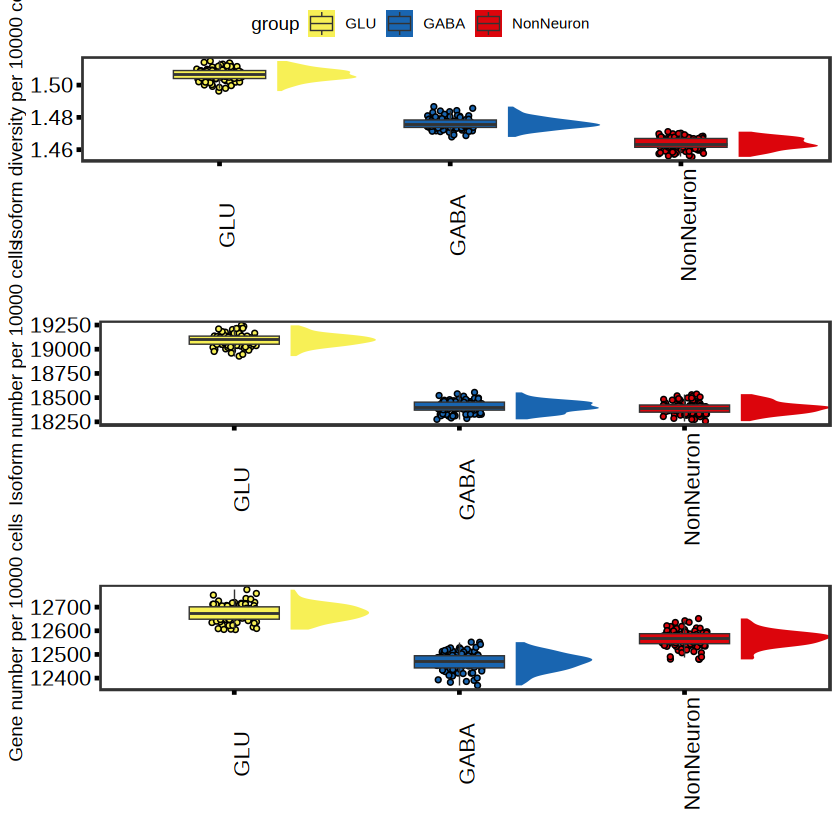

In [48]:
p1.3 = ggarrange(pt1,pt2,pt3,common.legend = T,ncol = 1)
p1.3
qsave(cellrdsto2,"result/figure3/bambu_class_isoform_diversity_cmp_25_10_11.qs")
ggexport(p1.3,filename = "result/figure3/class_isoform_diversity_cmp_box_25_10_11.pdf", width = 2,height = 10)

In [44]:
fsraw.cor$areatr = fsraw.cor$subclass
cellrdsto = CellIsoNumRandom(fsraw.cor,n = 500,time = 100)
cellrdsto$class = cellan[match(cellrdsto$group,cellan$subclass),]$class
cellrdsto = cellrdsto[order(cellrdsto$class),]
cellrdsto$group = factor(cellrdsto$group,levels = suborder)
cellrdsto$class = factor(cellrdsto$class,levels = c("GLU","GABA","NonNeuron"))


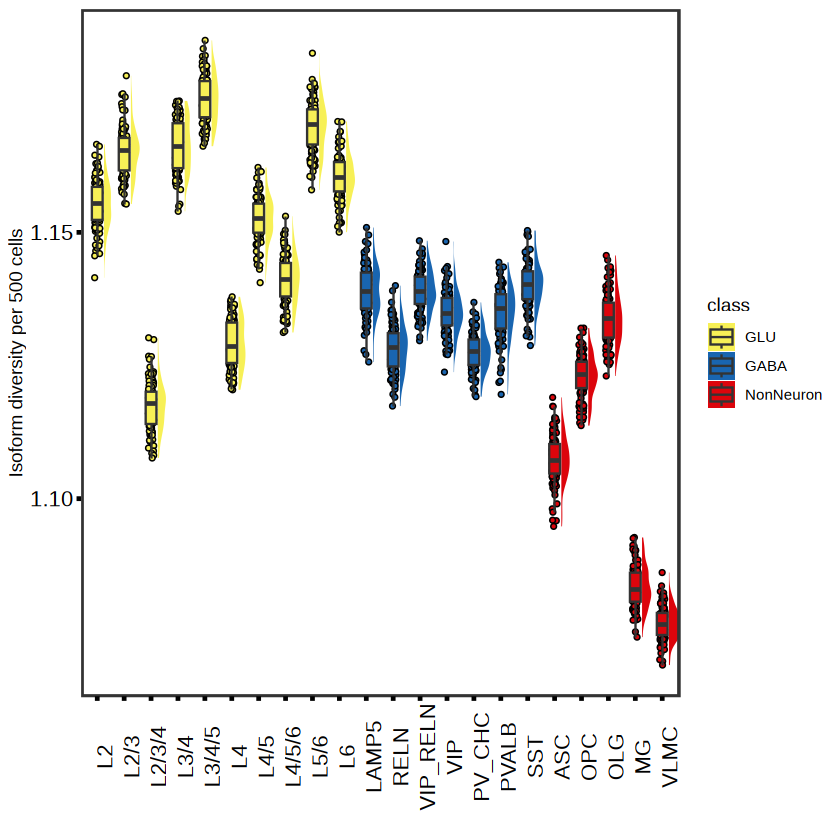

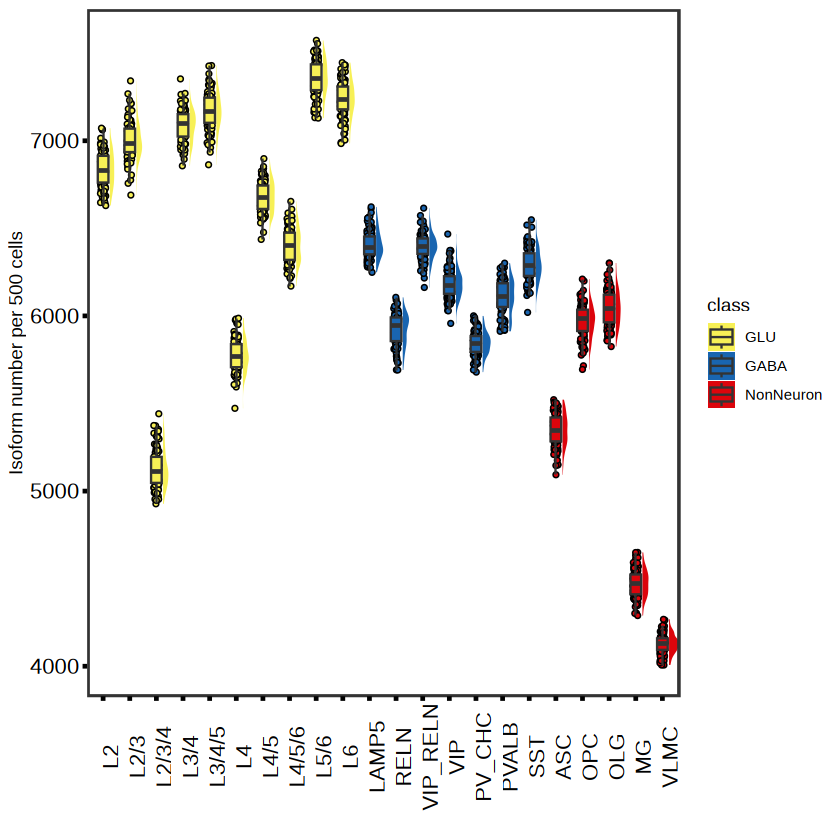

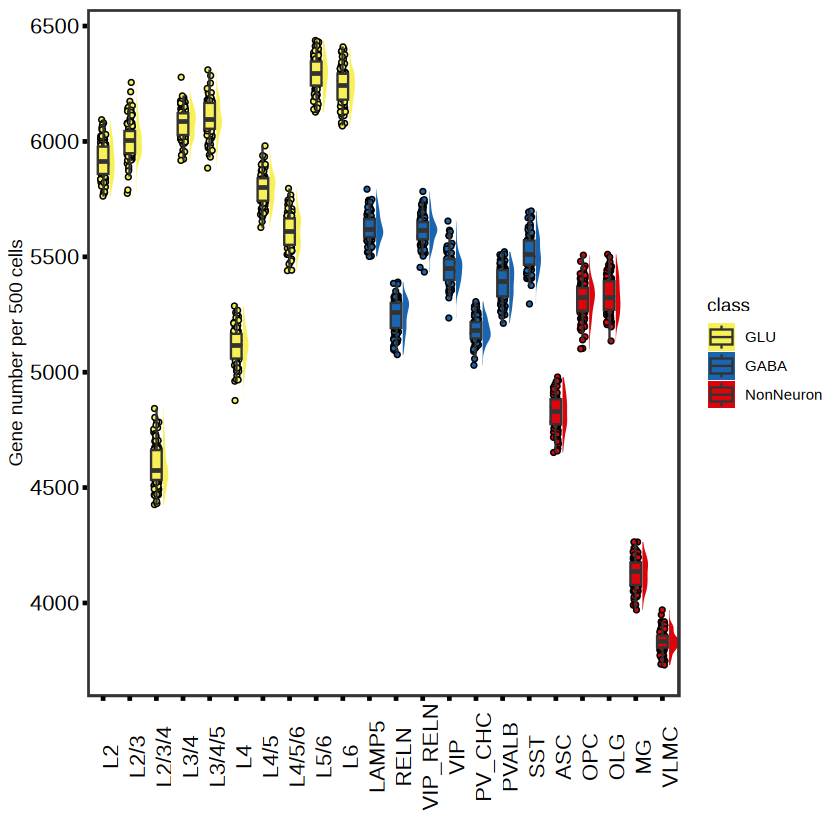

file saved to result/figure3/subclass_isoform_diversity_cmp_box_25_10_11.pdf



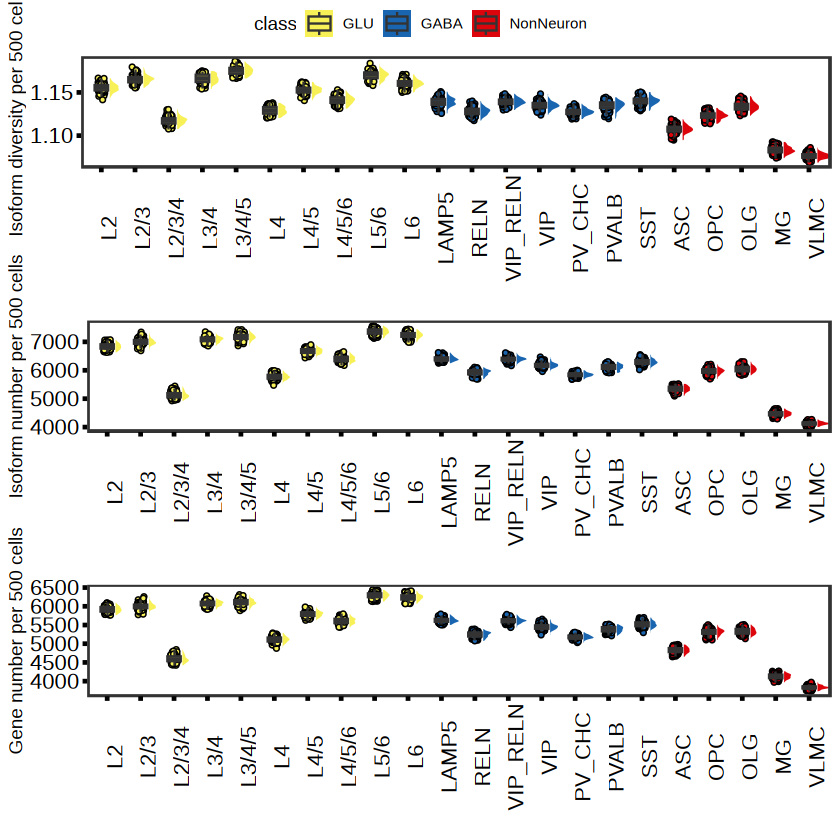

In [45]:
pt1 = ggplot(cellrdsto,aes(x = group, y = mison, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Isoform diversity per 500 cells") + xlab("")
  pt1
  
  pt2 = ggplot(cellrdsto,aes(x = group, y = isot, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Isoform number per 500 cells") + xlab("")
  pt2
  
  pt3 = ggplot(cellrdsto,aes(x = group, y = genet, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Gene number per 500 cells") + xlab("")
  pt3
p1.2 = ggarrange(pt1,pt2,pt3,common.legend = T,ncol = 1)
p1.2
ggexport(p1.2,filename = "result/figure3/subclass_isoform_diversity_cmp_box_25_10_11.pdf", width = 7,height = 12)

### Cell Marker gene isoform feature analysis

#### old version

In [ ]:
MarkerGenePreAna = function(fsrawdp,mkls.at){
    colnames(mkls.at)[6:7] = c("areatr","gene_id")
    mkls.at = mkls.at[mkls.at$avg_log2FC > 0.5 & mkls.at$p_val_adj < 0.05 & mkls.at$pct.1 > 0.25, ]
    length(unique(mkls.at$gene))

    #stat gene for filtering transcript
    genetrst.at = fsrawdp %>% group_by(areatr,gene_id) %>% 
        mutate(readnumt = length(unique(readid))) %>% 
        group_by(areatr,gene_id,transcript_id)  %>% 
        summarise(readnum = length(unique(readid)),
                  readnumt = readnumt[1],
                  readrate = readnum/readnumt)

    genetrst.atf = genetrst.at[genetrst.at$readrate > 0.05,]
    genetrst.atf = genetrst.atf %>% group_by(areatr,gene_id) %>% mutate(transnum = length(unique(transcript_id)))

    #filter gene
    fsgenest.at = fsrawdp %>% group_by(areatr, gene_id) %>% summarise(readnum = length(unique(readid)))
    fsgenest.atf = fsgenest.at[fsgenest.at$readnum > 100,]
    mkls.atf = mkls.at[paste0(mkls.at$areatr,mkls.at$gene) %in% paste0(fsgenest.atf$areatr,fsgenest.atf$gene_id),]

    mkls.at.st = merge(mkls.atf, genetrst.atf, by = c("areatr","gene_id"))
    mkls.at.st = mkls.at.st %>% group_by(areatr, gene_id) %>% summarise(mrate = max(readrate),transnum = transnum[1],readnumt = readnumt[1])
    mkls.at.st = mkls.at.st[order(mkls.at.st$areatr,-mkls.at.st$readnumt),]
    mkls.at.st = mkls.at.st %>% group_by(areatr) %>% mutate(geneorder = as.numeric(factor(gene_id,levels = unique(gene_id))) )

    #build case plot srt object
    transt.sp.at = fsrawdp %>% group_by(areatr, chunk, gene_id, transcript_id) %>% 
        summarise(transcount = length(unique(readid)))
    transt.sp.at$transgroup = paste0(transt.sp.at$gene_id,"-",transt.sp.at$transcript_id)
    transt.sp.at$cellname = paste0(transt.sp.at$areatr,"-",transt.sp.at$chunk)
    transtmx.at = dcast(transt.sp.at,transgroup~cellname,
                       value.var = "transcount",fun.aggregate = sum)
    rownames(transtmx.at) = transtmx.at$transgroup;transtmx.at = transtmx.at[-1]
  
    SrtBuild = function(transtmx){
        srtt = CreateSeuratObject(transtmx)
        srtt = NormalizeData(srtt)
        srtt = ScaleData(srtt)
        srtt = FindVariableFeatures(srtt, selection.method = "vst",
                                 nfeatures = 2000)
        return(srtt)
    }
    srt.sp.at = SrtBuild(transtmx.at)
    anareatr = MySplit(colnames(srt.sp.at),"-",1)
    anchunk = MySplit(colnames(srt.sp.at),"-",2)
    names(anareatr) = names(anchunk) = colnames(srt.sp.at)
    srt.sp.at$areatr = anareatr
    srt.sp.at$chunk = anchunk
    Idents(srt.sp.at) = srt.sp.at$areatr
    return(list("transt.sp" = transt.sp.at,"srt.sp" = srt.sp.at,"genetrstf" = genetrst.atf,"mkls.st" = mkls.at.st,"mklsf" = mkls.atf))    
}


In [ ]:
#multiple isoform gene marker case plot
#case plot
modify_vlnplot <- function(srt.sp.sub, selectedhub) {
    features = rownames(srt.sp.sub)
    features = features[MySplit(features,"-",1) %in% selectedhub]
    
    objp = as.data.frame(srt.sp.sub[["ISOFORM"]]$scale.data)
    objp = objp[features,]
    objp$transid = rownames(objp)
    objp = melt(objp)
    objp$geneid = MySplit(objp$transid,"-",1)
    objp$areatr = MySplit(as.character(objp$variable),"-",1)
    objp$geneid = factor(objp$geneid,levels = unique(selectedhub))
    
    objp = objp[!is.na(objp$geneid),]
    objp = objp[order(objp$geneid),]
    #objp = objp %>% group_by(geneid, areatr) %>% filter(length(variable) > 2)
#    objp$areatr = gsub("l","L",objp$areatr)

    ylabedf = objp %>% group_by(geneid) %>% summarise(ymin = min(value),ymax = max(value))
    
    ylabels = list()
    for(i in 1:nrow(ylabedf)){
       ylabels[[i]] = scale_y_continuous(breaks = c(round(ylabedf$ymax[i],2) - 0.1),
                                         limits = c(round(ylabedf$ymin[i],2), round(ylabedf$ymax[i],2) - 0.1))
    }
    objprect = data.frame("areatr" = unique(objp$areatr),value = 1)

    if(nrow(objprect) > 10){
        mycolors = viridis_pal(option = "D")(nrow(objprect))
    }else{
        mycolors = pal_flatui("default")(nrow(objprect))
    }
    mycolors = c(mycolors,mycolors)
    names(mycolors) = c(levels(objp$geneid),unique(objp$areatr))
#    print(mycolors)
    vertical.lines = seq(1.5,nrow(objprect)-0.5,1)
    pi = ggplot(objp) +
      geom_rect(data = objprect,
                aes(xmin = as.numeric(as.factor(areatr))-0.5,xmax = as.numeric(as.factor(areatr))+0.5,ymin = -Inf,ymax = Inf,fill = areatr),
                alpha = 0.2) +
      geom_violin(aes(x = areatr,y = value,fill = geneid,color = transid),size = 0.3,drop = FALSE) +
      geom_boxplot(aes(x = areatr,y = value,color = transid),size = 0.3,fill = "white",width=0.1,cex=0.8,outlier.size = 0.3,drop = FALSE,
                   position = position_dodge(0.9)) +
      geom_vline(xintercept = vertical.lines,lty="dashed", color = "black", linewidth = 0.5) +
      #geom_vline(xintercept = 1.5, lty="dashed", color = "black", linewidth = 0.5)+
      #geom_vline(xintercept = 2.5, lty="dashed", color = "black", linewidth = 0.5)+
      #geom_vline(xintercept = 3.5, lty="dashed", color = "black", linewidth = 0.5)+
      #geom_vline(xintercept = 4.5, lty="dashed", color = "black", linewidth = 0.5)+
      #geom_vline(xintercept = 5.5, lty="dashed", color = "black", linewidth = 0.5)+
      #geom_boxplot(fill = "white",color = "black") +
      # geom_jitter(size = 0.1) +
      facet_grid(geneid~.,scales = "free") + 
      facetted_pos_scales(y = ylabels)+
      scale_color_manual(values = rep("black",length(unique(objp$transid)))) +
      scale_fill_manual(values = mycolors) +
      xlab("") + ylab("") +
      scale_x_discrete(
      expand = c(0,0)
      ) +
      # scale_y_continuous(breaks = custom_breaks) +
      theme_pubr() +
      theme(strip.background = element_blank(), 
            strip.text.x = element_blank(), 
            panel.spacing = unit(0,'lines'),
            legend.position = "none",
            panel.border = element_rect(fill = NA),
            strip.text.y = element_text(angle = 0,size = 12),
            axis.text.x = element_text(size = 12))
    pi
    return(pi)
}

##### subclass analysis

In [ ]:
#subclass analysis
mkls = qread("result/figure2/gene_marker_list_24_03_28.qs")

In [ ]:

fsrawdp$areatr = fsrawdp$subclass
fsrawdp$chunk = fsrawdp$lobe
mkls.at = mkls$subclass

mkgan.subcl = MarkerGenePreAna(fsrawdp,mkls.at)

In [ ]:
mkls.sti = mkgan.subcl$mkls.st
p1.1 = ggplot(mkls.sti,aes(x = geneorder,y = mrate,color = as.character(transnum))) + geom_point() +
facet_grid(~areatr,scales = "free") + theme_pubr() + 
theme(axis.text.x = element_blank(),axis.ticks.x = element_blank(),strip.background = element_rect(fill = NA)) +
scale_color_flatui() + labs(x = "Expression ranking of layer marker gene", y = "Dominant isoform ratio",color = "Isoform diversity") +
theme(legend.position = "none",text = element_text(size = 20))
p1.1
mkls.sti$isoformdiv = factor(mkls.sti$transnum,levels = 1:max(mkls.sti$transnum))
mycolor = pal_flatui("default")(length(unique(mkls.sti$isoformdiv)))
p1.2 = ggplot(mkls.sti[mkls.sti$transnum > 1,],aes(x = mrate,color = isoformdiv)) + geom_density() + 
scale_color_manual(values = mycolor[-1]) + 
theme_pubr() + labs(x = "",y = "",color = "Isoform\ndiversity") + theme(legend.position = "none",text = element_text(size = 20)) + 
 scale_x_continuous(limits = c(0.4,1)) + scale_y_continuous(breaks = c(0,5)) +
coord_flip()
p1.2
mkls.sti2 = mkls.sti %>% group_by(areatr,transnum) %>% summarise(genenum = length(unique(gene_id)))
p1.3 = ggplot(mkls.sti2,
              aes(x = areatr,fill = as.character(transnum),y = genenum)) + geom_bar(stat = "identity",position = "dodge") +
geom_text(aes(label = genenum),position = position_dodge(1),vjust = 0) +
scale_fill_flatui() + labs(x = "",y = "",fill = "Isoform\ndiversity") +
scale_y_continuous(breaks = c(0,200)) +
facet_grid(~areatr,scales = "free") +
theme_pubr() + 
theme(legend.position = "top",axis.text.x = element_blank(),axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      strip.text = element_blank(),text = element_text(size = 20))
p1.3

In [ ]:
fsrawdp$areatr = fsrawdp$subclass
fsrawdp = fsrawdp[fsrawdp$layer %in% paste0("l",1:6),] %>% group_by(areatr) %>% mutate(treadnum = length(unique(readid)))
fsrawdpf = fsrawdp[fsrawdp$treadnum > 100000,]
fsrawdpf = fsrawdpf %>% group_by(areatr) %>% mutate(genenum = length(unique(gene_id)))
#fsrawdpf = fsrawdpf[fsrawdpf$genenum > 50,]
fsrawdpf.down = fsrawdpf %>% group_by(areatr) %>% 
    mutate(randomid = sample(x = 1:n(),size = n()))
fsrawdpf.down = fsrawdpf.down[fsrawdpf.down$randomid %in% 1:100000,]
fsrawdpf.down.st = fsrawdpf.down %>% group_by(gene_id) %>% summarise(areanum = length(unique(areatr)))

genetrst.down = fsrawdpf.down %>% group_by(areatr,gene_id) %>% 
    mutate(readnumt = length(unique(readid))) %>% 
    group_by(areatr,gene_id,transcript_id)  %>% 
    summarise(readnum = length(unique(readid)),
              readnumt = readnumt[1],
              readrate = readnum/readnumt)

#mkls.atf = mkgan.subcl$mklsf
#genetrst.down = genetrst.down[paste0(genetrst.down$areatr,genetrst.down$gene_id) %in% paste0(mkls.atf$areatr,mkls.atf$gene_id),]
genetrst.downf = genetrst.down[genetrst.down$readrate > 0.05,]
genetrst.downf.st = genetrst.downf %>% group_by(areatr,gene_id) %>% summarise(transnum = length(unique(transcript_id)))
mkls.down.st = genetrst.downf.st %>% group_by(areatr,transnum) %>% summarise(genenum = length(unique(gene_id)))

In [ ]:
cellnumst = fsrawdp %>% group_by(class,subclass) %>% summarise(cellnum = length(unique(cell_id)),readnum = length(unique(readid)))
cellnumst

metacellst = fsrawdp %>% group_by(class,subclass,metacell) %>% 
summarise(cellnum = length(unique(cell_id)), genenum = length(unique(gene_id)), trannum = length(unique(transcript_id)),readnum = length(unique(readid))) %>% 
group_by(class,subclass) %>% summarise(cellnum = mean(cellnum), genenum = mean(genenum),readnum = mean(readnum),trannum = mean(trannum))
metacellst

In [ ]:
head(mkls.down.st)
mkls.down.st$class = cellan[match(mkls.down.st$areatr,cellan$subclass),]$class
mkls.down.st = mkls.down.st[order(mkls.down.st$class),]
mkls.down.st$areatr = factor(mkls.down.st$areatr,levels = unique(mkls.down.st$areatr))
p1.5 = ggplot(mkls.down.st,
              aes(x = areatr,fill = as.character(transnum),y = genenum)) + geom_bar(stat = "identity",position = "fill") +
scale_fill_flatui() + labs(x = "",y = "",fill = "Isoform\ndiversity") +
facet_grid(~class,scales = "free",space = "free") +
theme_pubr() + 
theme(strip.background = element_rect(fill = NA),
      axis.text.x = element_text(angle = 45,vjust = 0.5),
      #strip.text = element_blank(),
      text = element_text(size = 15))
p1.5

In [ ]:
mkls.down.st2 = mkls.down.st %>% group_by(class,areatr) %>% summarise(mtransnum = sum(transnum*genenum)/sum(genenum) ,genenum = sum(genenum))
p1.6 = ggplot(mkls.down.st2,
              aes(x = areatr,color = class,y = mtransnum)) + 
geom_segment(aes(x = areatr,xend= areatr,y = 0,yend = mtransnum),size = 0.5, color = "grey") +
geom_point(aes(size = genenum)) +
scale_color_brewer(palette = "Set1") + labs(x = "",y = "",fill = "Isoform\ndiversity") +
theme_pubr() +
theme(strip.background = element_rect(fill = NA),
      axis.text.x = element_text(angle = 45,vjust = 0.5),
      #strip.text = element_blank(),
      text = element_text(size = 15))
p1.6

In [ ]:
mkls.sti = mkgan.subcl$mkls.st
mklsfi = mkgan.subcl$mklsf

#select top
hubgene = mkls.sti[mkls.sti$transnum > 1 & mkls.sti$transnum < 4 & mkls.sti$mrate < 0.9 & mkls.sti$readnumt > 100 ,]
mklsfi.hub = mklsfi[mklsfi$gene_id %in% hubgene$gene_id,]
mklsfi.hub = mklsfi.hub %>% group_by(areatr) %>% top_n(wt = avg_log2FC, n = 3)
mklsfi.hub

selectedhub = c("TAC1","GRIK1","NTRK3","TESPA1","ARPP19","MYLK","GAP43","NEGR1","BEND5","SPOCK1","FKBP1B","SLC8A1","SLC25A18","MOG")

In [ ]:
transt.spi = mkgan.subcl$transt.sp
srt.spi = mkgan.subcl$srt.sp
genetrstfi = mkgan.subcl$genetrstf

transt.sp.hub = transt.spi[transt.spi$gene_id %in% selectedhub & transt.spi$transcript_id %in% genetrstfi$transcript_id,]
transidsub = unique(transt.sp.hub$transgroup)
transidsub = gsub(transidsub,pattern = "_",replacement = "-")
srt.sp.sub = subset(srt.spi,features = transidsub)
pc.box = modify_vlnplot(srt.sp.sub, selectedhub)
pc.box
ggexport(pc.box,filename = "result/figure3/marker_gene_isoform_boxplot_24_03_31.pdf",width = 12,height = 10)

In [ ]:
unique(fsrawdp$subclass)

In [ ]:
head(mkgan.subcl$genetrstf)

In [ ]:
srtt

In [ ]:
#stat marker information of subclass marker genes
subclorder = c("L2","L2/3","L2/3/4","L3/4","L3/4/5","L4","L4/5","L4/5/6","L5/6","L6","LAMP5","RELN","VIP_RELN","VIP","PV_CHC","PVALB","PV","SST","ASC","OPC","OLG","MG","EC","VLMC")
markergs = c("SLC17A7","GPR83","CCBE1","CUX2","GPC5","PDZD2","CUX1","MYLK","PLCH1","RORB","IL1RAPL2","ETV1","TLE4","SEMA3E","GAD1","GAD2","ADARB2","LAMP5","FBXL7","KIT","EYA4","
             CALB2","RELN","VIP","SOX6","TRPS1","ADAMTSL1","PVALB","POSTN","SST","CALB1","SLC1A2","SLC1A3","PTPRZ1","PDGFRA","COL9A1","PLP1","ITGAM","RGS5","COL1A2")
genetrstfi = mkgan.subcl$genetrstf

DefaultAssay(srtt) = "ISOFORM"
objp = as.data.frame(srtt[["ISOFORM"]]$scale.data)
DefaultAssay(srtt) = "RNA"

mkcasedf = genetrstfi[genetrstfi$gene_id %in% markergs,]
features = unique(mkcasedf[mkcasedf$gene_id %in% markergs,]$transcript_id)
features = gsub(x = features,pattern = "_",replacement = "-")
objp = objp[features,]
#head(objp)
objp$transid = rownames(objp)
objp = melt(objp)
objp$areatr = MySplit(as.character(objp$variable),"-",2)
objp = objp %>% group_by(areatr,transid) %>% summarise(scalen = mean(value))
colnames(objp)[2] = c("transcript_id")

#head(mkcasedf)
#head(objp)
mkcasedf$transcript_id = gsub(x = mkcasedf$transcript_id,pattern = "_",replacement = "-")
mkcasedf = merge(mkcasedf,objp,by = c("areatr","transcript_id"))
mkcasedf$areatr = factor(mkcasedf$areatr,levels = subclorder)
mkcasedf$gene_id = factor(mkcasedf$gene_id,levels = markergs)
head(mkcasedf)


In [ ]:
p = ggplot(mkcasedf,aes(x = transcript_id,y = areatr,size = readrate,color = scalen)) + geom_point(aes(shape = as.factor(transnum))) +
facet_grid(~gene_id,scales = "free") + theme_pubr() + scale_color_viridis() + theme(axis.text.x = element_blank())
p 
ggexport(p,filename = "result/figure3/subclass_marker_case_plot.pdf",width = 12,height = 6)

##### class

In [ ]:
fsrawdp$areatr = fsrawdp$class
fsrawdp$chunk = fsrawdp$subclass
mkls.at = mkls$class
mkgan.cl = MarkerGenePreAna(fsrawdp,mkls.at)

In [ ]:
mkls.sti = mkgan.cl$mkls.st
p1.1 = ggplot(mkls.sti,aes(x = geneorder,y = mrate,color = as.character(transnum))) + geom_point() +
facet_grid(~areatr,scales = "free") + theme_pubr() + 
theme(axis.text.x = element_blank(),axis.ticks.x = element_blank(),strip.background = element_rect(fill = NA)) +
scale_color_flatui() + labs(x = "Expression ranking of layer marker gene", y = "Dominant isoform ratio",color = "Isoform diversity") +
theme(legend.position = "none",text = element_text(size = 20))
p1.1
mkls.sti$isoformdiv = factor(mkls.sti$transnum,levels = 1:max(mkls.sti$transnum))
mycolor = pal_flatui("default")(length(unique(mkls.sti$isoformdiv)))
p1.2 = ggplot(mkls.sti[mkls.sti$transnum > 1,],aes(x = mrate,color = isoformdiv)) + geom_density() + 
scale_color_manual(values = mycolor[-1]) + 
theme_pubr() + labs(x = "",y = "",color = "Isoform\ndiversity") + theme(legend.position = "none",text = element_text(size = 20)) + 
 scale_x_continuous(limits = c(0.4,1)) + scale_y_continuous(breaks = c(0,5)) +
coord_flip()
p1.2
mkls.sti2 = mkls.sti %>% group_by(areatr,transnum) %>% summarise(genenum = length(unique(gene_id)))
p1.3 = ggplot(mkls.sti2,
              aes(x = areatr,fill = as.character(transnum),y = genenum)) + geom_bar(stat = "identity",position = "dodge") +
geom_text(aes(label = genenum),position = position_dodge(1),vjust = 0) +
scale_fill_flatui() + labs(x = "",y = "",fill = "Isoform\ndiversity") +
scale_y_continuous(breaks = c(0,500)) +
facet_grid(~areatr,scales = "free") +
theme_pubr() + 
theme(legend.position = "top",axis.text.x = element_blank(),axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      strip.text = element_blank(),text = element_text(size = 20))
p1.3

In [ ]:
library("gridExtra")
pdf("result/figure3/gene_marker_isoform_heterogeneity_stat_class_24_03_29.pdf",width = 6,height = 6)
p1.t = grid.arrange(
  p1.3,p1.1,p1.2,
  widths = c(2, 1),heights = c(3,6),
  layout_matrix = rbind(c(1, NA),
                        c(2, 3))
)
dev.off()
p1.t

In [ ]:
fsrawdp$areatr = fsrawdp$class
fsrawdp = fsrawdp[fsrawdp$layer %in% paste0("l",1:6),] %>% group_by(areatr) %>% mutate(treadnum = length(unique(readid)))
fsrawdpf = fsrawdp[fsrawdp$treadnum > 500000,]
fsrawdpf = fsrawdpf %>% group_by(areatr) %>% mutate(genenum = length(unique(gene_id)))
#fsrawdpf = fsrawdpf[fsrawdpf$genenum > 50,]
fsrawdpf.down = fsrawdpf %>% group_by(areatr) %>% 
    mutate(randomid = sample(x = 1:n(),size = n()))
fsrawdpf.down = fsrawdpf.down[fsrawdpf.down$randomid %in% 1:500000,]
fsrawdpf.down.st = fsrawdpf.down %>% group_by(gene_id) %>% summarise(areanum = length(unique(areatr)))

genetrst.down = fsrawdpf.down %>% group_by(areatr,gene_id) %>% 
    mutate(readnumt = length(unique(readid))) %>% 
    group_by(areatr,gene_id,transcript_id)  %>% 
    summarise(readnum = length(unique(readid)),
              readnumt = readnumt[1],
              readrate = readnum/readnumt)

#mkls.atf = mkgan.subcl$mklsf
#genetrst.down = genetrst.down[paste0(genetrst.down$areatr,genetrst.down$gene_id) %in% paste0(mkls.atf$areatr,mkls.atf$gene_id),]
genetrst.downf = genetrst.down[genetrst.down$readrate > 0.05,]
genetrst.downf.st = genetrst.downf %>% group_by(areatr,gene_id) %>% summarise(transnum = length(unique(transcript_id)))
mkls.down.st = genetrst.downf.st %>% group_by(areatr,transnum) %>% summarise(genenum = length(unique(gene_id)))

In [ ]:
head(mkls.down.st)
#mkls.down.st$class = cellan[match(mkls.down.st$areatr,cellan$subclass),]$class
#mkls.down.st = mkls.down.st[order(mkls.down.st$class),]
#mkls.down.st$areatr = factor(mkls.down.st$areatr,levels = unique(mkls.down.st$areatr))
p1.5 = ggplot(mkls.down.st,
              aes(x = areatr,fill = as.character(transnum),y = genenum)) + geom_bar(stat = "identity",position = "fill") +
scale_fill_flatui() + labs(x = "",y = "",fill = "Isoform\ndiversity") +
#facet_grid(~class,scales = "free",space = "free") +
theme_pubr() + 
theme(strip.background = element_rect(fill = NA),
      axis.text.x = element_text(angle = 45,vjust = 0.5),
      #strip.text = element_blank(),
      text = element_text(size = 15))
p1.5
mkls.down.st2 = mkls.down.st %>% group_by(areatr) %>% summarise(mtransnum = sum(transnum*genenum)/sum(genenum) ,genenum = sum(genenum))
p1.6 = ggplot(mkls.down.st2,
              aes(x = areatr,y = mtransnum)) + 
geom_segment(aes(x = areatr,xend= areatr,y = 0,yend = mtransnum),size = 0.5, color = "grey") +
geom_point(aes(size = genenum)) +
scale_color_brewer(palette = "Set1") + labs(x = "",y = "",fill = "Isoform\ndiversity") +
theme_pubr() +
theme(strip.background = element_rect(fill = NA),
      axis.text.x = element_text(angle = 45,vjust = 0.5),
      #strip.text = element_blank(),
      text = element_text(size = 15))
p1.6

In [ ]:
mkls.sti = mkgan.cl$mkls.st
mklsfi = mkgan.cl$mklsf

#select top
hubgene = mkls.sti[mkls.sti$transnum > 1 & mkls.sti$transnum < 4 & mkls.sti$mrate < 0.9 & mkls.sti$readnumt > 100 ,]
mklsfi.hub = mklsfi[mklsfi$gene_id %in% hubgene$gene_id,]
mklsfi.hub = mklsfi.hub %>% group_by(areatr) %>% top_n(wt = avg_log2FC, n = 10)
mklsfi.hub

In [ ]:
selectedhub = c("GAD2","ADARB2","SLC1A2")
transt.spi = mkgan.cl$transt.sp
srt.spi = mkgan.cl$srt.sp
genetrstfi = mkgan.cl$genetrstf

transt.sp.hub = transt.spi[transt.spi$gene_id %in% selectedhub & transt.spi$transcript_id %in% genetrstfi$transcript_id,]
transidsub = unique(transt.sp.hub$transgroup)
transidsub = gsub(transidsub,pattern = "_",replacement = "-")
srt.sp.sub = subset(srt.spi,features = transidsub)
pc.box = modify_vlnplot(srt.sp.sub, selectedhub)
pc.box
ggexport(pc.box,filename = "result/figure3/marker_gene_isoform_boxplot_class_24_03_31.pdf",width = 12,height = 10)

#### Subclass Marker genes

In [ ]:
mkls = list()
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "subclass"
mkls$subclass = FindAllMarkers(srtt)
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
mkls$class = FindAllMarkers(srtt)
qsave(mkls,file = "result/figure3/gene_marker_list_cell_24_12_09.qs")

In [8]:
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')

In [54]:
fsraw.cor$areatr = fsraw.cor$subclass
genetrstfi = fsraw.cor %>% group_by(areatr,gene_id) %>% 
        mutate(readnumt = length(unique(readid))) %>% 
        group_by(areatr,gene_id,transcript_id)  %>% 
        summarise(readnum = length(unique(readid)),
                  readnumt = readnumt[1],
                  readrate = readnum/readnumt)
genetrstfi = genetrstfi %>% group_by(areatr,gene_id) %>% mutate(transnum = length(unique(transcript_id)))

genetrstfi.st = genetrstfi %>% group_by(gene_id,transcript_id) %>% summarise(readnum = sum(readnum))
genetrstfi.st = genetrstfi.st %>% group_by(gene_id) %>% mutate(readrate = readnum/sum(readnum))
nrow(genetrstfi.st)
genetrstfi.st = genetrstfi.st[genetrstfi.st$readrate > 0.05,]
nrow(genetrstfi.st)
genetrstfi = genetrstfi[genetrstfi$transcript_id %in% genetrstfi.st$transcript_id,]

`summarise()` has grouped output by 'areatr', 'gene_id'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


[1] 33979

[1] 25489

In [47]:

# srt.spi = mkgan.subcl$srt.sp
# genetrstfi = mkgan.subcl$genetrstf
# transt.spi = mkgan.subcl$transt.sp
# head(transt.spi)
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
cellanuq = cellanuq %>% group_by(cell_id) %>% filter(n() == 1)
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
cellanuq = cellanuq[cellanuq$cellnum > 3,]
fsraw.cor$metacell = cellanuq[match(fsraw.cor$cell_id,cellanuq$cell_id),]$metacell

In [95]:
# features = rownames(srtt)
# features = features[MySplit(features,"-",1) %in% mkcase]
fsraw.cor$areatr = fsraw.cor$subclass
fsraw.cor = fsraw.cor %>% group_by(areatr) %>% mutate(metacelln = length(unique(metacell)),readnumt = length(unique(readid)))
mkex = fsraw.cor[fsraw.cor$areatr != "",]
mkex = mkex %>% group_by(areatr,gene_id,transcript_id) %>% 
summarise(metacellp = length(unique(metacell))/metacelln[1],
          readnum = length(unique(readid)),readnumt = readnumt[1],
          readnorm = readnum/readnumt)
mkex = mkex %>% group_by(gene_id,transcript_id) %>% mutate(readnorm = scale(readnorm),cellpnorm = scale(metacellp))
#objp = as.data.frame(srt.spi[["RNA"]]$scale.data)
#objp = objp[features,]
#objp = objp[!is.na(objp),]
#objp$transcript_id = rownames(objp)
#objp = melt(objp)
#objp$gene_id = MySplit(objp$transcript_id,"-",1)
#objp$areatr = MySplit(as.character(objp$variable),"-",1)
#objp = objp %>% group_by(gene_id,areatr,transcript_id) %>% summarise(scalen = mean(value))
#mkls = qread("result/figure2/gene_marker_list_24_03_28.qs")


`summarise()` has grouped output by 'areatr', 'gene_id'. You can override using
the `.groups` argument.


file saved to result/figure3/gene_marker_isoform_heterogeneity_stat_pie_25_11_26.pdf



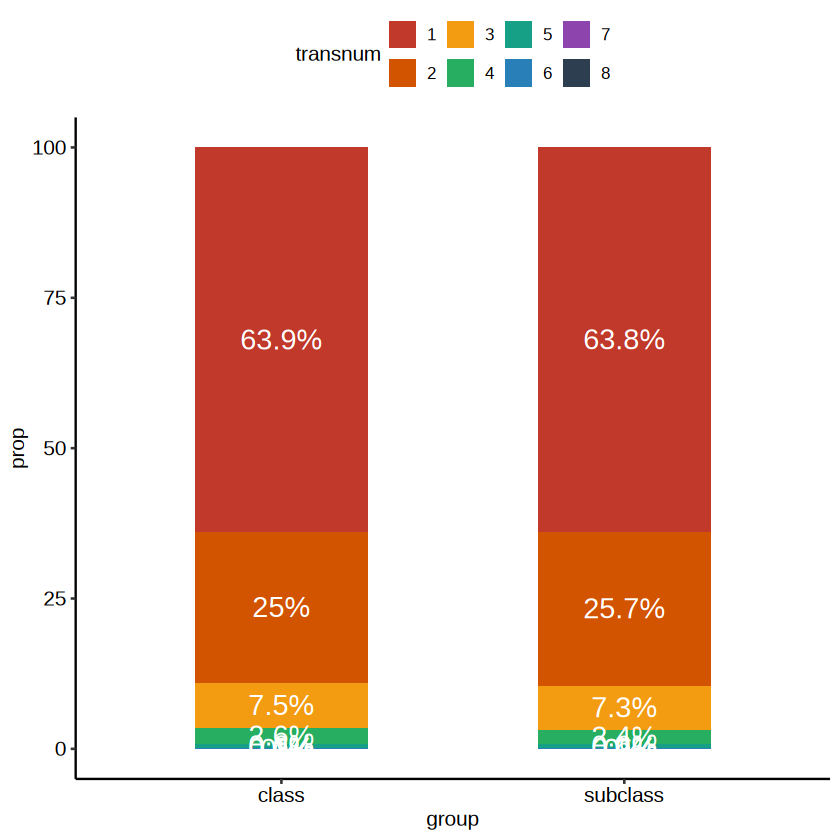

In [55]:
mkls = qread("result/figure3/gene_marker_list_cell_24_12_09.qs")
trannumst = genetrstfi %>% group_by(gene_id) %>% summarise(transnum = length(unique(transcript_id)))
#trannumst
mklsc = mkls$subclass
mklsc = mklsc[mklsc$p_val_adj < 0.05 & mklsc$avg_log2FC > 0.5,]
colnames(mklsc)[7] = "gene_id"
mklsc = merge(mklsc,trannumst,by = "gene_id")
mklsc.st = mklsc%>% group_by(transnum) %>% summarise(genenum = length(unique(gene_id)))
mklsc.st$transnum = as.character(mklsc.st$transnum)
mklsc.st <- mklsc.st %>% 
  arrange(desc(transnum)) %>%
  mutate(prop = genenum / sum(mklsc.st$genenum) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
mklsc.st$proplabel = paste0(round(mklsc.st$prop,1),"%")
mklsc.st$group = "subclass"

mklc = mkls$class
mklc = mklc[mklc$p_val_adj < 0.05 & mklc$avg_log2FC > 0.5,]
colnames(mklc)[7] = "gene_id"
mklc = merge(mklc,trannumst,by = "gene_id")
mklc.st = mklc %>% group_by(transnum) %>% summarise(genenum = length(unique(gene_id)))
mklc.st$transnum = as.character(mklc.st$transnum)
mklc.st <- mklc.st %>% 
  arrange(desc(transnum)) %>%
  mutate(prop = genenum / sum(mklc.st$genenum) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
mklc.st$proplabel = paste0(round(mklc.st$prop,1),"%")
mklc.st$group = "class"

mkls.transt = rbind(mklsc.st,mklc.st)

p1.4 = ggplot(mkls.transt, aes(x=group, y=prop, fill=transnum)) +
  geom_bar(stat="identity", width = 0.5, color= NA) +
  #coord_polar("y", start=0) +
  geom_text(aes(y = ypos, label = proplabel), color = "white", size=6) +
  scale_fill_flatui() + theme_pubr()
p1.4
ggexport(p1.4,filename = "result/figure3/gene_marker_isoform_heterogeneity_stat_pie_25_11_26.pdf",width = 4,height = 5)

In [96]:
#mkdfi = genetrstfi[genetrstfi$gene_id %in% c("RORB","IL1RAPL2","ETV1","TLE4","SEMA3E"),]
# #
# mkcase = c("SLC17A7","GPR83","CUX2","PDZD2","CUX1","MYLK","PLCH1","RORB","IL1RAPL2","ETV1","TLE4","SEMA3E","GAD1","GAD2",
# "ADARB2","LAMP5","FBXL7","KIT","EYA4","CALB2","RELN",
#           "VIP","SOX6","DAMTSL1","PVALB","SST","CALB1","SLC1A2","SLC1A3","PTPRZ1","PDGFRA","COL9A1","PLP1","ITGAM","COL1A2")
mkcase = c("SLC17A7","PDZD2","CUX2","MYLK",
           #"BOLA3","SH3BGRL2","CAMK2D",
           "RORB","IL1RAPL2","ETV1","TLE4","SEMA3E",
           "GAD1","LAMP5","FBXL7",
           #"RPH3A",
            "RELN","VIP","SOX6","PVALB","SST","CALB1","SLC1A2","NTRK2","SETD5","DBNDD2",
           "CAPZB","PTN","COL1A2")
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')
#mkcase = c(mklc[mklc$cluster == areai,]$gene,"VIP")[1:10]
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$meanrelative > 0.05,]
mkdfi = genetrstfi[genetrstfi$gene_id %in% mkcase,]
unique(mkdfi$gene_id)
# mkdfi = mkdfi[mkdfi$transnum == 1 | mkdfi$transcript_id %in% c(isosigi$transcript_id,"XM_005552161.2","XM_005552162.2","XM_005589901.2",
#                      "XM_015431531.1","XM_005573441.2","XM_005567398.2","XM_005545442.2"),]
# unique(mkdfi$gene_id)
mkdfi = merge(mkdfi,mkex,by = c("gene_id","areatr","transcript_id"))
mkdfi = mkdfi[!is.na(mkdfi$areatr),]
mkdfi = mkdfi[mkdfi$areatr %in% suborder & mkdfi$gene_id %in% mkcase,]
#suborder = suborder[suborder %in% mkdfi$areatr]
mkcase = mkcase[mkcase %in% mkdfi$gene_id]
mkdfi$areatr = factor(mkdfi$areatr,levels = rev(suborder))
mkdfi$gene_id = factor(mkdfi$gene_id,levels = mkcase)
mkdfi = mkdfi[!is.nan(mkdfi$readnorm),]

[1] "CALB1"   "CAPZB"   "CUX2"    "DBNDD2"  "GAD1"    "LAMP5"   "NTRK2"  
 [8] "PTN"     "PVALB"   "RORB"    "SLC17A7" "SLC1A2"  "SST"     "VIP"

In [34]:
unique(fsraw.cor[fsraw.cor$gene_id %in% mkcase,]$gene_id)

[1] "SLC17A7"  "PDZD2"    "CUX2"     "MYLK"     "RORB"     "IL1RAPL2"
 [7] "ETV1"     "TLE4"     "SEMA3E"   "GAD1"     "LAMP5"    "FBXL7"   
[13] "RELN"     "VIP"      "SOX6"     "PVALB"    "SST"      "CALB1"   
[19] "SLC1A2"   "NTRK2"    "SETD5"    "DBNDD2"   "CAPZB"    "PTN"     
[25] "COL1A2"

[1] "GAD1"    "SST"     "PVALB"   "DBNDD2"  "SLC17A7" "SLC1A2"  "CALB1"  
 [8] "PTN"     "CAPZB"   "NTRK2"   "LAMP5"   "CUX2"    "RORB"    "VIP"

In [97]:
isosigi = isosigls$subclass
isosigi[isosigi$gene_id == "NTRK2" & isosigi$areatr == "ASC",c("relative","areatr","transcript_id")]
isosigi[isosigi$gene_id == "NTRK2" & isosigi$areatr != "ASC",c("relative","areatr","transcript_id")] %>% group_by(transcript_id) %>%
summarise(mean(relative))

isosigi = isosigls$subclass
isosigi[isosigi$gene_id == "DBNDD2" & isosigi$areatr == "OLG",c("relative","areatr","transcript_id")]
isosigi[isosigi$gene_id == "DBNDD2" & isosigi$areatr != "OLG",c("relative","areatr","transcript_id")] %>% group_by(transcript_id) %>%
summarise(mean(relative))
isosigi[isosigi$gene_id == "TUSC3" & isosigi$areatr == "PVALB",c("relative","areatr","transcript_id")]
isosigi[isosigi$gene_id == "TUSC3" & isosigi$areatr != "PVALB",c("relative","areatr","transcript_id")] %>% group_by(transcript_id) %>%
summarise(mean(relative))


relative   areatr transcript_id 
57480 0.03782288 ASC    XM_005582047.2
57500 0.18634686 ASC    XM_005582049.2
57520 0.77583026 ASC    XM_005582051.2

transcript_id  mean(relative)
1 XM_005582047.2 0.3211144     
2 XM_005582049.2 0.2956431     
3 XM_005582051.2 0.3832425

relative  areatr transcript_id 
18570 0.0814664 OLG    DBNDD2-FS-1   
18588 0.4989817 OLG    XM_005569136.2
18607 0.3716904 OLG    XM_015429879.1

transcript_id  mean(relative)
1 DBNDD2-FS-1    0.07286663    
2 XM_005569136.2 0.68314440    
3 XM_015429879.1 0.18836004

relative  areatr transcript_id 
89630 0.5736842 PVALB  XM_005562645.2
89648 0.4263158 PVALB  XM_005562646.2

transcript_id  mean(relative)
1 XM_005562645.2 0.4103161     
2 XM_005562646.2 0.5896839

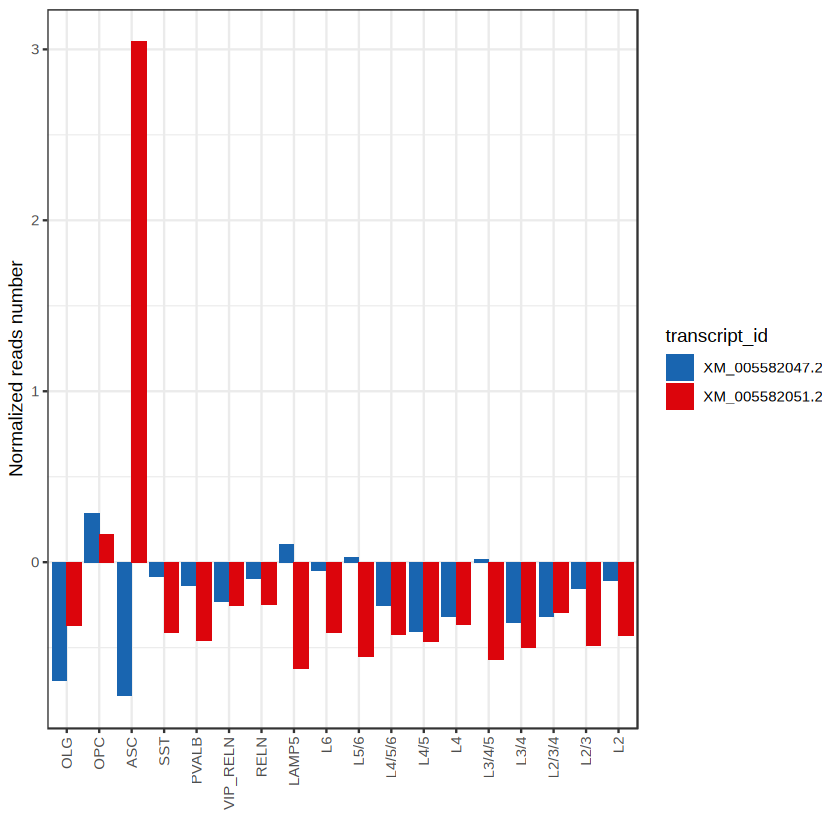

file saved to result/figure3/subclass_marker_case_plot_NTRK2_25_11_26.pdf

file saved to result/figure3/subclass_marker_case_plot_DBNDD2_25_11_26.pdf



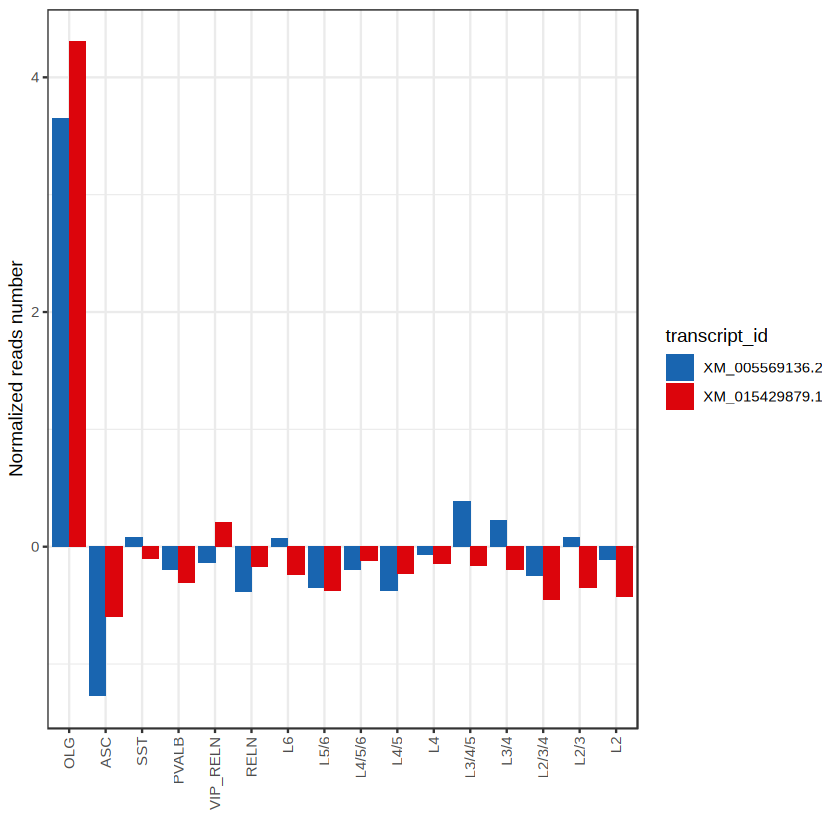

In [98]:
p1.1 = ggplot(mkdfi[mkdfi$gene_id == "NTRK2" & mkdfi$readnumt.x > 50 & mkdfi$transcript_id != "XM_005582049.2",],aes(x = areatr,fill = transcript_id,y = readnorm)) +
geom_bar(stat = "identity",position = "dodge") + scale_fill_discreterainbow() + 
theme_bw() + theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust = 1)) + ylab("Normalized reads number") + xlab("")
p1.1

p1.2 = ggplot(mkdfi[mkdfi$gene_id == "DBNDD2" & mkdfi$readnumt.x > 50 & mkdfi$transcript_id != "DBNDD2-FS-1",],
              aes(x = areatr,fill = transcript_id,y = readnorm)) +
geom_bar(stat = "identity",position = "dodge") + scale_fill_discreterainbow() + 
theme_bw() + theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust = 1)) + ylab("Normalized reads number") + xlab("")
p1.2
ggexport(p1.1,filename = "result/figure3/subclass_marker_case_plot_NTRK2_25_11_26.pdf",width = 6,height = 3)
ggexport(p1.2,filename = "result/figure3/subclass_marker_case_plot_DBNDD2_25_11_26.pdf",width = 6,height = 3)
#mkdfi[mkdfi$gene_id == "DBNDD2",]

In [30]:
unique(mkdfi$gene_id)
unique(mkdfi[mkdfi$`readnumt.x` > 5 & !mkdfi$transcript_id %in% c("XM_005582049.2","DBNDD2-WeiLab-1"),]$gene_id)

[1] CALB1   CAPZB   CUX2    DBNDD2  GAD1    LAMP5   NTRK2   PTN     PVALB  
[10] RORB    SLC17A7 SLC1A2  SST     VIP    
14 Levels: SLC17A7 CUX2 RORB GAD1 LAMP5 VIP PVALB SST CALB1 SLC1A2 ... PTN

[1] CALB1   CAPZB   CUX2    DBNDD2  GAD1    LAMP5   NTRK2   PTN     PVALB  
[10] RORB    SLC17A7 SLC1A2  SST     VIP    
14 Levels: SLC17A7 CUX2 RORB GAD1 LAMP5 VIP PVALB SST CALB1 SLC1A2 ... PTN

In [42]:
fsraw.fil = qread(file = "data/reads_full_anotation/main_data_read_total_annotation_fil_25_10_09.qs")
fsraw.fil[fsraw.fil$gene_id == "MYLK",]

readid                                                                                                    
21624908  4d12afd6-89ae-4be8-9742-fd4a633ae4fb-29;st_ed:A:17545-18303;AD:A:adapterL-adapterM;AP:A:Correct_712-736:+ 
42755875  3692a14d-d198-4b11-b729-2beae249cf56-7;st_ed:A:3740-4464;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_21-45:-
63974283  19cbe138-f9a3-4291-83b8-6ede0431ca54-9;st_ed:A:5690-6425;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-
63974284  7f9652f6-0a66-4003-968f-6e26f68337dc-3;st_ed:A:1101-1793;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-
131937750 m84075_240302_105507_s3/100012158/ccs/53_242                                                              
131937754 m84075_240302_105507_s3/100012158/ccs/53_242                                                              
132066091 m84075_240302_105507_s3/100795423/ccs/4773_5015                                                           
132066095 m84075_240302_105507_s3/100795423/ccs/4773_5015                                                           
132144074 m84075_240302_105507_s3/101192585/ccs/3676_4334                                                           
132144078 m84075_240302_105507_s3/101192585/ccs/3676_4334                                                           
132219473 m84075_240302_105507_s3/101647478/ccs/9768_10246                                                          
132219479 m84075_240302_105507_s3/101647478/ccs/9768_10246                                                          
132248747 m84075_240302_105507_s3/101783476/ccs/683_2378                                                            
132248751 m84075_240302_105507_s3/101783476/ccs/683_2378                                                            
132279911 m84075_240302_105507_s3/102039777/ccs/7632_8540                                                           
132279915 m84075_240302_105507_s3/102039777/ccs/7632_8540                                                           
132428469 m84075_240302_105507_s3/102893846/ccs/3780_4999                                                           
132428473 m84075_240302_105507_s3/102893846/ccs/3780_4999                                                           
132464710 m84075_240302_105507_s3/103028119/ccs/3595_4095                                                           
132464714 m84075_240302_105507_s3/103028119/ccs/3595_4095                                                           
132525796 m84075_240302_105507_s3/103419965/ccs/4049_4373                                                           
132525800 m84075_240302_105507_s3/103419965/ccs/4049_4373                                                           
132569741 m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
132569745 m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
132569750 m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
132569754 m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
132622590 m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
132622596 m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
132622599 m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
132622605 m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
⋮         ⋮                                                                                                         
248979871 fa67a39f-e0bb-4fbe-9bd0-29fa4c84af58                                                                      
248979873 fa67a39f-e0bb-4fbe-9bd0-29fa4c84af58                                                                      
248998262 fa7f346b-8158-430b-933

In [53]:
#gtfdfant.kn = read.csv(file = "ref/gtf_filter_final_with_newname_25_10_09.csv")
#gtfdfant.kn[gtfdfant.kn$gene_id == "MYLK",]
fsraw.case = fsraw.fil[fsraw.fil$gene_id == "MYLK",]
nrow(fsraw.case)
fsraw.case = fsraw.case[fsraw.case$transcript_id %in% gtfdfant.kn$transcript_id,]
fsraw.case
fsraw.case.fil = fsraw.case %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
fsraw.case.fil

[1] 3210

readid                                                                                                    
1    4d12afd6-89ae-4be8-9742-fd4a633ae4fb-29;st_ed:A:17545-18303;AD:A:adapterL-adapterM;AP:A:Correct_712-736:+ 
2    3692a14d-d198-4b11-b729-2beae249cf56-7;st_ed:A:3740-4464;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_21-45:-
3    19cbe138-f9a3-4291-83b8-6ede0431ca54-9;st_ed:A:5690-6425;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-
4    7f9652f6-0a66-4003-968f-6e26f68337dc-3;st_ed:A:1101-1793;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-
5    m84075_240302_105507_s3/100012158/ccs/53_242                                                              
6    m84075_240302_105507_s3/100012158/ccs/53_242                                                              
7    m84075_240302_105507_s3/100795423/ccs/4773_5015                                                           
8    m84075_240302_105507_s3/100795423/ccs/4773_5015                                                           
9    m84075_240302_105507_s3/101192585/ccs/3676_4334                                                           
10   m84075_240302_105507_s3/101192585/ccs/3676_4334                                                           
11   m84075_240302_105507_s3/101647478/ccs/9768_10246                                                          
12   m84075_240302_105507_s3/101647478/ccs/9768_10246                                                          
13   m84075_240302_105507_s3/101783476/ccs/683_2378                                                            
14   m84075_240302_105507_s3/101783476/ccs/683_2378                                                            
15   m84075_240302_105507_s3/102039777/ccs/7632_8540                                                           
16   m84075_240302_105507_s3/102039777/ccs/7632_8540                                                           
17   m84075_240302_105507_s3/102893846/ccs/3780_4999                                                           
18   m84075_240302_105507_s3/102893846/ccs/3780_4999                                                           
19   m84075_240302_105507_s3/103028119/ccs/3595_4095                                                           
20   m84075_240302_105507_s3/103028119/ccs/3595_4095                                                           
21   m84075_240302_105507_s3/103419965/ccs/4049_4373                                                           
22   m84075_240302_105507_s3/103419965/ccs/4049_4373                                                           
23   m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
24   m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
25   m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
26   m84075_240302_105507_s3/103617749/ccs/4008_4861                                                           
27   m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
28   m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
29   m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
30   m84075_240302_105507_s3/104006010/ccs/1652_2314                                                           
⋮    ⋮                                                                                                         
3181 fa67a39f-e0bb-4fbe-9bd0-29fa4c84af58                                                                      
3182 fa67a39f-e0bb-4fbe-9bd0-29fa4c84af58                                                                      
3183 fa7f346b-8158-430b-9339-67a5491f010a                                                                      
3184 fa7f346b-8158-430b-9339-67a5491f010a                                            

readid                                                                                                    
1 4d12afd6-89ae-4be8-9742-fd4a633ae4fb-29;st_ed:A:17545-18303;AD:A:adapterL-adapterM;AP:A:Correct_712-736:+ 
2 3692a14d-d198-4b11-b729-2beae249cf56-7;st_ed:A:3740-4464;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_21-45:-
3 19cbe138-f9a3-4291-83b8-6ede0431ca54-9;st_ed:A:5690-6425;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-
4 7f9652f6-0a66-4003-968f-6e26f68337dc-3;st_ed:A:1101-1793;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-
5 669b4c97-cbef-454d-8203-98dda4268b0e                                                                      
6 fec0a0ad-be3c-453d-bc83-812fbe2dc965                                                                      
  origin_name cell_id cell_type_id subclass class transcript_id  gene_id x    
1 L-preS-HC   NA      NA                          XM_005547961.2 MYLK    22195
2 L-CM-l3     NA      NA                          XM_005547961.2 MYLK    32970
3 L-V4-l6     NA      NA                          XM_005547961.2 MYLK    48583
4 L-V4-l6     NA      NA                          XM_005547961.2 MYLK    48583
5 L-TEO-l3    NA      NA                          XM_005547961.2 MYLK    51722
6 L-V4-l6     NA      NA                          XM_005547961.2 MYLK    48583
  y     layer region lobe      subcortical areatr metacell metacelln readnumt
1 76243 HC    preS   NA        Hippocampus        NA       1         51249260
2 56482 l3    CM     auditory  Cortex             NA       1         51249260
3 70839 l6    V4     occipital Cortex             NA       1         51249260
4 70839 l6    V4     occipital Cortex             NA       1         51249260
5 75076 l3    TEO    temporal  Cortex             NA       1         51249260
6 70839 l6    V4     occipital Cortex             NA       1         51249260

file saved to result/figure3/subclass_marker_case_plot_25_11_26.pdf



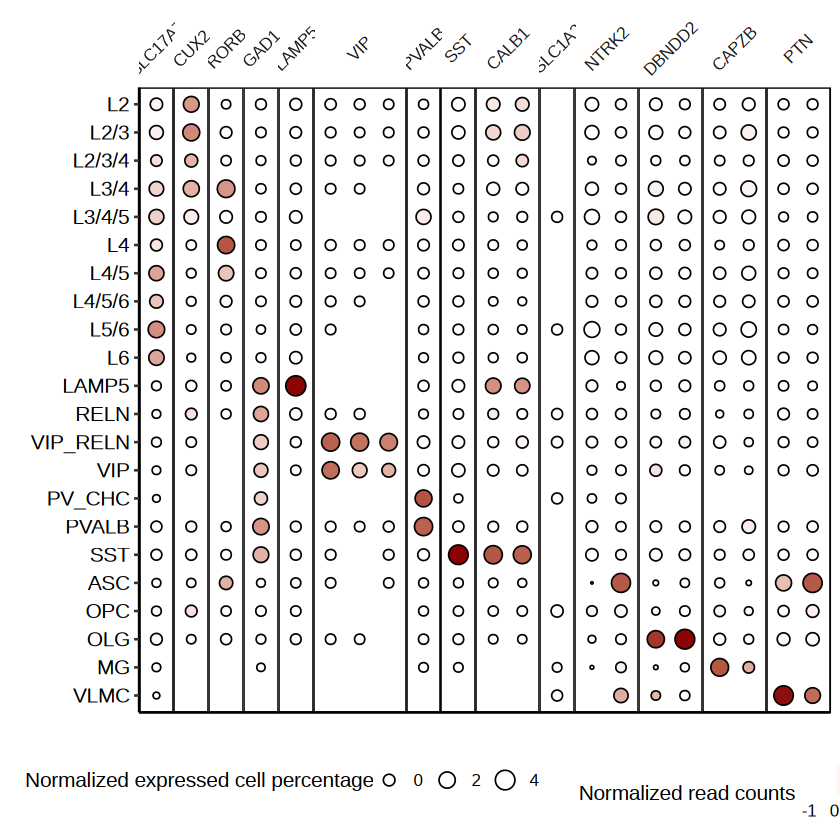

In [45]:
#head(mkdfi)
pt = ggplot(mkdfi[mkdfi$`readnumt.x` > 5 & !(mkdfi$transcript_id %in% c("XM_005582049.2","DBNDD2-FS-1")),],aes(x = areatr,y = transcript_id,fill = readnorm,size = cellpnorm)) + geom_point(shape = 21) + theme_pubr() + 
scale_fill_gradient2(low = "white",high = rgb(137,1,4,maxColorValue = 255)) + 
facet_grid(~gene_id,scales = "free",space = "free") + 
#geom_vline(xintercept = vertical.lines,lty="dashed", color = "black", linewidth = 0.5) +
scale_size_continuous(range = c(0.01,5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      panel.spacing = unit(0,'lines'),
      legend.position = "bottom",
      strip.text.x = element_text(angle = 45,vjust = 0.5),
     panel.border = element_rect(fill = NA)) +
coord_flip() + labs(x = "",y = "",fill = "Normalized read counts",size = "Normalized expressed cell percentage")
#vertical.lines = seq(1.5,nrow(objprect)-0.5,1)
pt
ggexport(pt,filename = "result/figure3/subclass_marker_case_plot_25_11_26.pdf",width = 18,height = 6)

In [22]:
rna_count <- srtt[["RNA"]]$count
dim(rna_count)

[1] 17973 37289

In [108]:
mkcase = c("SLC17A7","PDZD2","CUX2","MYLK",
           "RORB","IL1RAPL2","ETV1","TLE4","SEMA3E",
           "GAD1","LAMP5","FBXL7",
            "RELN","VIP","SOX6","PVALB","SST","CALB1","SLC1A2","NTRK2","SETD5","DBNDD2",
           "CAPZB","PTN","COL1A2")
mkcase = mkcase[mkcase %in% rownames(scale_data_matrix)]
mkdf = scale_data_matrix[mkcase,]
mkdf = as.matrix(mkdf)
mkdf = melt(mkdf,varnames = "row.names")
colnames(mkdf) = c("gene_id","cellid","norm")
mkdf$cellid = as.character(mkdf$cellid )
mkdf$subclass = MySplit(mkdf$cellid,"-",2)
mkdf = mkdf %>% group_by(subclass) %>% mutate(cellnumt = length(unique(cellid)))
nrow(mkdf[mkdf$gene_id == "SLC17A7",])

mkdf = mkdf %>% group_by(subclass,gene_id) %>% summarise(cellnum = length(norm[norm > 1]),norm = mean(norm),
                                                         cellprop = cellnum/cellnumt[1])
#mkdf = mkdf %>% group_by(gene_id) %>% mutate(cellprop = scale(cellprop))
mkdf[mkdf$gene_id == "SLC17A7",]

[1] 37289

`summarise()` has grouped output by 'subclass'. You can override using the
`.groups` argument.


subclass gene_id cellnum norm      cellprop 
1  ASC      SLC17A7 1157    0.8332403 0.4533699
2  EC       SLC17A7    2    0.6356999 0.4000000
3  L2       SLC17A7 1229    1.1541262 0.6151151
4  L2/3     SLC17A7 3344    1.4342214 0.7416279
5  L2/3/4   SLC17A7 1107    1.4764515 0.7350598
6  L3/4     SLC17A7 2880    1.5637808 0.8035714
7  L3/4/5   SLC17A7  297    1.7036479 0.8342697
8  L4       SLC17A7 2419    1.3426713 0.6991329
9  L4/5     SLC17A7 3440    1.7042705 0.8400488
10 L4/5/6   SLC17A7 2037    1.5407166 0.7786697
11 L5/6     SLC17A7 1739    1.8056862 0.8747485
12 L6       SLC17A7 1459    1.6388661 0.8280363
13 LAMP5    SLC17A7  209    0.9614464 0.5173267
14 MG       SLC17A7  132    0.9487439 0.5116279
15 OLG      SLC17A7 1668    1.2673036 0.6669332
16 OPC      SLC17A7  203    0.9146929 0.4987715
17 PVALB    SLC17A7 1045    1.0967218 0.5903955
18 PV_CHC   SLC17A7   32    0.6187160 0.3404255
19 RELN     SLC17A7  271    0.7306427 0.3950437
20 SST      SLC17A7 1039    1.0809501 0.5759424
21 VIP      SLC17A7  179    0.8901200 0.4890710
22 VIP_RELN SLC17A7  243    0.8878118 0.4691120
23 VLMC     SLC17A7   14    0.4722849 0.2800000

file saved to result/figure4/subclass_marker_case_plot_genelevel_25_03_12.pdf



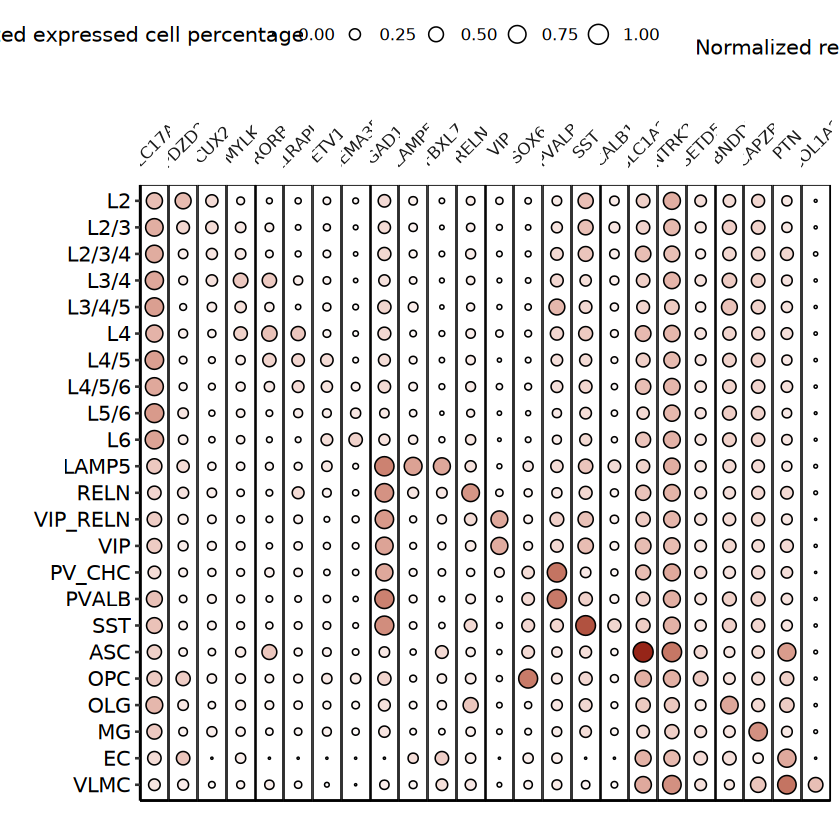

In [109]:
#
#mkcase = c("SLC17A7","GPR83","CUX2","PDZD2","CUX1","MYLK","PLCH1","RORB","IL1RAPL2","ETV1","TLE4","SEMA3E","GAD1","GAD2","ADARB2","LAMP5","FBXL7","KIT","EYA4","CALB2","RELN,
#           VIP","SOX6","DAMTSL1","PVALB","SST","CALB1","SLC1A2","SLC1A3","PTPRZ1","PDGFRA","COL9A1","PLP1","ITGAM","COL1A2")

suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')
#mkcase = c(mklc[mklc$cluster == areai,]$gene,"VIP")[1:10]
mkdf$subclass = factor(mkdf$subclass,levels = rev(suborder))
mkdf$gene_id = factor(mkdf$gene_id,levels = mkcase)
#head(mkdfi)
pt = ggplot(mkdf,aes(x = subclass,y = gene_id,fill = norm,size = cellprop)) + geom_point(shape = 21) + theme_pubr() + 
scale_fill_gradient2(low = "white",high = rgb(137,1,4,maxColorValue = 255),midpoint = 2.5,
                     mid = rgb(196,116,98,,maxColorValue = 255)) + 
facet_grid(~gene_id,scales = "free",space = "free") + 
#geom_vline(xintercept = vertical.lines,lty="dashed", color = "black", linewidth = 0.5) +
scale_size_continuous(range = c(0.001,5)) +
theme(axis.text.x = element_blank(),axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      panel.spacing = unit(0,'lines'),
      strip.text.x = element_text(angle = 45,vjust = 0.5),
     panel.border = element_rect(fill = NA)) +
coord_flip() + labs(x = "",y = "",fill = "Normalized read counts",size = "Normalized expressed cell percentage")
#vertical.lines = seq(1.5,nrow(objprect)-0.5,1)
pt
ggexport(pt,filename = "result/figure4/subclass_marker_case_plot_genelevel_25_03_12.pdf",width = 18,height = 6)

### DTU analysis

#### Basic Stat

In [18]:
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")
dtumkdf.hub[dtumkdf.hub$cluster == "NonNeuron",]$cluster = "NN"
datas3$Class_DTU = dtumkdf.hub
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
length(unique(isosigi$gene_id))
length(unique(dtumkdf.hub$gene_id))

[1] 1105

[1] 185

In [30]:
isosigi = isosigls$subclass
isosigi[isosigi$gene_id == "NTRK2",]

gene_id transcript_id  areatr   count genecount relative   meanrelative
57480 NTRK2   XM_005582047.2 ASC       41   1084      0.03782288 0.3069499   
57481 NTRK2   XM_005582047.2 L2       111    344      0.32267442 0.3069499   
57482 NTRK2   XM_005582047.2 L2/3     289    790      0.36582278 0.3069499   
57483 NTRK2   XM_005582047.2 L2/3/4    53    169      0.31360947 0.3069499   
57484 NTRK2   XM_005582047.2 L3/4     199    626      0.31789137 0.3069499   
57485 NTRK2   XM_005582047.2 L3/4/5    28     57      0.49122807 0.3069499   
57486 NTRK2   XM_005582047.2 L4       127    460      0.27608696 0.3069499   
57487 NTRK2   XM_005582047.2 L4/5     187    646      0.28947368 0.3069499   
57488 NTRK2   XM_005582047.2 L4/5/6   121    394      0.30710660 0.3069499   
57489 NTRK2   XM_005582047.2 L5/6     157    393      0.39949109 0.3069499   
57490 NTRK2   XM_005582047.2 L6       117    353      0.33144476 0.3069499   
57491 NTRK2   XM_005582047.2 LAMP5     20     51      0.39215686 0.3069499   
57492 NTRK2   XM_005582047.2 MG         6     26      0.23076923 0.3069499   
57493 NTRK2   XM_005582047.2 OLG       63    258      0.24418605 0.3069499   
57494 NTRK2   XM_005582047.2 OPC       18     66      0.27272727 0.3069499   
57495 NTRK2   XM_005582047.2 PVALB     83    272      0.30514706 0.3069499   
57496 NTRK2   XM_005582047.2 RELN      28     97      0.28865979 0.3069499   
57497 NTRK2   XM_005582047.2 SST       91    274      0.33211679 0.3069499   
57498 NTRK2   XM_005582047.2 VIP       13     37      0.35135135 0.3069499   
57499 NTRK2   XM_005582047.2 VIP_RELN  21     78      0.26923077 0.3069499   
57500 NTRK2   XM_005582049.2 ASC      202   1084      0.18634686 0.2901783   
57501 NTRK2   XM_005582049.2 L2       119    344      0.34593023 0.2901783   
57502 NTRK2   XM_005582049.2 L2/3     238    790      0.30126582 0.2901783   
57503 NTRK2   XM_005582049.2 L2/3/4    30    169      0.17751479 0.2901783   
57504 NTRK2   XM_005582049.2 L3/4     221    626      0.35303514 0.2901783   
57505 NTRK2   XM_005582049.2 L3/4/5    12     57      0.21052632 0.2901783   
57506 NTRK2   XM_005582049.2 L4       152    460      0.33043478 0.2901783   
57507 NTRK2   XM_005582049.2 L4/5     234    646      0.36222910 0.2901783   
57508 NTRK2   XM_005582049.2 L4/5/6   131    394      0.33248731 0.2901783   
57509 NTRK2   XM_005582049.2 L5/6     135    393      0.34351145 0.2901783   
57510 NTRK2   XM_005582049.2 L6       117    353      0.33144476 0.2901783   
57511 NTRK2   XM_005582049.2 LAMP5     22     51      0.43137255 0.2901783   
57512 NTRK2   XM_005582049.2 MG         3     26      0.11538462 0.2901783   
57513 NTRK2   XM_005582049.2 OLG       61    258      0.23643411 0.2901783   
57514 NTRK2   XM_005582049.2 OPC       13     66      0.19696970 0.2901783   
57515 NTRK2   XM_005582049.2 PVALB    109    272      0.40073529 0.2901783   
57516 NTRK2   XM_005582049.2 RELN      28     97      0.28865979 0.2901783   
57517 NTRK2   XM_005582049.2 SST       88    274      0.32116788 0.2901783   
57518 NTRK2   XM_005582049.2 VIP        9     37      0.24324324 0.2901783   
57519 NTRK2   XM_005582049.2 VIP_RELN  23     78      0.29487179 0.2901783   
57520 NTRK2   XM_005582051.2 ASC      841   1084      0.77583026 0.4028719   
57521 NTRK2   XM_005582051.2 L2       114    344      0.33139535 0.4028719   
57522 NTRK2   XM_005582051.2 L2/3     263    790      0.33291139 0.4028719   
57523 NTRK2   XM_005582051.2 L2/3/4    86    169      0.50887574 0.4028719   
57524 NTRK2   XM_005582051.2 L3/4     206    626      0.32907348 0.4028719   
57525 NTRK2   XM_005582051.2 L3/4/5    17     57      0.29824561 0.4028719   
57526 NTRK2   XM_005582051.2 L4       181    460      0.39347826 0.4028719   
57527 NTRK2   XM_005582051.2 L4/5     225    646      0.34829721 0.4028719   
57528 NTRK2   XM_005582051.2 L4/5/6   142    394      0.36040609 0.4028719   
57529 NTRK2   XM_005582051.2 L5/6     101    393      0.25699746 0.4028719   
57530 NTRK2   XM_005582051.2

areatr count group class    
1 ASC    389   gene  NonNeuron
2 L2     272   gene  GLU      
3 L2/3   202   gene  GLU      
4 L2/3/4 169   gene  GLU      
5 L3/4   189   gene  GLU      
6 L3/4/5 112   gene  GLU

file saved to result/figure4/dtu_number_stat_subclass_stat_total_25_10_11.pdf



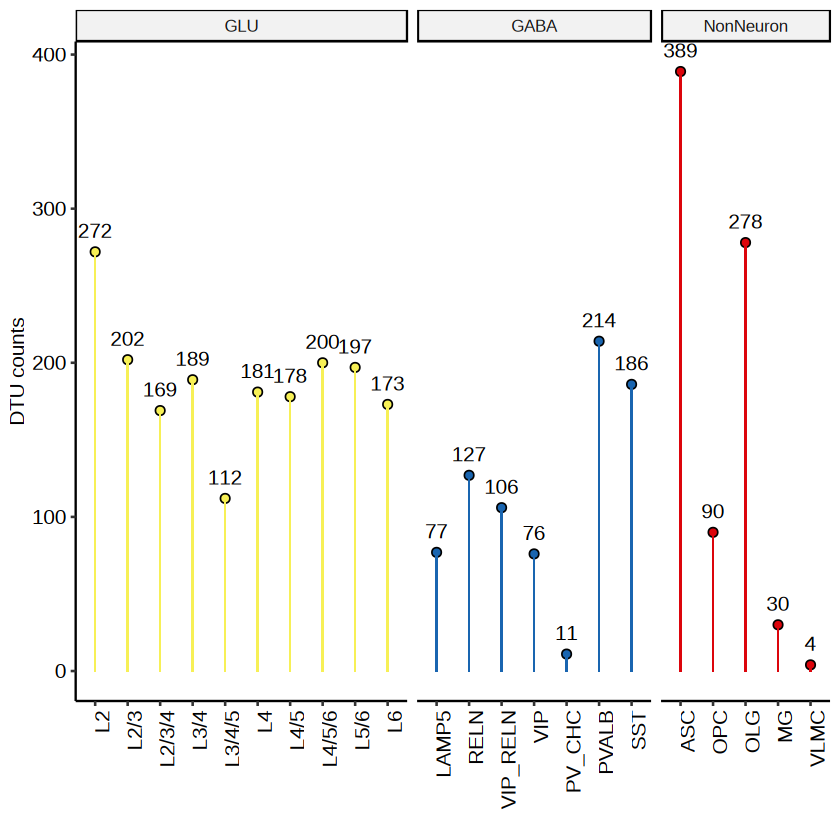

In [22]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
#isosigi = isosigi %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
dtustdfg = isosigi %>% group_by(areatr) %>% summarise(count = length(unique(gene_id)),group = "gene")
# dtumkdf.hub = dtumkdf.hub %>% group_by(gene_id) %>% filter(length(unique(cluster)) == 1)
# dtustdfg.cl = dtumkdf.hub %>% group_by(cluster) %>% summarise(count = length(unique(gene_id)),group = "gene")
# dtustdfg.cl[dtustdfg.cl$cluster == "NN",]$cluster = "NonNeuron"
#colnames(dtustdfg.cl)[1] = "areatr"
# dtustdfg.cl$class = dtustdfg.cl$areatr
# dtustdfg.cl$areatr = paste0(dtustdfg.cl$areatr,"-uni")
dtustdfg = merge(dtustdfg,cellan,by.x ="areatr",by.y = "subclass")
dtustdf = dtustdfg
dtustdf$areatr = factor(dtustdf$areatr,levels = suborder)
#dtustdf$areatr = factor(dtustdf$areatr,levels = c("GLU-uni","GABA-uni","NonNeuron-uni",suborder))
#dtustdft = isosigi %>% group_by(areatr) %>% summarise(count = length(unique(transcript_id)),group = "isoform")
#dtustdf = rbind(dtustdfg,dtustdft)
#dtustdf = merge(dtustdf,cellan,by.x ="areatr",by.y = "subclass")
#dtustdf = merge(dtustdf,cellst,by.x ="areatr",by.y = "subclass")
head(dtustdf)
dtustdf$classid = dtustdf$class
dtustdf$classid = factor(dtustdf$classid,levels = c("GLU","GABA","NonNeuron"))
pison1 = ggplot(data = dtustdf,aes(x = areatr,y = count,fill = class))+ 
    geom_point(position = position_dodge(0.5),shape = 21,size = 2) + 
    geom_bar(position = position_dodge(0.5),stat = "identity",width = 0.05) +
    facet_grid(~classid,space = "free",scale = "free") +
    geom_text(position = position_dodge(0.5),aes(label=count),vjust = -1) + 
    scale_fill_manual(values = c('#1965B0',"#F7F056",'#DC050C')) +
    scale_color_manual(values = c('#1965B0',"#F7F056",'#DC050C')) +
    theme_pubr() + theme(axis.text.x = element_text(angle = 90,hjust = 1),legend.position = "none") + 
xlab("") + ylab("DTU counts")
pison1
ggexport(pison1,filename = "result/figure4/dtu_number_stat_subclass_stat_total_25_10_11.pdf",width = 5.3,height = 3)

In [72]:
#DTU vs DEG
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
classmk = FindAllMarkers(srtt)

Calculating cluster GABA

Calculating cluster GLU

Calculating cluster NonNeuron



In [25]:
mkls = qread(file = "result/figure3/gene_marker_list_cell_24_12_09.qs")
classmk = mkls$class
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/Class_DTU_DEG_overlap_venn_25_12_03.pdf



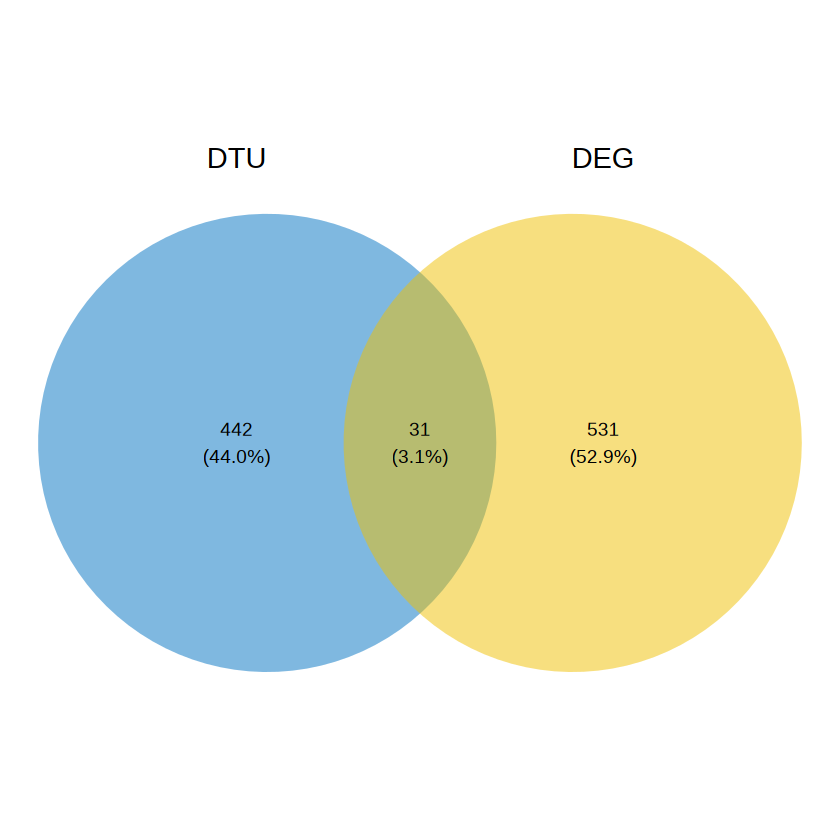

In [73]:
classmk.hub = classmk[classmk$p_val_adj < 0.01 & abs(classmk$avg_log2FC) > 1 & classmk$pct.1 > 0.25,]
deg.gene = unique(classmk.hub$gene)
# dtu.gene = unique(dtumkdf.hub$gene_id)
isosig = isosigls$class
dtu.gene = unique(isosig[isosig$sig != "N",]$gene_id)
#install.packages("BioVenn")
#specify values to use in venn diagram
#biovenn <- draw.venn(dtu.gene, deg.gene,list_z =NULL, xtitle="DTU", ytitle="DEG", ztitle="", 
#                      title="", subtitle="", nrtype="abs")
#plot(biovenn)
library(ggvenn)
pven = ggvenn(list("DTU" = dtu.gene,"DEG" = deg.gene),stroke_size = 0) + scale_fill_jco()
pven

ggexport(pven,filename = "result/figure3/Class_DTU_DEG_overlap_venn_25_12_03.pdf",
           width = 4, height = 4)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/subclass_layer_lobe_DTU_overlap_venn_25_10_11.pdf



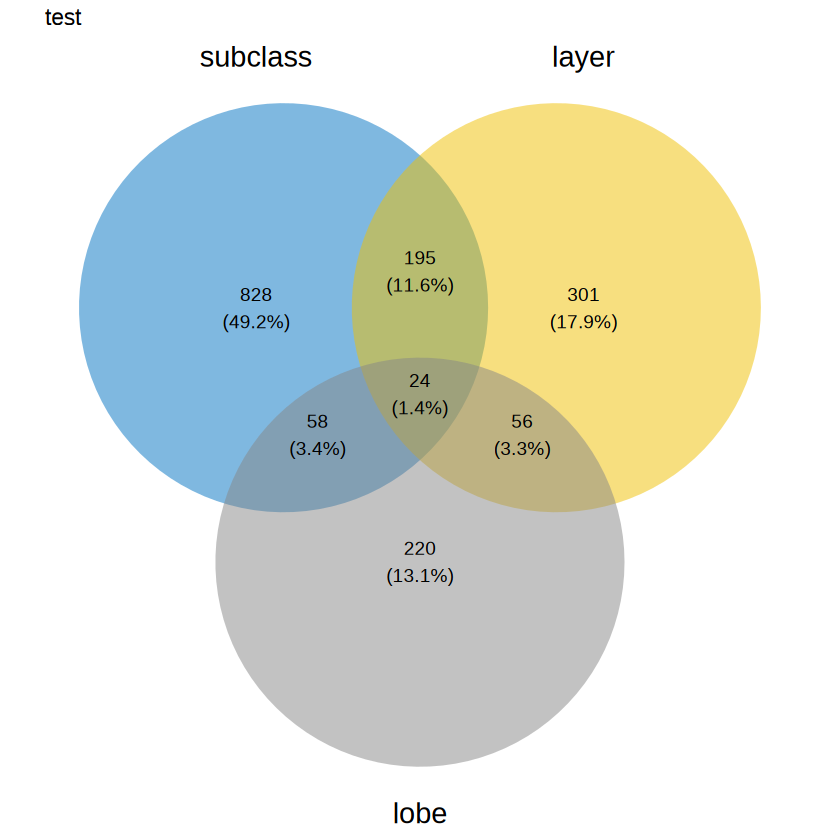

In [27]:
isosig = isosigls$subclass
dtu.sub = unique(isosig[isosig$sig != "N",]$gene_id)
isosig = isosigls$layer
dtu.layer = unique(isosig[isosig$sig != "N",]$gene_id)
isosig = isosigls$lobe
dtu.lobe = unique(isosig[isosig$sig != "N",]$gene_id)
library(ggvenn)
pven = ggvenn(list("subclass" = dtu.sub,"layer" = dtu.layer,"lobe" = dtu.lobe),stroke_size = 0) + scale_fill_jco()
pven + ggtitle("test")
ggexport(pven,filename = "result/figure3/subclass_layer_lobe_DTU_overlap_venn_25_10_11.pdf",
           width = 4, height = 4)

In [69]:
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "subclass"
subclassmk = FindAllMarkers(srtt)

Calculating cluster LAMP5

Calculating cluster PVALB

Calculating cluster PV_CHC

Calculating cluster RELN

Calculating cluster SST

Calculating cluster VIP

Calculating cluster VIP_RELN

Calculating cluster L2

Calculating cluster L2/3

Calculating cluster L2/3/4

Calculating cluster L3/4

Calculating cluster L3/4/5

Calculating cluster L4

Calculating cluster L4/5

Calculating cluster L4/5/6

Calculating cluster L5/6

Calculating cluster L6

Calculating cluster ASC

Calculating cluster EC

Calculating cluster MG

Calculating cluster OLG

Calculating cluster OPC

Calculating cluster VLMC



Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/Sublass_DTU_DEG_overlap_venn_25_12_03.pdf



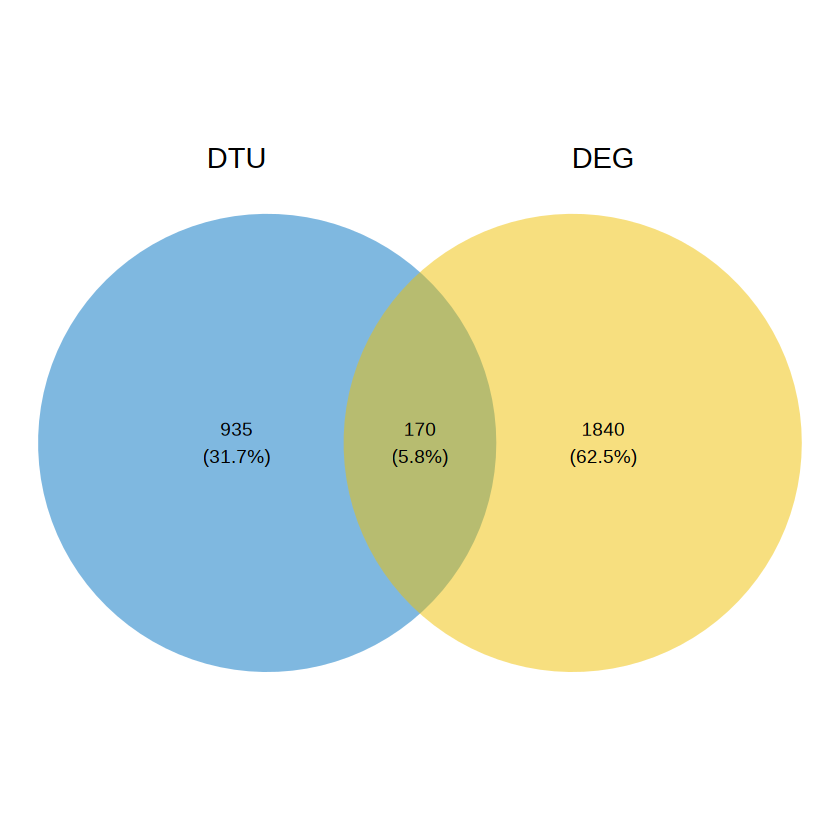

In [71]:
submk.hub = subclassmk[subclassmk$p_val_adj < 0.01 & abs(subclassmk$avg_log2FC) > 1 & subclassmk$pct.1 > 0.25,]
deg.gene = unique(submk.hub$gene)
isosig = isosigls$subclass
dtu.gene = unique(isosig[isosig$sig != "N",]$gene_id)

#install.packages("BioVenn")
#specify values to use in venn diagram
#biovenn <- draw.venn(dtu.gene, deg.gene,list_z =NULL, xtitle="DTU", ytitle="DEG", ztitle="", 
#                      title="", subtitle="", nrtype="abs")
#plot(biovenn)
library(ggvenn)
pven = ggvenn(list("DTU" = dtu.gene,"DEG" = deg.gene),stroke_size = 0) + scale_fill_jco()
pven
ggexport(pven,filename = "result/figure3/Sublass_DTU_DEG_overlap_venn_25_12_03.pdf",
           width = 4, height = 4)

In [ ]:
#DTU stat
isosig = isosigls$subclass
#filter
isosigf = isosig[isosig$pvalue < 0.05,]
length(unique(isosigf$gene_id))
tdtuid = unique(isosigf$gene_id)
library(ggvenn)

gvls = list()
hubtrans = NULL
hubtransdf = NULL
#colnames(hubtransdf)[2] = "cluster"
hubgenedf = unique(isosigf[isosigf$sig == "Up",c("gene_id","areatr")])
colnames(hubgenedf)[2] = "cluster"
for(i in 1:length(isosigls.cl)){
    tdtui = isosigls.cl[[i]]
    hubtransi = unique(tdtui[!tdtui$sig %in% c("N","Y"),]$transcript_id)
    hubtrans = unique(c(hubtrans,hubtransi))
    tdtui = unique(tdtui[!tdtui$sig %in% c("N","Y"),]$gene_id)
    hubgenedf = rbind(hubgenedf,data.frame("gene_id" = tdtui,"cluster" = names(isosigls.cl)[i]))
    hubtransdf = rbind(hubtransdf,data.frame("transcript_id" = hubtransi,"cluster" = names(isosigls.cl)[i]))
#    print(names(isosigls.cl)[i])
#    print(length(intersect(tdtuid,tdtui)))
#    gvls[[i]] = ggvenn(list("total" = tdtuid, "chunk" = tdtui))
}
#print(gvls)
length(hubtrans)
nrow(hubgenedf)

In [ ]:
#basic plot
dtustdf = NULL
dtustdfup = NULL
isosigls.cl2 = isosigls.cl
names(isosigls.cl2) = c("Neuron vs NN","GABA vs NN","GLU vs NN","GABA vs GLU","Within GABA","Within GLU","Within NN")
for(i in 1:length(isosigls.cl2)){
    tdtui = isosigls.cl2[[i]]
    hubti = unique(tdtui[tdtui$sig != "N" & abs(tdtui$dr) > 0.1,]$transcript_id)
    hubti = hubti[hubti %in% fsrawdp$transcript_id]
    hubgi = unique(tdtui[tdtui$sig != "N" & abs(tdtui$dr) > 0.1,]$gene_id)
    dtustdf = rbind(dtustdf,data.frame("group" = names(isosigls.cl2)[i],
                                       "count" = c(length(unique(hubti)),length(unique(hubgi))),
                                       "type" = c("isoform","gene")))
    dtustdfup = rbind(dtustdfup,data.frame("group" = names(isosigls.cl2)[i], "txid" = c(hubti,hubgi), 
                                           "type" = c(rep("isoform",length(hubti)), rep("gene",length(hubgi))) ))
}

#dtustdfup = dcast(dtustdfup,txid+type~group,fun.aggregate = length)
head(dtustdfup)


In [ ]:
#plot basic stat
dtustdf = dtustdf[order(dtustdf$group),]
pb1 = ggplot(dtustdf,aes(x = group,y = count, fill = type)) + 
geom_bar(stat = "identity",position = "dodge",color = "black",width = 0.9) + 
geom_text(aes(label = count),angle = 90,position = position_dodge(0.9),hjust = 1) +
theme_pubr() + 
theme(axis.text.x = element_text(angle = 90)) + scale_fill_flatui() + xlab("") + ylab("DTU Isoform/gene number")
pb1
ggexport(pb1,filename = "result/figure3/dtu_number_stat_class_24_04_02.pdf",width = 3,height = 5)

In [ ]:
library(ggupset)
#dtustdfup = dtustdfup[,c("txid","type","group")]
dtustdfup2 = dtustdfup[dtustdfup$group %in% c("GABA vs GLU","GABA vs NN", "GLU vs NN"),] %>%
  group_by(type,txid) %>%
  summarize(group = list(group))
pisonup1 = ggplot(data = dtustdfup2,aes(x = group,fill = type))+ 
    scale_x_upset() + 
    geom_point(stat = "count",position = position_dodge(0.5),shape = 21,size = 5) + 
    geom_bar(position = position_dodge(0.5),width = 0.1) +
    geom_text(stat = "count",aes(label=after_stat(count)),position = position_dodge(0.5),vjust = -1) + 
    scale_fill_flatui() +
    scale_color_flatui() +
    theme_pubr()
pisonup1
ggexport(pisonup1,filename = "result/figure3/dtu_number_stat_class_upset_24_04_22.pdf",width = 5,height = 5)

In [ ]:
colnames(dtustdfup)[3:9] = c("Within GABA","GABA vs GLU","GABA vs NN","Within GLU","GLU vs NN","Neuron vs NN","Within NN")
genres = colnames(dtustdfup)[3:9]

upset(
    dtustdfup,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=type)
        )
    ),
    width_ratio=0.1
)

#### Case UMAP plot

In [ ]:
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
classmk = FindAllMarkers(srtt)
head(classmk)
Idents(srtt) = "class"
DimPlot(srtt)

In [58]:
library(scCustomize)

In [67]:
library(scCustomize)
DefaultAssay(srtt) = "ISOFORM"
isodf = GetAssayData(srtt,assay = "ISOFORM")
umapdf = as.data.frame(srtt@reductions$umap@cell.embeddings)
library(ggpointdensity)
featurei = c("GRIP1-XM-015431169.1","GRIP1-XM-015431173.1")
Feature_Density = function(umapdf,isodf,featurei){
    pci3 = list()
    for(i in 1:length(featurei)){
        # library(ggpointdensity)
        isodfi = isodf[featurei[i],]
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
        pci3i = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.1) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(featurei[i])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
        # ggtitle(featurei[i]) + theme_void() + coord_fixed()
        pci3[[i]] = pci3i
    }
    pci3 = ggarrange(plotlist = pci3,common.legend = T,legend = "right")
    pci3
    return(pci3)
}

#pal <- viridis(n = 10, option = "D")
#Plot_Density_Custom(seurat_object = srtt, features = "CDC42-NM-001283401.1",cols = pal)
#Plot_Density_Custom(seurat_object = srtt, features = "CDC42-CDC42-WeiLab-1",cols = pal)
#FeaturePlot(srtt,features = c("COL5A2-MICALL1-WeiLab-1"),order = TRUE,pt.size = sn) + scale_color_viridis(option = "B")
#FeaturePlot(srtt,features = c("COL5A2-MICALL1-WeiLab-2"),order = TRUE,pt.size = sn) + scale_color_viridis(option = "B")


In [68]:
pdtucd = list()
pdtucd[[1]] = Feature_Density(umapdf, isodf, featurei = c("NTRK2-XM-005582047.2","NTRK2-XM-005582051.2"))
pdtucd[[2]] = Feature_Density(umapdf, isodf, featurei = c("DDRGK1-DDRGK1-FS-1","DDRGK1-XM-005568473.2"))
#pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"))
#pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("DBNDD2-XM-015429879.1","DBNDD2-XM-005569136.2"))
pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("TUSC3-XM-005562645.2","TUSC3-XM-005562646.2"))
pdtucd = ggarrange(plotlist = pdtucd,nrow = 3)
ggexport(pdtucd,filename = "result/figure3/DTU_UMAP_cases_plot_density_25_12_03.pdf",width = 6,height = 9)

file saved to result/figure3/DTU_UMAP_cases_plot_density_25_12_03.pdf



In [50]:
isosigi = isosigls$subclass
geneex = "AKR1A1"
isosigi[isosigi$gene_id == geneex,]

gene_id transcript_id  areatr count genecount relative  meanrelative
3265 AKR1A1  XM_005595589.2 ASC     27    85       0.3176471 0.4387589   
3266 AKR1A1  XM_005595589.2 L2      20    51       0.3921569 0.4387589   
3267 AKR1A1  XM_005595589.2 L2/3    53   189       0.2804233 0.4387589   
3268 AKR1A1  XM_005595589.2 L2/3/4  18    40       0.4500000 0.4387589   
3269 AKR1A1  XM_005595589.2 L3/4    71   190       0.3736842 0.4387589   
3270 AKR1A1  XM_005595589.2 L4      42    99       0.4242424 0.4387589   
3271 AKR1A1  XM_005595589.2 L4/5    84   194       0.4329897 0.4387589   
3272 AKR1A1  XM_005595589.2 L4/5/6  45   120       0.3750000 0.4387589   
3273 AKR1A1  XM_005595589.2 L5/6    55   112       0.4910714 0.4387589   
3274 AKR1A1  XM_005595589.2 L6      37    81       0.4567901 0.4387589   
3275 AKR1A1  XM_005595589.2 OLG     56   115       0.4869565 0.4387589   
3276 AKR1A1  XM_005595589.2 PVALB   46    79       0.5822785 0.4387589   
3277 AKR1A1  XM_005595589.2 SST     41    64       0.6406250 0.4387589   
3278 AKR1A1  XM_005595593.2 ASC     56    85       0.6588235 0.5536058   
3279 AKR1A1  XM_005595593.2 L2      31    51       0.6078431 0.5536058   
3280 AKR1A1  XM_005595593.2 L2/3   136   189       0.7195767 0.5536058   
3281 AKR1A1  XM_005595593.2 L2/3/4  22    40       0.5500000 0.5536058   
3282 AKR1A1  XM_005595593.2 L3/4   118   190       0.6210526 0.5536058   
3283 AKR1A1  XM_005595593.2 L4      57    99       0.5757576 0.5536058   
3284 AKR1A1  XM_005595593.2 L4/5   107   194       0.5515464 0.5536058   
3285 AKR1A1  XM_005595593.2 L4/5/6  74   120       0.6166667 0.5536058   
3286 AKR1A1  XM_005595593.2 L5/6    57   112       0.5089286 0.5536058   
3287 AKR1A1  XM_005595593.2 L6      44    81       0.5432099 0.5536058   
3288 AKR1A1  XM_005595593.2 OLG     58   115       0.5043478 0.5536058   
3289 AKR1A1  XM_005595593.2 PVALB   30    79       0.3797468 0.5536058   
3290 AKR1A1  XM_005595593.2 SST     23    64       0.3593750 0.5536058   
     otherrelative dr           sig  pvalue      padj        
3265 0.4488515     -0.131204443 Down 1.57888e-06 2.184531e-05
3266 0.4426424     -0.050485489 N    1.57888e-06 2.184531e-05
3267 0.4519535     -0.171530203 Down 1.57888e-06 2.184531e-05
3268 0.4378221      0.012177910 N    1.57888e-06 2.184531e-05
3269 0.4441817     -0.070497529 N    1.57888e-06 2.184531e-05
3270 0.4399686     -0.015726131 N    1.57888e-06 2.184531e-05
3271 0.4392396     -0.006249925 N    1.57888e-06 2.184531e-05
3272 0.4440721     -0.069072090 N    1.57888e-06 2.184531e-05
3273 0.4343995      0.056671957 N    1.57888e-06 2.184531e-05
3274 0.4372562      0.019533877 N    1.57888e-06 2.184531e-05
3275 0.4347424      0.052214142 N    1.57888e-06 2.184531e-05
3276 0.4267989      0.155479598 Up   1.57888e-06 2.184531e-05
3277 0.4219367      0.218688326 Up   1.57888e-06 2.184531e-05
3278 0.5448376      0.113985927 Up   1.57888e-06 2.184531e-05
3279 0.5490860      0.058757169 N    1.57888e-06 2.184531e-05
3280 0.5397748      0.179801883 Up   1.57888e-06 2.184531e-05
3281 0.5539062     -0.003906230 N    1.57888e-06 2.184531e-05
3282 0.5479852      0.073067454 N    1.57888e-06 2.184531e-05
3283 0.5517598      0.023997810 N    1.57888e-06 2.184531e-05
3284 0.5537774     -0.002230972 N    1.57888e-06 2.184531e-05
3285 0.5483507      0.068315992 N    1.57888e-06 2.184531e-05
3286 0.5573288     -0.048400278 N    1.57888e-06 2.184531e-05
3287 0.5544721     -0.011262197 N    1.57888e-06 2.184531e-05
3288 0.5577106     -0.053362752 N    1.57888e-06 2.184531e-05
3289 0.5680940     -0.188347158 Down 1.57888e-06 2.184531e-05
3290 0.5697916     -0.210416647 Down 1.57888e-06 2.184531e-05

In [128]:
#classmk.hub = classmk[classmk$avg_log2FC > 1 & classmk$p_val_adj < 0.05 & classmk$`pct.1` > 0.3,]
isosigi = isosigls$subclass
isosigi[isosigi$gene_id == "SIVA1",]
isosigi = isosigi[isosigi$sig != "N" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[isosigi$areatr == "RELN" & isosigi$count > 50,]
isosigi = isosigi[order(-isosigi$genecount),]
isosigi
#isosigi[isosigi$gene_id %in% c("CDC42","MYL6","RWDD1"),]
#classmk.hub[classmk.hub$gene %in% isosigi$gene_id,]

gene_id transcript_id  areatr   count genecount relative   meanrelative
102295 SIVA1   XM_005562346.2 ASC      188   205       0.91707317 0.90905446  
102296 SIVA1   XM_005562346.2 L2       299   321       0.93146417 0.90905446  
102297 SIVA1   XM_005562346.2 L2/3     897   984       0.91158537 0.90905446  
102298 SIVA1   XM_005562346.2 L2/3/4   180   203       0.88669951 0.90905446  
102299 SIVA1   XM_005562346.2 L3/4     610   666       0.91591592 0.90905446  
102300 SIVA1   XM_005562346.2 L3/4/5    62    66       0.93939394 0.90905446  
102301 SIVA1   XM_005562346.2 L4       407   464       0.87715517 0.90905446  
102302 SIVA1   XM_005562346.2 L4/5     643   728       0.88324176 0.90905446  
102303 SIVA1   XM_005562346.2 L4/5/6   343   375       0.91466667 0.90905446  
102304 SIVA1   XM_005562346.2 L5/6     351   382       0.91884817 0.90905446  
102305 SIVA1   XM_005562346.2 L6       336   355       0.94647887 0.90905446  
102306 SIVA1   XM_005562346.2 LAMP5     53    54       0.98148148 0.90905446  
102307 SIVA1   XM_005562346.2 OLG      223   246       0.90650407 0.90905446  
102308 SIVA1   XM_005562346.2 OPC       34    36       0.94444444 0.90905446  
102309 SIVA1   XM_005562346.2 PVALB    211   230       0.91739130 0.90905446  
102310 SIVA1   XM_005562346.2 RELN      91   116       0.78448276 0.90905446  
102311 SIVA1   XM_005562346.2 SST      238   258       0.92248062 0.90905446  
102312 SIVA1   XM_005562346.2 VIP       39    44       0.88636364 0.90905446  
102313 SIVA1   XM_005562346.2 VIP_RELN  78    88       0.88636364 0.90905446  
102314 SIVA1   XM_005562347.2 ASC       17   205       0.08292683 0.09094554  
102315 SIVA1   XM_005562347.2 L2        22   321       0.06853583 0.09094554  
102316 SIVA1   XM_005562347.2 L2/3      87   984       0.08841463 0.09094554  
102317 SIVA1   XM_005562347.2 L2/3/4    23   203       0.11330049 0.09094554  
102318 SIVA1   XM_005562347.2 L3/4      56   666       0.08408408 0.09094554  
102319 SIVA1   XM_005562347.2 L3/4/5     4    66       0.06060606 0.09094554  
102320 SIVA1   XM_005562347.2 L4        57   464       0.12284483 0.09094554  
102321 SIVA1   XM_005562347.2 L4/5      85   728       0.11675824 0.09094554  
102322 SIVA1   XM_005562347.2 L4/5/6    32   375       0.08533333 0.09094554  
102323 SIVA1   XM_005562347.2 L5/6      31   382       0.08115183 0.09094554  
102324 SIVA1   XM_005562347.2 L6        19   355       0.05352113 0.09094554  
102325 SIVA1   XM_005562347.2 LAMP5      1    54       0.01851852 0.09094554  
102326 SIVA1   XM_005562347.2 OLG       23   246       0.09349593 0.09094554  
102327 SIVA1   XM_005562347.2 OPC        2    36       0.05555556 0.09094554  
102328 SIVA1   XM_005562347.2 PVALB     19   230       0.08260870 0.09094554  
102329 SIVA1   XM_005562347.2 RELN      25   116       0.21551724 0.09094554  
102330 SIVA1   XM_005562347.2 SST       20   258       0.07751938 0.09094554  
102331 SIVA1   XM_005562347.2 VIP        5    44       0.11363636 0.09094554  
102332 SIVA1   XM_005562347.2 VIP_RELN  10    88       0.11363636 0.09094554  
       otherrelative dr           sig  pvalue       padj        
102295 0.90860897     0.008464199 N    0.0001004914 0.0008219245
102296 0.90780947     0.023654703 N    0.0001004914 0.0008219245
102297 0.90891385     0.002671516 N    0.0001004914 0.0008219245
102298 0.91029640    -0.023596890 N    0.0001004914 0.0008219245
102299 0.90867326     0.007242652 N    0.0001004914 0.0008219245
102300 0.90736893     0.032025011 N    0.0001004914 0.0008219245
102301 0.91082664    -0.033671466 N    0.0001004914 0.0008219245
102302 0.91048849    -0.027246736 N    0.0001004914 0.0008219245
102303 0.90874267     0.005924000 N    0.0001004914 0.0008219245
102304 0.90851036     0.010337807 N    0.0001004914 0.0008219245
102305 0.90697532     0.039503552 N    0.0001004914 0.0008219245
102306 0.90503073     0.076450749 N    0.0001004914 0.0008219245
102307 0.90919614    -0.002692079 N    0.0001004914 0.0008219245
102308 0.9070883

gene_id transcript_id  areatr count genecount relative  meanrelative
109931 SUPT5H  XM_005589194.2 RELN   67    86        0.7790698 0.9215735   
121849 UCHL5   XM_005540283.2 RELN   52    59        0.8813559 0.7293573   
       otherrelative dr         sig  pvalue       padj        
109931 0.9294904     -0.1504206 Down 7.642048e-05 0.0006503127
121849 0.7209130      0.1604430 Up   1.163037e-02 0.0387269081

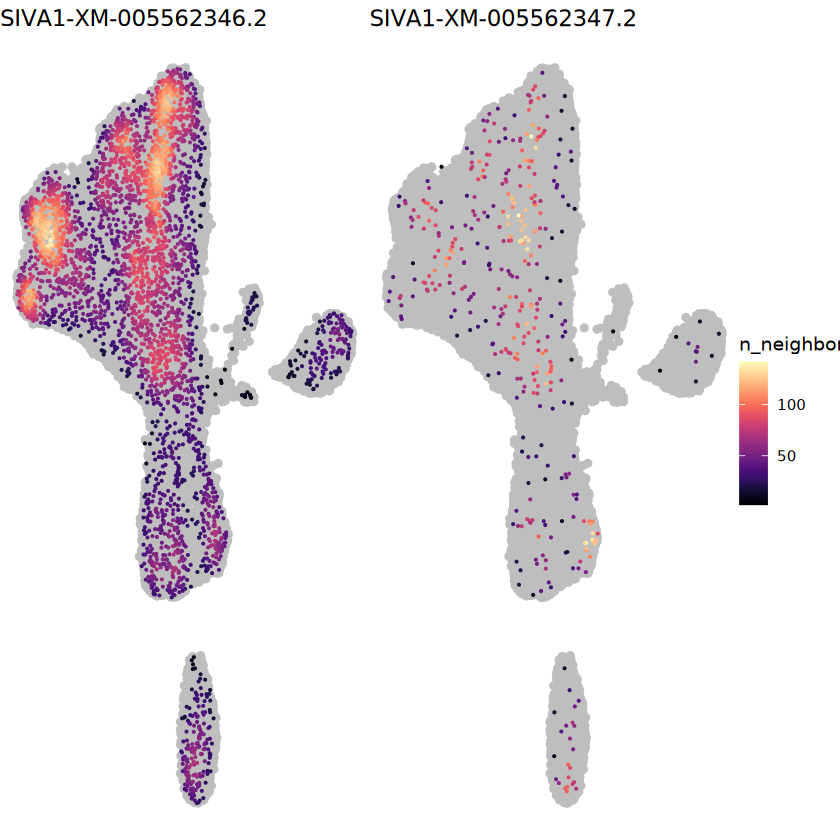

In [129]:
#Feature_Density(umapdf, isodf, featurei = c("MATN2-MATN2-WeiLab-1","MATN2-XM-005563764.2"))
#Feature_Density(umapdf, isodf, featurei = c("CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"))
#Feature_Density(umapdf, isodf, featurei = c("DBNDD2-XM-015429879.1","DBNDD2-XM-005569136.2"))
#Feature_Density(umapdf, isodf, featurei = c("AKR1A1-XM-005595589.2","AKR1A1-XM-005595593.2"))
Feature_Density(umapdf, isodf, featurei = c("SIVA1-XM-005562346.2","SIVA1-XM-005562347.2"))
#"STRA13","AKR1A1"

In [ ]:
pdtucd = list()
pdtucd[[1]] = Feature_Density(umapdf, isodf, featurei = c("GRIP1-XM-015431169.1","GRIP1-XM-015431173.1"))
pdtucd[[2]] = Feature_Density(umapdf, isodf, featurei = c("GNAO1-XM-005591961.1","GNAO1-XM-005591962.1"))
pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("ZNF385B-XM-005573610.2","ZNF385B-XM-015432444.1"))
ggexport(pdtucd,filename = "result/figure3/DTU_UMAP_cases_plot_density_24_12_11.pdf",width = 9,height = 5)

In [ ]:
#FeaturePlot(srtt,features = c("SLC17A7
#srtt@assays
#DefaultAssay(srtt) = "ISOFORM"
pal <- viridis(n = 10, option = "C")
pmkls = list()
pmkls[[1]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("SLC17A7","SLC17A7-XM-005589901.2"),na_cutoff = 1.5,
                                  order = T,colors_use = pal)
pmkls[[2]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("GAD2","GAD2-XM-005564810.2"),na_cutoff = 1,
                                  order = T,colors_use = pal)
#FeaturePlot_scCustom(seurat_object = srtt, features = "SLC17A7-XM-005589901.2",order = T)
#FeaturePlot(srtt,features = c("SLC17A7"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("SLC17A7-XM-005589901.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#classmk[classmk$gene == "SLC17A7",]
#FeaturePlot_scCustom(seurat_object = srtt, features = c("GAD1","GAD1-XM-005573441.2"),order = T)
#FeaturePlot_scCustom(seurat_object = srtt, features = "GAD1-XM-005573441.2",order = T)
#FeaturePlot(srtt,features = c("GAD1"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("GAD1-XM-005573441.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")

#FeaturePlot_scCustom(seurat_object = srtt, features = "GAD2-XM-005564810.2",order = T)

# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4-NM-001284944.1",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4-XM-005554562.2",order = T)
#FeaturePlot(srtt,features = c("GAD2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("GAD2-XM-005564810.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
pmkls
ggexport(pmkls,filename = "result/figure3/Class_Marker_UMAP_cases_plot_24_10_27.pdf",width = 8,height = 4)

In [ ]:
pmkc = Stacked_VlnPlot(seurat_object = srtt, features = c("SLC17A7","SLC17A7-XM-005589901.2","GAD2","GAD2-XM-005564810.2"), 
                x_lab_rotate = TRUE)
pmkc
ggexport(pmkc,filename = "result/figure3/Class_Marker_violin_cases_plot_24_10_27.pdf",width = 6,height = 5)

In [ ]:
# FeaturePlot_scCustom(seurat_object = srtt, features = c("CDC42","CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"),order = T,
#                      na_cutoff = 1,colors_use = pal)
# FeaturePlot_scCustom(seurat_object = srtt, features = c("MYL6","MYL6-MYL6-WeiLab-1","MYL6-MYL6-WeiLab-2"),order = T,
#                      na_cutoff = 1,colors_use = pal)
geneex = "SIVA1"
isosigi = isosigls$class
featurei = unique(isosigi[isosigi$gene_id == geneex,]$transcript_id)
featurei = gsub("_","-",featurei)
featurei = paste0(geneex,"-",featurei)
featurei = c(geneex,featurei)
pdtui = FeaturePlot_scCustom(seurat_object = srtt, features = featurei,order = T,
                     colors_use = pal)
ggexport(pdtui,filename = "result/figure3/DTU_UMAP_cases_plot_SIVA1_24_10_27.pdf",width = 8,height = 8)
# FeaturePlot_scCustom(seurat_object = srtt, features = "AQP4",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "MYT1",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "OPALIN",order = T)

In [ ]:
#sn = 0.5
pal <- viridis(n = 10, option = "C")
pdtuc = FeaturePlot_scCustom(seurat_object = srtt, features = c("SEPT8","SEPT8-XM-005557744.2","SEPT8-XM-005557741.2",
                                                                    "GNAO1","GNAO1-XM-005591961.1","GNAO1-XM-005591962.1",
                                                                    "C15H9orf3","C15H9orf3-XM-005582299.2","C15H9orf3-XM-015436610.1"),
                             order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
#pdtuc[[2]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("GNAO1","GNAO1-XM-005591961.1","GNAO1-XM-005591962.1"),order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
#pdtuc[[3]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("ZNF385B","ZNF385B-XM-015432444.1","ZNF385B-XM-005573610.2"),order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
ggexport(pdtuc,filename = "result/figure3/DTU_UMAP_cases_plot_24_10_27.pdf",width = 12,height = 12)

In [ ]:
#classmk.hub = classmk[classmk$avg_log2FC > 1 & classmk$p_val_adj < 0.05 & classmk$`pct.1` > 0.3,]
isosigi = isosigls$class
isosigi[isosigi$gene_id == "C15H9orf3",]
isosigi = isosigi[isosigi$sig != "N" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[isosigi$areatr == "GABA" & isosigi$genecount > 50,]
isosigi = isosigi[order(-isosigi$genecount),]
unique(isosigi$gene_id)
#isosigi[isosigi$gene_id %in% c("CDC42","MYL6","RWDD1"),]
#classmk.hub[classmk.hub$gene %in% isosigi$gene_id,]

In [ ]:
geneex = "KCNIP4"
#transid = c("XM_005545567.2","XM_015445010.1")
isosigi = isosigls$class
unique(isosigi[isosigi$gene_id == geneex,]$transcript_id)
#mycolor = c('#DC050C','#1965B0')
#names(mycolor) = transid
fsraw.cor$areatr = fsraw.cor$class
IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL)

In [ ]:
as.data.frame(gtf[gtf$gene_id == "LAMP2",])

#### Class isoform clone cluster analysis

[1] 837

[1] 473

[1] 473

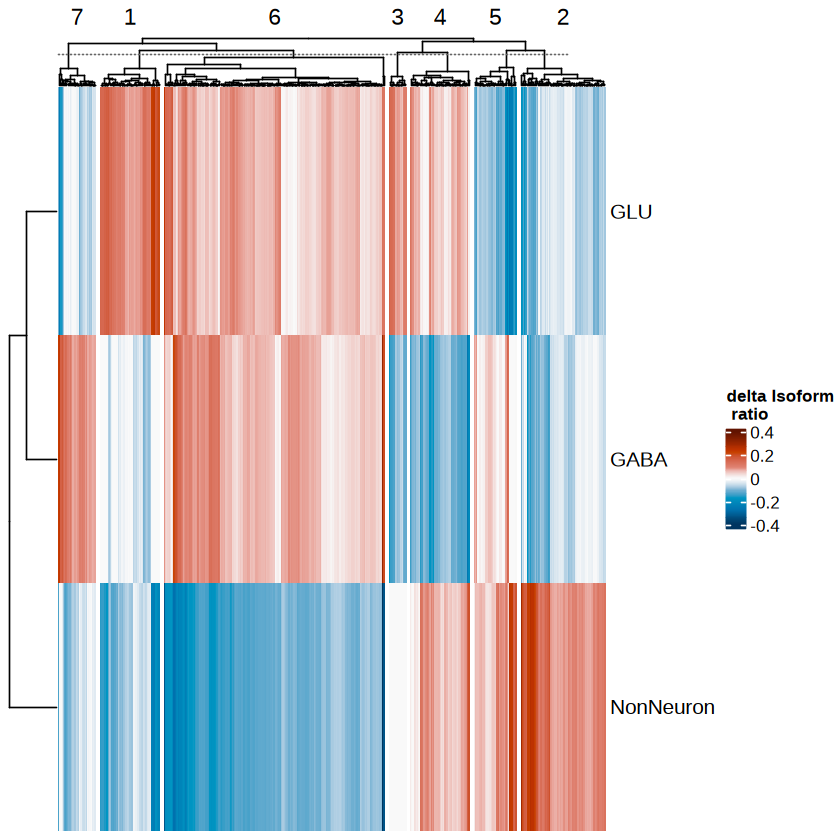

In [115]:
library(ComplexHeatmap)
isosigc = isosigls$class
isosigc$dr2 = isosigc$relative - isosigc$meanrelative
hubgene0 = unique(isosigc[isosigc$sig != "N" & isosigc$sig != "Y",]$transcript_id)

# isosigi = isosigls.cl$GABA_NonNeuron
# hubgene1 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)
# isosigi = isosigls.cl$GLU_NonNeuron
# hubgene2 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)
# isosigi = isosigls.cl$GABA_GLU
# hubgene3 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)

isosigf2 = isosigc[isosigc$transcript_id %in% c(hubgene0),]
length(unique(isosigf2$transcript_id))
#isosigf2 = isosigc[isosigc$transcript_id %in% isosigf2$transcript_id,]
#isosigf2 = isosigf2 %>% group_by(transcript_id) %>% filter(max(abs(dr)) > 0.1)
isosigf2 = isosigf2 %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
length(unique(isosigf2$transcript_id))
length(unique(isosigf2$gene_id))
isosigf.mx1 = dcast(isosigf2,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]
n = 7
isosigf.mx2 = isosigf.mx1
isosigf.mx2[isosigf.mx2>0] = 1
isosigf.mx2[isosigf.mx2<0] = -1
fit = kmeans(isosigf.mx2,n)
split <- factor(as.character(fit$cluster), levels=as.character(c(1:n)))

#splitc = c(4,1,1,1,2,2,2,2,2,2,2,3,5,3,3,3,3,3)
#splitc <- factor(splitc, levels=as.character(c(1:m)))
#reorder.hmap <- Heatmap(as.matrix(cellmxfn), split=split, cluster_row_slices = FALSE,
#                          show_row_names = F,column_order = cellorder)
#reorder.hmap
library(circlize)
col_fun = colorRamp2(c(-0.4,-0.1, 0,0.1, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
pcloneht1 = Heatmap(t(isosigf.mx1),show_column_names = F,column_split = split,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1

file saved to result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_11_26.pdf



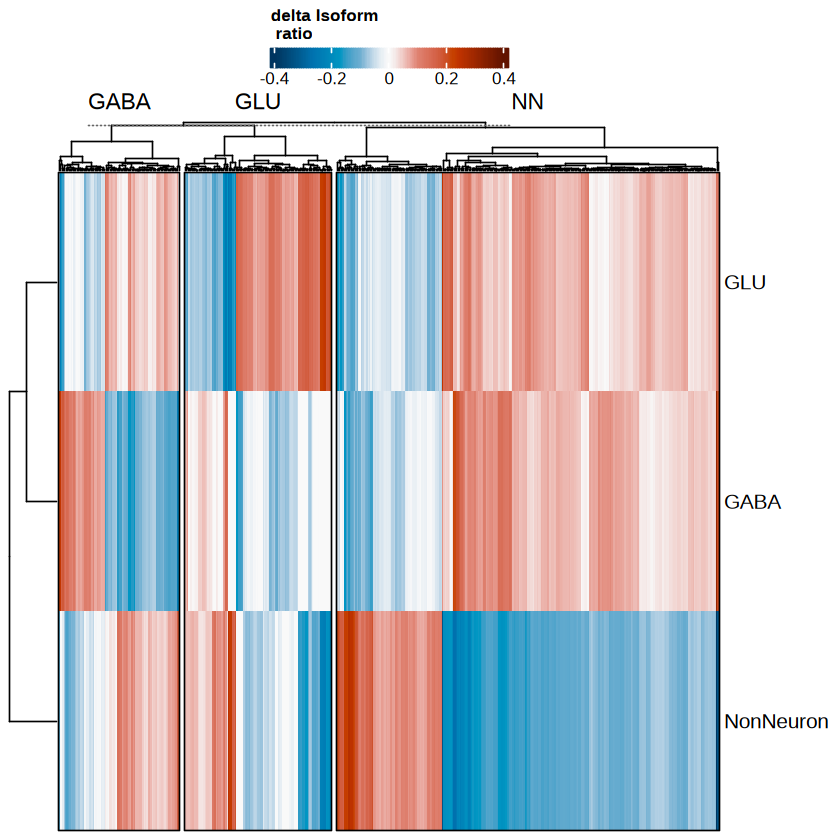

In [124]:
clist = list(NN = c(2,6),
               GLU = c(5,1,3),
               GABA = c(4,7))
split <- fit$cluster
for (i in 1:length(clist)) {
    split[which(split %in% clist[[i]])] = names(clist)[i]
}
  
split <- factor(as.character(split), levels=c("GABA","GLU","NN"))      
names(split) = names(fit$cluster)
pcloneht1 = Heatmap(t(isosigf.mx1),show_column_names = F,column_split = split,name = "delta Isoform\n ratio",
                    col = col_fun,border = 1,heatmap_legend_param = list(
                                      legend_direction = "horizontal", 
                                      legend_width = unit(5, "cm")
                                     ))
pcloneht1 = draw(pcloneht1, heatmap_legend_side = "top")
pcloneht1
ggexport(pcloneht1,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_11_26.pdf",width = 5.5,height = 3)

In [ ]:
dtust = as.data.frame(table(split))
dtust
pison1 = ggplot(data = dtust,aes(x = split,y = Freq,fill = split))+ 
    geom_point(position = position_dodge(0.5),shape = 21,size = 7) + 
    geom_bar(stat = "identity",width = 0.05) +
    geom_text(aes(label=Freq),vjust = -1) + 
    scale_fill_flatui() +
    scale_color_flatui() +
    theme_pubr()
pison1
ggexport(pison1,filename = "result/figure3/class_dtu_isoform_stat_10_27.pdf",width = 3,height = 4)

In [ ]:
#myclassan
isosigs = isosigls$subclass
isosigs = isosigs %>% group_by(transcript_id) %>% mutate(meanrelative.glu = mean(relative[areatr %in% cellan[cellan$class == "GLU",]$subclass]))
isosigs$dr2 = isosigs$relative - isosigs$meanrelative.glu
isosigf3 = isosigs[isosigs$transcript_id %in% rownames(isosigf.mx1),]
clusteran = data.frame("cluster" = split,"transcript_id" = rownames(isosigf.mx1))
isosigf3$cluster = clusteran[match(isosigf3$transcript_id,clusteran$transcript_id),]$cluster
isosigf3$class = cellan[match(isosigf3$areatr,cellan$subclass),]$class
clusteran = unique(isosigf3[,c("gene_id","transcript_id","cluster","class")])

pmst = ggplot(isosigf3,aes(x = class,y = abs(dr2),fill = class)) + 
geom_violin(size = 0.3,drop = FALSE) +
geom_boxplot(size = 0.3,fill = "white",width=0.1,cex=0.8,outlier.size = 0.3,position = position_dodge(0.9)) +
facet_grid(~cluster,scales = "free") + theme_pubr() + xlab("") + ylab("Delta Isoform Ratio Compare to GLU") +
scale_fill_flatui() +
stat_compare_means(aes(label = after_stat(p.signif)),hide.ns = F,comparisons = list(c("GABA","GLU"),c("GABA","NonNeuron"),
                                                                                                       c("GLU","NonNeuron"))) +
theme(axis.text.x = element_blank(),
       axis.ticks.x = element_blank(),
      panel.spacing = unit(0,'lines'),
      panel.border = element_rect(fill = NA)) 
pmst
ggexport(pmst,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_module_ana_24_10_27.pdf",width = 7,height = 5)
write.csv(clusteran, "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_module_ana_24_10_27.csv",quote = F, row.names = F)

[1] 376  22

[1] 376  22

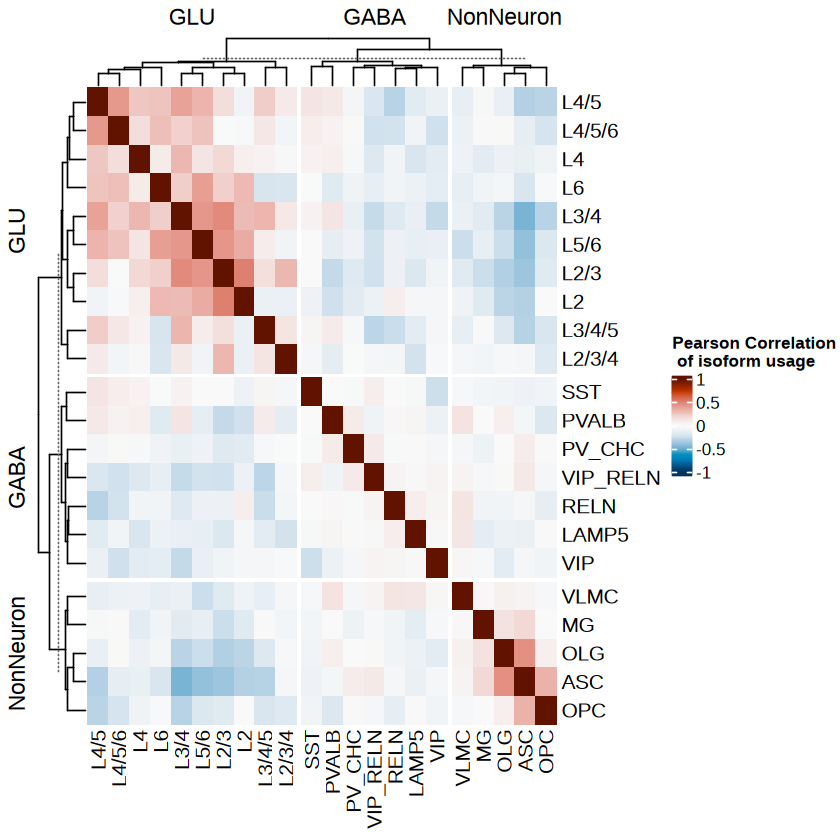

In [92]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$transcript_id %in% isosigi[isosigi$sig != "N",]$transcript_id,]
#isosigi = isosigt
#isosigf = isosigi[isosigi$sig != "N",]
#isosigf = isosigf %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosigf = isosigi[isosigi$transcript_id %in% isosigf$transcript_id,]
#isosigf$dr2 = isosigf$relative - isosigf$meanrelative
#isosigf1 = isosigf1[!isosigf1$areatr %in% c("EC"),]
isosigi = isosigi %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) > 17)
isosig.mx = dcast(isosigi,transcript_id~areatr,value.var = "dr",fun.aggregate = sum)
rownames(isosig.mx) = isosig.mx$transcript_id;isosig.mx = isosig.mx[-1]
dim(isosig.mx)
#isosig.mx = isosig.mx[,colSums(isosig.mx > 0) > 100]
dim(isosig.mx)
isosig.st = cor(isosig.mx,method = "pearson")
#isosig.st
library(circlize)
library(ComplexHeatmap)
# splitc = colnames(isosig.st)
# names(splitc) = colnames(isosig.st)
# splitc = cellan[match(names(splitc),cellan$subclass),]$class
# col_fun = colorRamp2(c(-1, 0, 1), hcl_palette = "RdBu",reverse = T)

splitc = cellan[match(colnames(isosig.st),cellan$subclass),]$class
splitc <- factor(splitc, levels=c("GLU","GABA","NonNeuron"))
library(circlize)
library(ComplexHeatmap)
col_fun = colorRamp2(c(-1, 0, 1), hcl_palette = "RdBu",reverse = T)
pcorht = Heatmap(isosig.st,name = "Pearson Correlation\n of isoform usage",row_split = splitc,column_split = splitc,col = col_fun)
pcorht

# pcorht = Heatmap(isosig.st,name = "Pearson Correlation\n of isoform usage",col = col_fun)
#                  #column_split = splitc,row_split = splitc)
# pcorht

In [93]:
ggexport(pcorht,filename = "result/figure3/DTU_clone_cluster_cor_between_class_total_25_11_26.pdf",width = 6.3,height = 5)

file saved to result/figure3/DTU_clone_cluster_cor_between_class_total_25_11_26.pdf



[1] 1968
[1] 1105


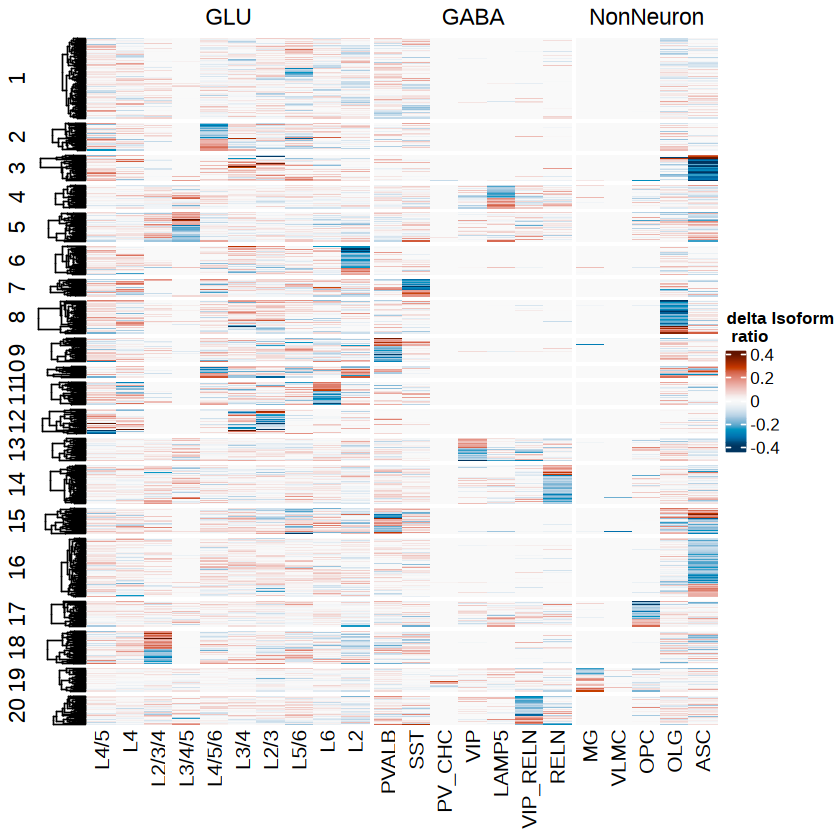

In [80]:
isosig4 = isosigls$subclass;hubtrans = unique(isosig4[isosig4$sig != "N",]$transcript_id)
# length(hubtrans)
#isosighub = isosighub %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosighub = isosighub[isosighub$areatr %in% c("L2","ASC","OLG"),]
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$transcript_id %in% hubtrans,]
# isosigi = isosigi[!isosigi$areatr %in% c("MG","PV_CHC","VLMC","VIP","LAMP5") & isosigi$count > 10,]
# isosigi$sig = "sig"

#isosigi$dr2 = isosigi$relative - isosigi$meanrelative
print(length(unique(isosigi$transcript_id)))
#isosigi = isosigi %>% group_by(transcript_id) %>% filter(max(abs(dr)) > 0.1)
#isosigi = isosigi %>% group_by(transcript_id) %>% filter(count[which.max(abs(dr))] > 20)
isosigi = isosigi %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#isosigi = isosigi[isosigi$count > 10,]
print(length(unique(isosigi$gene_id)))
isosigf.mx1 = dcast(isosigi,transcript_id~areatr,value.var = "dr",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

n = 20
fit = kmeans(abs(isosigf.mx1),n)
fitcl = fit$cluster
levelid = c(as.character(1:20))
levelid = levelid[levelid %in% as.character(fitcl)]
split <- factor(as.character(fitcl),levels = levelid)
splitc = cellan[match(colnames(isosigf.mx1),cellan$subclass),]$class
splitc <- factor(splitc, levels=c("GLU","GABA","NonNeuron"))
names(split) = names(fitcl)
names(splitc) = names(colnames(isosigf.mx1))
library(circlize)
col_fun = colorRamp2(c(-0.4, 0, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1) 
library(ComplexHeatmap)
pcloneht.total = Heatmap(isosigf.mx1,show_row_names = F,row_split = split, 
                         cluster_row_slices = FALSE,cluster_column_slices = FALSE,
                         show_column_dend  = FALSE,
                         column_split = splitc,name = "delta Isoform\n ratio",col = col_fun)

pcloneht.total

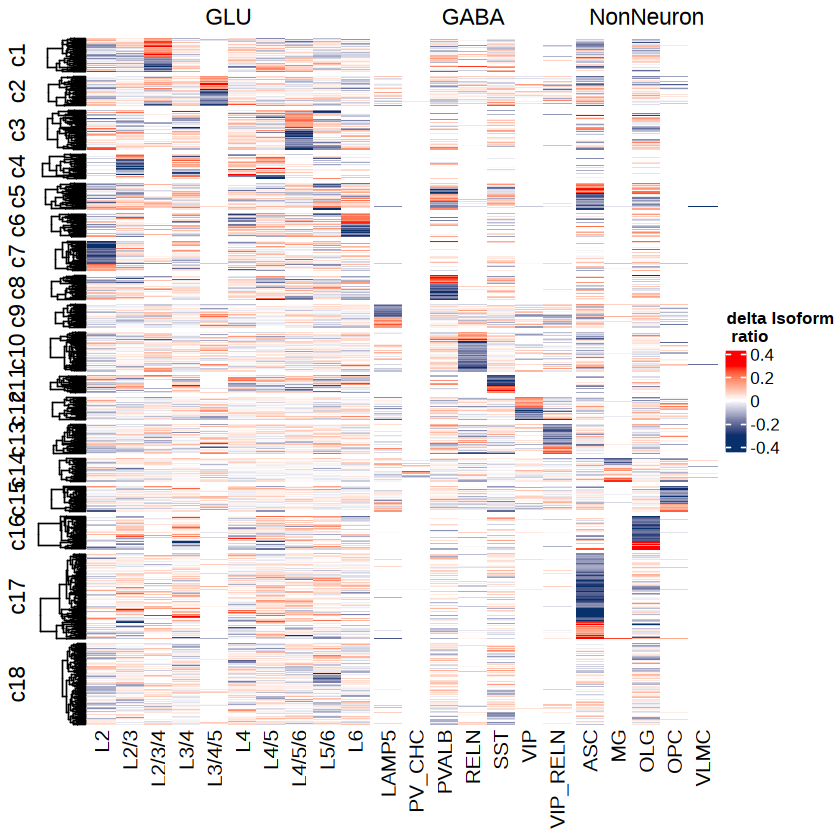

In [84]:
clist = list("c1" = c(18),"c2" = c(5),"c3" = c(2,10),
            "c4" = c(12),"c5" = c(15),"c6" = c(11),
             "c7" = c(10,6),"c8" = c(4),"c9"=c(9),"c10" = c(14),"c11" = c(7),
             "c12" = c(13),"c13" = c(20),
             "c14" = c(19),"c15" = c(17),"c16" = c(8),
             "c17" = c(15,16,3),"c18" = c(1)
            )

MergeCluster = function(htls,clist){
  #merge cluster
  split = as.character(htls$rowcluster)
  for (i in 1:length(clist)) {
    split[which(as.character(split) %in% as.character(clist[[i]]))] = names(clist)[i]
  }
  # 
  split = factor(as.character(split), levels = names(clist))
  names(split) = names(htls$rowcluster)
  reorder.hmap = Heatmap(htls$ht@matrix, 
                         name = "delta Isoform\n ratio",
                         row_split = split,
                         column_split = htls$colcluster,
                         # cluster_rows = F,
                         cluster_columns = F,
                         cluster_row_slices = FALSE,
                         cluster_column_slices = FALSE,
                         show_row_names = F,
                         col = colorRamp2(c(-0.3,0,0.3), 
                                          c("#08306B", "white", "red")),
                         column_order = htls$colorder
  )
  reorder.hmap
  htls$rowcluster = split
  htls$ht = reorder.hmap
  return(htls)
}
htls = list(rowcluster = split,ht = pcloneht.total,colcluster = splitc)

htls_od = MergeCluster(htls,clist)
htls_od$ht
#pcloneht.total
ggexport(htls_od$ht,filename = "result/figure3/DTU_clone_cluster_total_24_12_03.pdf",width = 5,height = 7)

In [ ]:
clusteran[clusteran$gene_id == "MYL6",]
isosigc = isosigls$class
isosigc[isosigc$gene_id == "CSPG5",]
max(abs(isosigc[isosigc$gene_id == "CSPG5",]$dr))

In [ ]:
ggexport(pcloneht1,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_04_21.pdf",width = 4,height = 6)

##### Old Methods

In [ ]:

transt = transtls$subclass
transt = transt[!is.na(transt$areatr),]
transt = transt[transt$areatr != "",]
transt$relative = transt$count/transt$genecount
isosigt = transtf %>% group_by(transcript_id) %>% 
      mutate(meanrelative = sum(count)/sum(genecount))
transtf = transt[transt$genecount > 10,]

isosigt$dr2 = isosigt$relative - isosigt$meanrelative

In [ ]:
#basic stat
library(ComplexHeatmap)
#isosigf2 = isosigf2[isosigf2$sig != "N",]
isosigf1 = isosigt[isosigt$gene_id %in% hubgenedf$gene_id,]
isosigf1 = isosigf1[isosigf1$dr2 > 0.1,]
isosigf1 = isosigt[isosigt$transcript_id %in% isosigf1$transcript_id,]
isosigf1 = isosigf1 %>% group_by(transcript_id) %>% mutate(meanrelative2 = mean(relative[areatr %in% cellan[cellan$class == "GLU",]$subclass]))
isosigf1$dr2 = isosigf1$relative - isosigf1$meanrelative2
isosigf1 = isosigf1[!is.na(isosigf1$dr2),]
#isosigf1 = isosigf
#isosigf1 = isosigt[isosigt$gene_id %in% hubgenedf[hubgenedf$areatr %in% c(cellan[cellan$class == "GLU",]$subclass,"GLU_GLU"),]$gene_id,]
#isosigf1 = isosigf1 %>% group_by(transcript_id) %>% filter(max(abs(dr2)) > 0.1)
#isosigf1 = isosigf1[isosigf1$areatr %in% cellan[cellan$class == "GLU",]$subclass,] %>% group_by(transcript_id) %>% filter(max(abs(dr2)) > 0.1)
#isosigf2 = isosigf2 %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
length(unique(isosigf1$transcript_id))
isosigf.mx1 = dcast(isosigf1,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

n = 10
fit = kmeans(isosigf.mx1,n)
split <- factor(as.character(fit$cluster), levels=as.character(c(1:n)))
m = 6
fitc = kmeans(t(isosigf.mx1),m)
splitc <- factor(as.character(fitc$cluster), levels=as.character(c(1:m)))
#splitc = c(4,1,1,1,2,2,2,2,2,2,2,3,5,3,3,3,3,3)
#splitc <- factor(splitc, levels=as.character(c(1:m)))
#reorder.hmap <- Heatmap(as.matrix(cellmxfn), split=split, cluster_row_slices = FALSE,
#                          show_row_names = F,column_order = cellorder)
#reorder.hmap
library(circlize)
col_fun = colorRamp2(c(-0.3, 0, 0.3), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
pcloneht1 = Heatmap(isosigf.mx1,show_row_names = F,row_split = split,column_split = splitc,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1


In [ ]:
ggexport(pcloneht,filename = "result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_24_04_02.pdf",width = 5,height = 6)

In [ ]:
clusteran = data.frame("cluster" = split,"transcript_id" = rownames(isosigf.mx))
isosigf2$cluster = clusteran[match(isosigf2$transcript_id,clusteran$transcript_id),]$cluster
classan = data.frame("cluster" = splitc,"areatr" = colnames(isosigf.mx))
isosigf2$class = classan[match(isosigf2$areatr,classan$areatr),]$cluster
isosigf2 = isosigf2[!is.na(isosigf2$class),]
myclassan2 = data.frame("class" = c(1:5),"clusteran" = c("surface-GLU","deep-GLU","GABA","nonNeuron-ASC","nonNeuron-OLG"))
isosigf2$clusteran = myclassan2[match(isosigf2$class,myclassan2$class),]$clusteran
isosigf2$clusteran = factor(isosigf2$clusteran,levels = c("surface-GLU","deep-GLU","GABA","nonNeuron-ASC","nonNeuron-OLG"))
#isosigf[isosigf$transcript_id %in% c1,]
isosigf2[isosigf2$gene_id == "DDRGK1",][1,]
isosigf2[isosigf2$gene_id == "MYL6",][1,]
isosigf2[isosigf2$gene_id == "CDC42",][1,]
isosigf2[isosigf2$gene_id == "RWDD1",][1,]

write.csv(isosigf2,file = "result/figure3/sigiso_subclass_transcript_dr_cluster_tab.csv",row.names = F, quote = F)

In [ ]:
isosigf3 = merge(isosig,hubtransdf,by = "transcript_id")
subclassan = data.frame("subclass" = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC','PVALB','SST','ASC','OLG','OPC','MG','EC','VLMC'),
                      "class" = c('sGLU','sGLU','sGLU','sGLU','sGLU',
                                  'dGLU','dGLU','dGLU','dGLU','dGLU',
                                  'GABA','GABA','GABA','GABA','GABA','GABA',"GABA",
                                 'NN-ASC','NN-OLG','NN','NN','NN','NN'))
#myclassan2 = data.frame("class" = c(1:5),"clusteran" = c("surface-GLU","deep-GLU","GABA","nonNeuron-ASC","nonNeuron-OLG"))
isosigf3$clusteran = subclassan[match(isosigf3$areatr,subclassan$subclass),]$class
isosigf3$clusteran = factor(isosigf3$clusteran,levels = c("sGLU","dGLU","GABA","NN-ASC","NN-OLG","NN"))

In [ ]:
head(isosigf3)

In [ ]:

isosigf.mx1 = dcast(isosigf1,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

n = 20
fit = kmeans(isosigf.mx1[,colnames(isosigf.mx1) %in% cellan[cellan$class == "GLU",]$subclass],n)
split <- factor(as.character(fit$cluster), levels=as.character(c(1:n)))
m = 5
fitc = kmeans(t(isosigf.mx1),m)
#splitc <- factor(as.character(fitc$cluster), levels=as.character(c(1:m)))
splitc = c("NN-ASC","sGLU","sGLU","sGLU","sGLU","sGLU","dGLU","dGLU","dGLU","dGLU","dGLU","GABA","NN","NN-OLG","NN","GABA","GABA","GABA","GABA","GABA","GABA","NN")
splitc <- factor(splitc, levels=c("sGLU","dGLU","GABA","NN-ASC","NN-OLG","NN"))
# reorder.hmap <- Heatmap(as.matrix(cellmxfn), split=split, cluster_row_slices = FALSE,
#                           show_row_names = F,column_order = cellorder)
#reorder.hmap
#reorder.hmap
library(circlize)
col_fun = colorRamp2(c(-0.3, 0, 0.3), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
pcloneht1 = Heatmap(isosigf.mx1,show_row_names = F,row_split = split,column_split = splitc,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1


In [ ]:
isosigi = isosigls.cl$GLU_GLU
isosigi$dr2 = isosigi$relative - isosigi$meanrelative
isosigf3 = isosigi[isosigi$sig != "N" & abs(isosigi$dr2) > 0.1,]
isosigf3 = isosigi[isosigi$transcript_id %in% isosigf3$transcript_id,]
isosigf3 = isosigf3[isosigf3$genecount > 10,]
#isosigf.mx1 = dcast(isosigf3[isosigf3$cluster %in% "GLU_GLU" & isosigf3$count > 10,],
#                    transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
isosigf.mx1 = dcast(isosigf3,
                    transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

pcloneht1 = Heatmap(isosigf.mx1,show_row_names = F,
                    row_km = 4,column_km = 3,
                    name = "delta Isoform\n ratio",col = col_fun)
pcloneht1

In [ ]:
 #merge cluster
  clist = list(c1 = c(2,11),
               c2 = c(12),
               c3 = c(14),
               c4 = c(10),
               c5 = c(6),
               c6 = c(13),
               c7 = c(5),
               c8 = c(7),
               c9 = c(1),
               c10 = c(4),
               c11 = c(8),
               c12 = c(9),
               c13 = c(3),
               c14 = c(15))
  split <- fit$cluster
  for (i in 1:length(clist)) {
    split[which(split %in% clist[[i]])] = names(clist)[i]
  }
  
  split <- factor(as.character(split), levels=as.character(c(paste0("c",1:length(clist)) )))      
  names(split) = names(fit$cluster)
  # e11_clu = readRDS("final_result/xE11/E11_cellcounts_cluster.rds")
  reorder.hmap <- Heatmap(as.matrix(cellmxfn2), split=split, cluster_row_slices = FALSE,
                          col =  colorRamp2(c(0, 0.01, max(cellmxfn2)), c("#08306B", "white", "red")),
                          name = "normlize enrichment score",
                          show_row_names = F,column_order = cellorder)
  reorder.hmap

In [ ]:
#myclassan
#isosigf2$class = splitc[match(isosigf2$areatr,myclassan$subclass),]$class
#isosigf3 = isosigf2[isosigf2$class %in% c("surface-GLU","deep-GLU","GABA",'nonNeuron-ASC','nonNeuron-OLG'),]
#isosigf3$class = factor(isosigf3$class,levels = c("surface-GLU","deep-GLU","GABA",'nonNeuron-ASC','nonNeuron-OLG'))
#isosigf3 = isosigf3[!is.na(isosigf3$class),] %>% group_by(cluster) %>% mutate(mdr = mean(dr2[class == 1]))
#isosigf3 = isosigf3 %>% group_by(cluster) %>% mutate(dr.norm = dr2 - mdr)
pmst = ggplot(isosigf3,aes(x = clusteran,y = dr2,fill = clusteran)) + 
geom_violin(size = 0.3,drop = FALSE) +
geom_boxplot(size = 0.3,fill = "white",width=0.1,cex=0.8,outlier.size = 0.3,position = position_dodge(0.9)) +
facet_grid(~cluster,scales = "free") + theme_pubr() + xlab("") + ylab("Delta Isoform Ratio Compare to surface GLU") +
scale_fill_flatui() +
stat_compare_means(aes(label = after_stat(p.signif)),hide.ns = T,ref.group = ".all.") +
theme(axis.text.x = element_blank(),
       axis.ticks.x = element_blank(),
      panel.spacing = unit(0,'lines'),
      panel.border = element_rect(fill = NA)) 
pmst
#ggexport(pmst,filename = "result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_module_ana_24_04_02.pdf",width = 7,height = 5)

In [ ]:
subclassan = data.frame("subclass" = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC','PVALB','SST','ASC','OLG','OPC','MG','EC','VLMC'),
                      "class" = c('surface-GLU','surface-GLU','surface-GLU','deep-GLU','deep-GLU',
                                  'deep-GLU','deep-GLU','deep-GLU','deep-GLU','deep-GLU',
                                  'GABA','GABA','GABA','GABA','GABA','GABA',"GABA",
                                 'nonNeuron-ASC','nonNeuron-OLG','nonNeuron','nonNeuron','nonNeuron','nonNeuron'))
fsrawdp$clonecl = subclassan[match(fsrawdp$subclass,subclassan$subclass),]$class
fsraw.cor = fsrawdp[fsrawdp$clonecl %in% c("surface-GLU","deep-GLU","GABA",'nonNeuron-ASC','nonNeuron-OLG'),]
fsraw.cor$clonecl = factor(fsraw.cor$clonecl,levels = c("surface-GLU","deep-GLU","GABA",'nonNeuron-ASC','nonNeuron-OLG'))

In [ ]:
geneex = "CDC42"
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = "result/figure3/specific_case_total_clonecl_CDC42_24_04_02.pdf",
           width = 6,height = 6)

In [ ]:
geneex = "DDRGK1"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = fileid,
           width = 5,height = 6)

In [ ]:
geneex = "MYL6"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt,hubtrans = c("MYL6-WeiLab-1","MYL6-WeiLab-2"))
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
geneex = "RWDD1"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
geneex = "SNRPC"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
geneex = "DPCD"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
geneex = "DBNDD2"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt,c("XM_005569136.2","XM_015429879.1"))
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
#case list plot
isosigf2 = isosigf2[order(isosigf2$cluster),]
casels = unique(isosigf2$gene_id)
pcls.cl = list()
for(i in 1:length(casels)){
    print(i)
    pcls.cl[[i]] = tryCatch(CasePlotTotalClass(fsraw.cor,isosigi,gtf,casels[i],srtt), 
                                                  error = function(e) NULL)
                            
                               
}
  # ggexport(parcl_casels
ggexport(pcls.cl,filename = "result/figure3/dtu_case_ls_cloneclass_24_04_01.pdf",
           width = 8,height = 8)

In [ ]:
"C20H16orf13","DBNDD2","SEPT8"

In [ ]:
geneex = "DDRGK1"
#fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$lobe
fsraw.cor$chunk = fsraw.cor$clonecl
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1


In [ ]:
geneex = "C20H16orf13"
fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$subclass
fsraw.cor$areatr = fsraw.cor$clonecl
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = fileid,
           width = 6,height = 6)

In [ ]:
transids = unique(isosigf$transcript_id)
subcldiff = NULL
isosig$areatr = factor(isosig$areatr,levels = suborder[suborder %in% isosig$areatr])
isosig = isosig[order(isosig$areatr,isosig$gene_id),]
for(k in 1:length(transids)){
    isosigi = isosig[isosig$transcript_id %in% transids[k],]
    for (i in 1:(nrow(isosigi)-1)) {
        for (j in (i+1):nrow(isosigi)) {
        sample_id_1 = isosigi[i, "areatr"]
        sample_id_2 = isosigi[j, "areatr"]
        value_1 = isosigi[i, "relative"]
        value_2 = isosigi[j, "relative"]
        difference = value_1 - value_2
        subcldiff = rbind(subcldiff, data.frame("transcript_id" = transids[k],"v1" = sample_id_1,"v2" = sample_id_2,"delta" = difference))
      }
    }
}
subcldiff

#### Clone Case plot

In [125]:
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")

In [14]:
pgabals = list()
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GABA",]$gene_id)
isosigi = isosigls$class
for(i in 1:length(hubgenes)){
    geneex = hubgenes[i]
#transid = c("XM_005545567.2","XM_015445010.1")
#names(mycolor) = transid
    fsraw.cor$areatr = fsraw.cor$class
    pgabals[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL), 
                                                  error = function(e) NULL)
}
ggexport(pgabals,filename = "result/figure3/DTU_gaba_reads_cases_plot_24_12_07.pdf",width = 5,height = 5)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


In [129]:
unique(dtumkdf.hub$cluster)
head(dtumkdf.hub)

[1] "GLU"       "GABA"      "NonNeuron"

gene_id transcript_id  pvalue      dr         cluster qvalue
59  AGPAT4  NM_001283744.1 0.036047929  0.1075413 GLU     1     
80  AKAP7   XM_005551840.2 0.001680890 -0.1270569 GLU     1     
147 APRT    APRT-FS-2      0.031255038 -0.1490733 GLU     1     
153 ARFIP2  NM_001283276.1 0.008221913  0.1434062 GLU     1     
154 ARFIP2  XM_005578789.2 0.005116373 -0.1711690 GLU     1     
188 ASIC3   XM_005551178.2 0.007652467 -0.1679861 GLU     1

In [ ]:
pgabals = list()
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GLU",]$gene_id)
isosigi = isosigls$class
for(i in 1:length(hubgenes)){
    geneex = hubgenes[i]
#transid = c("XM_005545567.2","XM_015445010.1")
#names(mycolor) = transid
    fsraw.cor$areatr = fsraw.cor$class
    pgabals[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL), 
                                                  error = function(e) NULL)
}


In [ ]:
ggexport(pgabals,filename = "result/figure3/DTU_glu_reads_cases_plot_24_12_09.pdf",width = 5,height = 5)

In [ ]:
ggexport(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,"BCAN",NULL,TRUE,NULL),
        filename = "result/figure3/DTU_reads_cases_plot_BCAN_24_11_07.pdf",width = 5,height = 5)

In [ ]:
ggexport(pgabals,filename = "result/figure3/DTU_gaba_reads_cases_plot_24_10_28.pdf",width = 5,height = 5)
#fsrawdpr = qread(file = "data/reads_full_anotation/main_data_read_total_annotation_dedup_forplot_24_04_28.qs")
#fsraw.cor = fsrawdpr[fsrawdpr$class != "",]

In [ ]:
geneex = "CDC42"
isosigi = isosigls$class
fsraw.cor$areatr = fsraw.cor$class
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = "result/figure3/specific_case_total_class_NN_CDC42_24_10_27.pdf",
           width = 6,height = 6)


In [43]:
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GABA",]$gene_id)
isosigi = isosigls$class
isosigi = isosigi[isosigi$gene_id %in% hubgenes,]
isosigi = isosigi[isosigi$areatr == "GABA" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[order(-isosigi$genecount),]
isosigi

gene_id      transcript_id  areatr count genecount relative  meanrelative
16144 MAGI1        XM_005547547.2 GABA   175   657       0.2663623 0.1658434   
4513  CDC42        CDC42-WeiLab-1 GABA   108   247       0.4372470 0.3354708   
4516  CDC42        NM_001283401.1 GABA   139   247       0.5627530 0.6645292   
7196  DPYSL4       XM_005595566.2 GABA   161   196       0.8214286 0.7132027   
7199  DPYSL4       XM_005595567.2 GABA    35   196       0.1785714 0.2867973   
16446 MATN2        MATN2-WeiLab-1 GABA    77   145       0.5310345 0.3906241   
22289 PVRL2        XM_005589550.2 GABA    17   134       0.1268657 0.2632928   
22292 PVRL2        XM_005589551.2 GABA   117   134       0.8731343 0.7367072   
19546 OSER1        NM_001284007.1 GABA    46   132       0.3484848 0.2318059   
15016 LOC102141792 XR_001489183.1 GABA    66   123       0.5365854 0.3988533   
5823  CREB3L4      XM_005541724.2 GABA    68    72       0.9444444 0.8177857   
6585  DESI2        XM_005539621.2 GABA    46    60       0.7666667 0.6665416   
6588  DESI2        XM_005539622.2 GABA    13    60       0.2166667 0.3238378   
8498  FAM13C       XM_005565802.2 GABA    20    51       0.3921569 0.2654129   
13011 LARP4        XM_005570840.1 GABA    40    48       0.8333333 0.7220927   
      otherrelative dr         sig  pvalue       padj        
16144 0.1155840      0.1507782 Up   6.296768e-25 1.599379e-22
4513  0.2845827      0.1526643 Up   8.806384e-07 2.374280e-05
4516  0.7154173     -0.1526643 Down 8.806384e-07 2.374280e-05
7196  0.6590897      0.1623388 Up   1.294006e-04 1.739519e-03
7199  0.3409103     -0.1623388 Down 1.294006e-04 1.739519e-03
16446 0.3204189      0.2106156 Up   2.120046e-05 3.905092e-04
22289 0.3315063     -0.2046407 Down 1.572321e-05 3.109845e-04
22292 0.6684937      0.2046407 Up   1.572321e-05 3.109845e-04
19546 0.1734664      0.1750185 Up   2.857714e-04 3.245019e-03
15016 0.3299873      0.2065981 Up   3.014251e-04 3.380353e-03
5823  0.7544563      0.1899881 Up   2.174912e-04 2.624032e-03
6585  0.6164790      0.1501876 Up   1.406043e-03 1.171855e-02
6588  0.3774234     -0.1607567 Down 1.406043e-03 1.171855e-02
8498  0.2020409      0.1901159 N    2.420435e-02 1.038083e-01
13011 0.6664724      0.1668609 N    3.147917e-01 5.315028e-01

In [ ]:
geneex = "MAGI1"
isosigi = isosigls$class
fsraw.cor$areatr = fsraw.cor$class
fsraw.cor$chunk = fsraw.cor$subclass
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
fileid = paste0("result/figure3/specific_case_total_class_GLU_",geneex,"_24_12_10.pdf")
ggexport(pc1,filename = fileid, width = 6,height = 6)

In [44]:
geneex = "MAGI1"
fsraw.cor$areatr = fsraw.cor$class
pc1 = IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL)
fileid = paste0("result/figure3/splice_case_class_",geneex,"_24_12_10.pdf")
ggexport(pc1,filename = fileid, width = 6,height = 6)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmphekSUb/pdf14445bba87d1' for compression (reason: No such file or directory); compression has been turned off for this device"
Warning message:
"Removed 21 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 14 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
file saved to result/figure3/splice_case_class_DPYSL4_24_12_10.pdf



`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'areatr', 'chunk'. You can override using
the `.groups` argument.
Warning message:
"Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead."
Warning message:
"Removed 16 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 6 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."
file saved to result/figure3/specific_case_total_class_GABA_AKR1A1_24_10_27.pdf



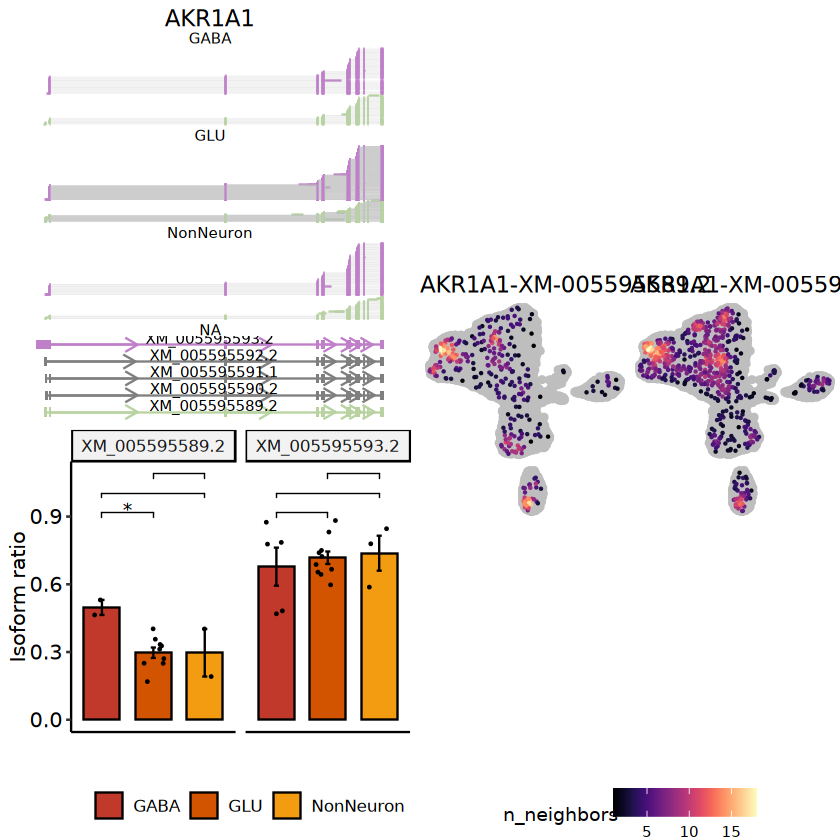

In [56]:
geneex = "AKR1A1"
library(ggpointdensity)
#"TMEM54" "RWDD1"
isosigi = isosigls$class
fsraw.cor$areatr = fsraw.cor$class
fsraw.cor$chunk = fsraw.cor$subclass
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = "result/figure3/specific_case_total_class_GABA_AKR1A1_24_10_27.pdf",
           width = 6,height = 6)

In [23]:
unique(isosigi[isosigi$gene_id %in% "WDR46",]$transcript_id)

[1] "NM_001283915.1" "WDR46-WeiLab-1" "XM_015448786.1"

In [29]:
rgb(247,240,86,maxColorValue = 255)
rgb(25,101,176,maxColorValue = 255)
rgb(220,5,12,maxColorValue = 255)

[1] "#F7F056"

[1] "#1965B0"

[1] "#DC050C"

In [109]:
casest = fsraw.cor[fsraw.cor$gene_id %in% genecs,]
casest = casest %>% 
        group_by(class,subclass,gene_id) %>%
        mutate(genecount = length(unique(readid))) %>% 
       # filter(genecount > 10) %>%
        group_by(class,subclass,gene_id,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
casest$relative = casest$count/casest$genecount

`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.


In [268]:
hubgenes.gaba = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GABA",]$gene_id)
hubgenes.glu = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GLU",]$gene_id)
hubgenes.nn = unique(dtumkdf.hub[dtumkdf.hub$cluster == "NonNeuron",]$gene_id)

isosigi = isosigls$class
isosigi = isosigi[isosigi$sig != "N",]
hubgenes.gaba2 = unique(isosigi[isosigi$areatr == "GABA",]$gene_id)
hubgenes.glu2 = unique(isosigi[isosigi$areatr == "GLU",]$gene_id)
hubgenes.nn2 = unique(isosigi[isosigi$areatr == "NonNeuron",]$gene_id)

hubgenes.gaba = hubgenes.gaba[!hubgenes.gaba %in% c(hubgenes.glu,hubgenes.nn,
                                                    hubgenes.glu2,hubgenes.nn2)]
hubgenes.glu = hubgenes.glu[!hubgenes.glu %in% c(hubgenes.gaba,hubgenes.nn,
                                                hubgenes.gaba2,hubgenes.nn2)]
hubgenes.gaba
hubgenes.glu
isosigi = isosigls$class
isosigi.case = isosigi[isosigi$gene_id %in% c(hubgenes.glu) & isosigi$areatr == "GLU",]
isosigi.case[order(-isosigi.case$count),]

[1] "AKR1A1"       "ARPP21"       "BOLA1"        "C4H6orf203"   "CNN3"        
 [6] "DCBLD2"       "DDX19B"       "DDX54"        "ETFA"         "FAM107B"     
[11] "IGFLR1"       "JOSD2"        "KXD1"         "LOC102125828" "LOC107127721"
[16] "LOC107127847" "LZIC"         "NPRL3"        "NTMT1"        "PAFAH1B3"    
[21] "PEX14"        "PHACTR3"      "PIGC"         "REXO2"        "RIC8B"       
[26] "RNF219"       "RPS6KB1"      "SKA2"         "TEX30"        "UIMC1"       
[31] "ZNF528"

[1] "AGPAT4"       "APRT"         "B4GALT3"      "BRE"          "CAMKK2"      
 [6] "CARNMT1"      "CDC37"        "CSNK2A2"      "DAP3"         "DNAJC24"     
[11] "EIF1AD"       "GNG4"         "LANCL1"       "LOC102123414" "LOC102139832"
[16] "LOC102141554" "MORN4"        "NOL3"         "NSMCE1"       "NSUN5"       
[21] "NTNG1"        "OSBPL7"       "PSMG1"        "RAP1A"        "RSRC1"       
[26] "SEPT11"       "SH3GL2"       "SH3PXD2A"     "ST8SIA5"      "STRA13"      
[31] "TAMM41"       "TCP11L1"      "TMEM106B"     "TMEM107"      "TMEM155"     
[36] "WBP1"         "ZBED5"        "ZNF652"

gene_id      transcript_id     areatr count genecount relative  
12223 LOC102141554 LOC102141554-FS-1 GLU    4538  7430      0.6107672 
12226 LOC102141554 XM_005550070.2    GLU    2892  7430      0.3892328 
2728  CAMKK2       NM_001283246.1    GLU    2737  3065      0.8929853 
3389  CDC37        XM_005587948.2    GLU    2692  3580      0.7519553 
20518 SH3GL2       XM_005581667.1    GLU    2455  3407      0.7205753 
20292 SEPT11       NM_001285239.1    GLU    2077  3977      0.5222530 
23031 TMEM155      XM_005555829.2    GLU    1165  1460      0.7979452 
20298 SEPT11       XM_015450063.1    GLU     998  3977      0.2509429 
20521 SH3GL2       XM_015437118.1    GLU     952  3407      0.2794247 
3386  CDC37        CDC37-FS-1        GLU     888  3580      0.2480447 
15780 NSMCE1       XM_005591511.2    GLU     801  1123      0.7132680 
18190 PSMG1        XM_005548680.2    GLU     685  1256      0.5453822 
20295 SEPT11       XM_015450061.1    GLU     662  3977      0.1664571 
21955 STRA13       XM_005585298.2    GLU     641  1235      0.5190283 
963   APRT         APRT-FS-2         GLU     624  1006      0.6202783 
19839 RSRC1        RSRC1-FS-2        GLU     599   974      0.6149897 
18748 RAP1A        XM_005542351.2    GLU     582   992      0.5866935 
11072 LOC102123414 XR_001488265.1    GLU     580   782      0.7416880 
4608  CSNK2A2      XM_005592090.2    GLU     577   807      0.7149938 
20551 SH3PXD2A     XM_005566352.2    GLU     541   653      0.8284839 
21841 ST8SIA5      XM_005586777.2    GLU     518   610      0.8491803 
18187 PSMG1        PSMG1-FS-2        GLU     502  1256      0.3996815 
2798  CARNMT1      XM_005581946.2    GLU     467   631      0.7400951 
4823  DAP3         XM_005541530.2    GLU     463   632      0.7325949 
1525  B4GALT3      XM_005541206.2    GLU     453   608      0.7450658 
15807 NSUN5        XM_005549351.2    GLU     429   731      0.5868673 
22903 TMEM106B     XM_005550096.2    GLU     426   591      0.7208122 
5433  DNAJC24      XM_005578309.2    GLU     417   574      0.7264808 
21958 STRA13       XM_005585300.2    GLU     413  1235      0.3344130 
22921 TMEM107      XM_005582831.2    GLU     396   583      0.6792453 
⋮     ⋮            ⋮                 ⋮      ⋮     ⋮         ⋮         
10146 LANCL1       NM_001287649.1    GLU    173    356      0.48595506
2795  CARNMT1      CARNMT1-FS-1      GLU    164    631      0.25990491
12089 LOC102139832 XM_005545499.2    GLU    160    541      0.29574861
21961 STRA13       XM_005585301.2    GLU    158   1235      0.12793522
5436  DNAJC24      XM_005578310.2    GLU    157    574      0.27351916
26278 ZNF652       XM_005583613.2    GLU    156    199      0.78391960
15599 NOL3         NM_001284661.1    GLU    142    514      0.27626459
22499 TCP11L1      NM_001284946.1    GLU    139    368      0.37771739
24919 WBP1         XM_005575526.2    GLU    134    519      0.25818882
16240 OSBPL7       XR_285223.2       GLU    131    361      0.36288089
10149 LANCL1       XM_005574174.2    GLU    129    356      0.36235955
1522  B4GALT3      B4GALT3-FS-3      GLU    118    608      0.19407895
22918 TMEM107      XM_005582830.2    GLU    109    583      0.18696398
20554 SH3PXD2A     XM_005566353.2    GLU    104    653      0.15926493
4826  DAP3         XM_005541534.2    GLU    103    632      0.16297468
22250 TAMM41       XM_005547824.2    GLU    103    372      0.27688172
22900 TMEM106B     NM_001283071.1    GLU    103    591      0.17428088
960   APRT         APRT-FS-1         GLU     92   1006      0.09145129
7976  GNG4         XR_272895.1       GLU     87    387      0.22480620
414   AGPAT4       XM_015448386.1    GLU     74    324      0.22839506
22924 TMEM107      XM_015437620.1    GLU     67    583      0.11492281
21844 ST8SIA5      XM_015439921.1    GLU     64    610      0.10491803
22906 TMEM106B     XM_005550100.2    GLU     62    591      0.10490694
966   APRT         APRT-FS-3         GLU     59   1006      0.05864811
25294 ZBED5        XM_01543511

`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.
Warning message in stat_compare_means(method = "t.test", label = "p.signif", ref.group = ".all.", :
"Ignoring unknown parameters: `map_signif_level`, `tip_length`, and `margin_top`"
file saved to result/figure3/Class_DTU_case_box_plot_25_11_26.pdf



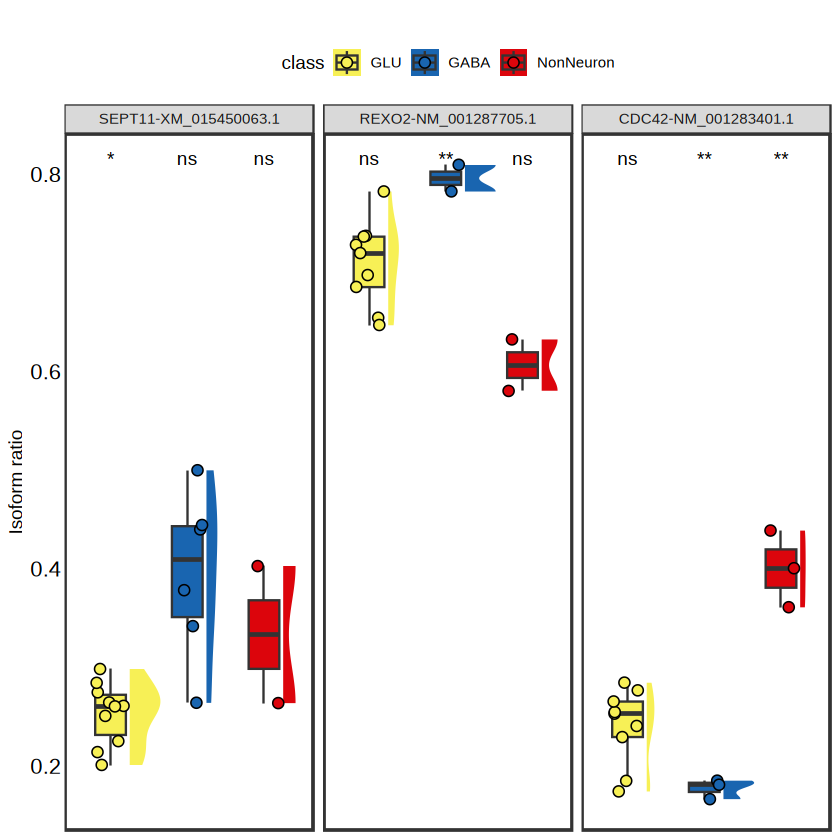

In [271]:
#subclass box plot
#genecs = c("MYL6","AKR1A1","CDC42")
# #trancs = c('XM_005595593.2','NM_001283401.1','MYL6-WeiLab-1')
# genecs = c("SEPT11","REXO2","CDC42")
# trancs = c('XM_015450063.1','NM_001287705.1','NM_001283401.1')
# ST8SIA5 XM_005586777.2
genecs = c("SEPT11","REXO2","CDC42")
trancs = c('XM_015450063.1','NM_001287705.1','NM_001283401.1')
casest = fsraw.cor[fsraw.cor$gene_id %in% genecs,]
casest = casest %>% 
        group_by(class,subclass,gene_id) %>%
        mutate(genecount = length(unique(readid))) %>% 
       # filter(genecount > 10) %>%
        group_by(class,subclass,gene_id,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
casest$relative = casest$count/casest$genecount
#casest = casest[casest$count > 5,]
#casest = casest[casest$subclass != "",]
casest = casest[casest$subclass != "" & casest$transcript_id %in% trancs,]

#isosigi = isosigls$subclass
#casest = isosigi[isosigi$gene_id %in% genecs & isosigi$transcript_id %in%trancs,]
#casest = casest %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#casest = merge(casest,cellan,by.x = "areatr",by.y = "subclass")
#casest = casest[casest$count > 5,]
casest$gene_id = paste0(casest$gene_id,"-",casest$transcript_id)
casest$gene_id = factor(casest$gene_id,levels = c("SEPT11-XM_015450063.1",
                                                 "REXO2-NM_001287705.1",
                                                 "CDC42-NM_001283401.1"))
casest$class = factor(casest$class,levels = c("GLU","GABA","NonNeuron"))
pcmp2 = ggplot(casest[casest$count > 10,],aes(x = class,y = relative,fill = class)) +  
    geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+  
    geom_boxplot(width=0.4,size=0.5,outlier.color =NA)+  
    geom_jitter(aes(fill=class),shape=21,size=2.5,width=0.2)+  
    stat_compare_means(method = "t.test",label = "p.signif",
                       ref.group = ".all.",
                       # comparisons = list(c("GLU","GABA"),c("GLU","NonNeuron"),c("NonNeuron","GABA")),
                       map_signif_level = T,
                       tip_length = c(0.02),size= 4,margin_top = 0.08)  +
    #geom_hline(yintercept = 0.2, linetype = 2, color = "red",linewidth=1)+  
    # geom_signif(comparisons = list(c("GLU","GABA"),c("GLU","NonNeuron")
    #                                ,c("NonNeuron","GABA")),map_signif_level = T,
    #             tip_length = c(0.01),size=0.5,margin_top = 0.08,color="black",textsize = 3)+  
    
    facet_wrap(.~gene_id,nrow = 1) +
    theme_bw()+  theme(panel.grid = element_blank(),legend.position = "top",
                       panel.border = element_rect(size = 1),
                       axis.text.x = element_blank(),
                       axis.text.y = element_text(color = "black",size = 13),
                       axis.ticks = element_blank())+  
    labs(x=NULL)+  scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ggtitle("") +
    #scale_y_continuous(limits = c(0,1)) + 
    ylab("Isoform ratio")
pcmp2
ggexport(pcmp2,filename = "result/figure3/Class_DTU_case_box_plot_25_11_26.pdf",
           width = 6.5,height = 4)

In [ ]:
dev.off()

In [ ]:
library(scatterpie)
caseg = c("CDC42","GNAO1",'MYL6',"C15H9orf3","HSCB","GRIP1")

isosigi = isosigls$class
transsig = unique(isosigi[isosigi$gene_id %in% caseg & isosigi$sig != "N",]$transcript_id)
fsraw.cor$areatr = fsraw.cor$class
IsoformCasePie = function(caseg,fsraw.cor,transsig){
    fsraw.cor.hub = fsraw.cor[fsraw.cor$gene_id %in% caseg,]
    casect = fsraw.cor.hub %>% group_by(areatr,gene_id,transcript_id) %>% 
                summarise(count = length(readid)) %>% 
                group_by(areatr,gene_id) %>% 
                mutate(genecount = sum(count),rate = count/genecount)
    casect = casect[casect$transcript_id %in% transsig,]

    casect = casect %>% group_by(gene_id) %>% mutate(id = as.character(as.numeric(as.factor(transcript_id))))
    maxtransn = max(as.numeric(casect$id))
    casect$gene_tran = paste0(casect$gene_id,"-",casect$id)
    casect = casect[casect$genecount > 20,]
    casectl = dcast(casect,areatr+gene_id~id,value.var = "rate")
    casectl$group = paste0(casectl$areatr,"-",casectl$gene_id)
    casectl[is.na(casectl)] = 0
    casectl$areaid = as.numeric(factor(casectl$areatr,levels = unique(casectl$areatr)))
    library(patchwork)
    mycolors = distinctColorPalette(maxtransn)
   # casectl$gene_id = factor(casectl$gene_id,levels = caseg)
    casectl$gene_idn = as.numeric(factor(casectl$gene_id,levels = caseg))
    #casectl$gene_id = factor(casectl$gene_id,levels = caseg)
    plt = ggplot() + 
      geom_scatterpie(data = casectl[casectl$gene_id %in% caseg, ],aes(x = gene_idn, y = areaid, group = group,
                                           r = 0.3),color=NA,
                      cols=colnames(casectl)[3:(3+maxtransn-1)]) + 
      #facet_wrap(~gene_id,nrow = 2) +
      # geom_histogram(data = root_sprn,aes(mean.model),bins = 100) +
      coord_fixed() +
      scale_x_continuous(breaks = c(1:length(caseg)),labels = caseg,position = "top")+
      scale_y_continuous(breaks = c(1:length(unique(casectl$areatr))),labels = unique(casectl$areatr))+
      # geom_smooth(data = tem2, aes(x=x, y=y), se = F, method = 'loess',color = "black") +
      scale_fill_discreterainbow() +
      #scale_fill_manual(values = mycolors) +
      #annotate("text", x = 8, y = 7, label = caseg[i], hjust = 1.1, vjust = 1.1, size = 5, angle = 90) +
      ylab("") + xlab("") +
      theme_bw() + theme(legend.position="none",axis.text = element_text(size = 12),
                        strip.background =element_rect(fill="white"),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank())
    return(plt)
}

piec = IsoformCasePie(caseg,fsraw.cor,transsig)
piec
#names(mycolors) = transname

#ggexport(piec,filename = "result/figure3/Class_DTU_case_pie_plot_24_10_27.pdf",width = 6,height = 4)

In [ ]:
fsrawdp.cellf = qread("data/reads_full_anotation/longread_isoform_position_noambigious_24_05_14.qs")
fsrawdp.cellb = qread("data/reads_full_anotation/longread_cell_position_24_03_29.qs")

In [ ]:
gmks = c("CDC42","MYL6","RWDD1")
#geneex = "DBNDD2"
#fileid = paste0("result/figure2/",geneex,"_layer_case_24_05_01.pdf")
pcpls = list()
for(i in 1:length(gmks)){
    pcpls[[i]] = MarkerSpPlot(fsrawdp.cellf,fsrawdp.cellb,gmks[i],hubtrans = c("CDC42-WeiLab-1","NM_001283401.1",
                                                                              "MYL6-WeiLab-1","MYL6-WeiLab-2",
                                                                              "XM_005551653.2","XM_005551655.2","XM_005551654.2"))
}
pcplst = ggarrange(plotlist = pcpls,nrow = 1)
pcplst

In [ ]:
ggexport(pcplst,filename = "result/figure3/dtu_isoform_case_class_spatial_plot_24_05_14.pdf",width = 12,height = 6)

In [ ]:
unique(gtf[gtf$gene_id == "CAPRIN1",]$transcript_id)

In [ ]:

srtt$lobe = areaan[match(srtt$area,areaan$area),]$lobe
Idents(srtt) = "subclass"
srtt.sub = subset(srtt,idents = c("L2/3/4"))
#srtt.sub = srtt
#srtt.sub = subset(srtt,idents = c("L2/3"))
Idents(srtt.sub) = "layer"
#srtt.sub = subset(srtt.sub,idents = c("somatosensory","cingulate"))
#srtt.sub = subset(srtt.sub,idents = c("l2","l6"))
isodf = GetAssayData(srtt.sub,assay = "ISOFORM")
#genedf = GetAssayData(srtt.sub,assay = "RNA")
umapdf = as.data.frame(srtt.sub@reductions$umap@cell.embeddings)

Idents(srtt.sub) = "layer"
#VlnPlot(srtt.sub, features = "XM-015444956.1")

psrtg3 = DimPlot(srtt.sub,reduction = 'umap',
                   group.by = 'layer',pt.size = 0.01) +
    scale_color_discreterainbow() +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("lobe") +
    theme_presentation()
psrtg3

#"XM_005545495.2","XM_015444956.1"
#"XM_015450613.1" ""
feartures = c("DDRGK1-WeiLab-1","XM-005568473.2")
#feartures = c("XM-005545495.2","XM-015444956.1")
#feartures = c("XM-005588838.2","XM-015441294.1")
#feartures = c("XM-005539957.2","XM-005539956.2")
isodfi = isodf[feartures[1],]
sum(isodfi)
isodfi1 = names(isodfi[isodfi>0])
umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
umapdf.plot = umapdf[isodfi1,]
pci31 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[1])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
     # ggtitle(featurei[i]) + theme_void() + coord_fixed()

isodfi = isodf[feartures[2],]
sum(isodfi)
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
    pci32 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[2])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
psrt = psrtg3 + pci31 + pci32 
ggexport(psrt,filename = "result/figure4/spatial_contribution_layer_case_DDRGK1-WeiLab-1_UMAP_05_02.pdf",width = 12,height = 4)

In [ ]:

srtt$lobe = areaan[match(srtt$area,areaan$area),]$lobe
Idents(srtt) = "subclass"
srtt.sub = subset(srtt,idents = c("L2/3/4"))
#srtt.sub = srtt
#srtt.sub = subset(srtt,idents = c("L2/3"))
Idents(srtt.sub) = "layer"
#srtt.sub = subset(srtt.sub,idents = c("somatosensory","auditory"))
#srtt.sub = subset(srtt.sub,idents = c("l2","l6"))
isodf = GetAssayData(srtt.sub,assay = "ISOFORM")
#genedf = GetAssayData(srtt.sub,assay = "RNA")
umapdf = as.data.frame(srtt.sub@reductions$umap@cell.embeddings)

Idents(srtt.sub) = "layer"
#VlnPlot(srtt.sub, features = "XM-015444956.1")

psrtg3 = DimPlot(srtt.sub,reduction = 'umap',
                   group.by = 'layer',pt.size = 0.01) +
    scale_color_discreterainbow() +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("lobe") +
    theme_presentation()
psrtg3

#"XM_005545495.2","XM_015444956.1"
#"XM_015450613.1" ""
#feartures = c("DDRGK1-WeiLab-1","XM-005568473.2")
feartures = c("XM-005545495.2","XM-015444956.1")
#feartures = c("XM-005588838.2","XM-015441294.1")
#feartures = c("XM-005539957.2","XM-005539956.2")
isodfi = isodf[feartures[1],]
sum(isodfi)
isodfi1 = names(isodfi[isodfi>0])
umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
umapdf.plot = umapdf[isodfi1,]
pci31 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[1])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
     # ggtitle(featurei[i]) + theme_void() + coord_fixed()

isodfi = isodf[feartures[2],]
sum(isodfi)
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
    pci32 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[2])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
psrt = psrtg3 + pci31 + pci32 
psrt
ggexport(psrt,filename = "result/figure4/spatial_contribution_layer_case_ARPP21-WeiLab-1_UMAP_05_02.pdf",width = 12,height = 4)

In [ ]:

srtt$lobe = areaan[match(srtt$area,areaan$area),]$lobe
Idents(srtt) = "subclass"
srtt.sub = subset(srtt,idents = c("L3/4","L4","L4/5","L4/5/6"))
#srtt.sub = srtt
#srtt.sub = subset(srtt,idents = c("L2/3"))
Idents(srtt.sub) = "lobe"
srtt.sub = subset(srtt.sub,idents = c("somatosensory","auditory"))
#srtt.sub = subset(srtt.sub,idents = c("l2","l6"))
isodf = GetAssayData(srtt.sub,assay = "ISOFORM")
#genedf = GetAssayData(srtt.sub,assay = "RNA")
umapdf = as.data.frame(srtt.sub@reductions$umap@cell.embeddings)

Idents(srtt.sub) = "layer"
#VlnPlot(srtt.sub, features = "XM-015444956.1")

psrtg3 = DimPlot(srtt.sub,reduction = 'umap',
                   group.by = 'lobe',pt.size = 0.01) +
    scale_color_discreterainbow() +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("lobe") +
    theme_presentation()
psrtg3


feartures = c("XM-005578232.2","XM-015434930.1")

isodfi = isodf[feartures[1],]
sum(isodfi)
isodfi1 = names(isodfi[isodfi>0])
umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
umapdf.plot = umapdf[isodfi1,]
pci31 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[1])


isodfi = isodf[feartures[2],]
sum(isodfi)
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
    pci32 = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(feartures[2])

psrt = psrtg3 + pci31 + pci32 
psrt
#ggexport(psrt,filename = "result/figure4/spatial_contribution_layer_case_ARPP21-WeiLab-1_UMAP_05_02.pdf",width = 12,height = 4)

In [ ]:
#case value plot
geneex = c("MYL6","CDC42","TMEM54")
isosigi = isosigls$class
isosigi = isosigi[isosigi$gene_id %in% geneex,]
isosigi$dr2 = isosigi$relative - isosigi$meanrelative
ggplot(isosigi,aes(x = transcript_id,y = areatr,fill = dr2)) +
geom_tile() + facet_grid(~gene_id,scales = "free") +
scale_fill_viridis(option = "A") +
theme_pubr()


In [ ]:
fsraw.cor = fsraw[fsraw$subclass %in% cellan[cellan$class %in% c("NonNeuron"),]$subclass,]
isosigi = isosigls.cl$NonNeuron_NonNeuron
isosighub = isosigi[isosigi$sig != "N",]
gmksi = unique(isosighub$gene_id)
pcls.nn = list()
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",gmksi[i],NULL)
    pcls.nn[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
ggexport(pcls.nn,filename = "result/figure3/dtu_case_ls_NonNeuron_NonNeuron_24_04_01.pdf",
           width = 10,height = 8)



In [ ]:
geneex = "MYLK"
#fileid = paste0("result/figure3/specific_case_total_",geneex,"_24_04_02.pdf")
isosigi = isosigls$layer
#isosigi[isosigi$gene_id %in% geneex,]
fsraw.cor$areatr = fsraw.cor$subclass
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1


In [ ]:
geneex = "MYL6"
isosigi = isosigls$class
pc2 = CasePlotTotalClass(fsrawdp,isosigi,gtf,geneex,srtt,c("MYL6-WeiLab-1","MYL6-WeiLab-2"))
pc2
ggexport(pc2,filename = "result/figure3/specific_case_total_MYL6_24_04_02.pdf",
           width = 6,height = 6)

In [ ]:
geneex = "RWDD1"
isosigi = isosigls$class
pc3 = CasePlotTotalClass(fsrawdp,isosigi,gtf,geneex,srtt)
pc3
ggexport(pc3,filename = "result/figure3/specific_case_total_RWDD1_24_04_02.pdf",
           width = 6,height = 6)

In [ ]:
geneex = "GRIN2B"
isosigi = isosigls$class
pc5 = CasePlotTotalClass(fsrawdp,isosigi,gtf,geneex,srtt)
pc5
ggexport(pc5,filename = "result/figure3/specific_case_total_CLTA_24_04_02.pdf",
           width = 6,height = 6)

In [ ]:
geneex = "CSPG5"
isosigi = isosigls$class
pc5 = CasePlotTotalClass(fsrawdp,isosigi,gtf,geneex,srtt)
pc5
ggexport(pc5,filename = "result/figure3/specific_case_total_CSPG5_24_04_02.pdf",
           width = 6,height = 6)

In [ ]:
geneex = "RPL26L1"
isosigi = isosigls$class
pc5 = CasePlotTotalClass(fsrawdp,isosigi,gtf,geneex,srtt)
pc5
ggexport(pc5,filename = "result/figure3/specific_case_total_RPL26L1_24_04_02.pdf",
           width = 6,height = 6)

#### Major Isoform shift calculate

In [20]:
head(isosigi)

gene_id transcript_id  areatr count genecount relative  meanrelative
1 AATF    NM_001284760.1 ASC     15    35       0.4285714 0.623471    
2 AATF    NM_001284760.1 L2      45    66       0.6818182 0.623471    
3 AATF    NM_001284760.1 L2/3   119   211       0.5639810 0.623471    
4 AATF    NM_001284760.1 L2/3/4  28    40       0.7000000 0.623471    
5 AATF    NM_001284760.1 L3/4    88   127       0.6929134 0.623471    
6 AATF    NM_001284760.1 L4      45    76       0.5921053 0.623471    
  otherrelative dr          sig  pvalue     padj       ismajor
1 0.6397126     -0.21114121 Down 0.01136036 0.03819921 FALSE  
2 0.6186087      0.06320944 N    0.01136036 0.03819921  TRUE  
3 0.6284285     -0.06444746 N    0.01136036 0.03819921  TRUE  
4 0.6170936      0.08290641 N    0.01136036 0.03819921  TRUE  
5 0.6176841      0.07522924 N    0.01136036 0.03819921  TRUE  
6 0.6260848     -0.03397956 N    0.01136036 0.03819921  TRUE

In [201]:
# major isoform shift stat
isosigi = isosigls$subclass
hubgene = unique(isosigi[isosigi$sig != "N",]$gene_id)
isosigi = isosigi[isosigi$gene_id %in% hubgene,]
head(isosigi)
#construct phase dataset
isosigi$ismajor <- FALSE
isosigi <- isosigi %>%
  group_by(areatr, gene_id) %>%
  mutate(ismajor = ifelse(relative == max(relative), TRUE, FALSE)) %>%
  ungroup()
isosigi = isosigi %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#isosigi[isosigi$relative > 0.5,]$ismajor = TRUE
isosigi = isosigi[isosigi$ismajor == TRUE | (isosigi$ismajor == FALSE & abs(isosigi$relative - isosigi$otherrelative) > 0.1),]
isosigi = isosigi %>% group_by(transcript_id) %>% filter(length(unique(ismajor)) > 1)
length(unique(isosigi$gene_id))
length(unique(isosigi$transcript_id))

library(tidyr)
df_wide <- pivot_wider(isosigi, 
                       id_cols = transcript_id, 
                       names_from = areatr, 
                       values_from = ismajor)
#df_wide
areas <- names(df_wide)[-1] 

combinations <- expand.grid(ismajorT = areas, ismajorF = areas, stringsAsFactors = FALSE)
combinations$value = 0
for(i in 1:nrow(combinations)){
    x <- combinations[i,"ismajorT"]
    y <- combinations[i,"ismajorF"]
    df_widei = df_wide[,c(x,y)]
    df_widei = df_widei[!is.na(df_widei[,1]) & !is.na(df_widei[,2]),]
    combinations[i,]$value = nrow(df_widei[df_widei[,1] & !df_widei[,2],])
}
combinations


gene_id transcript_id  areatr count genecount relative  meanrelative
18 AACS    NM_001284010.1 ASC     31    42       0.7380952 0.8728134   
19 AACS    NM_001284010.1 L2      65    79       0.8227848 0.8728134   
20 AACS    NM_001284010.1 L2/3   207   238       0.8697479 0.8728134   
21 AACS    NM_001284010.1 L2/3/4  36    36       1.0000000 0.8728134   
22 AACS    NM_001284010.1 L3/4   190   231       0.8225108 0.8728134   
23 AACS    NM_001284010.1 L4      71    73       0.9726027 0.8728134   
   otherrelative dr           sig  pvalue       padj     
18 0.8840399     -0.145944655 Down 0.0008571564 0.0046138
19 0.8769824     -0.054197619 N    0.0008571564 0.0046138
20 0.8730688     -0.003320939 N    0.0008571564 0.0046138
21 0.8622145      0.137785503 Up   0.0008571564 0.0046138
22 0.8770053     -0.054494439 N    0.0008571564 0.0046138
23 0.8644976      0.108105138 Up   0.0008571564 0.0046138

[1] 532

[1] 532

ismajorT ismajorF value
1   ASC      ASC        0  
2   L2       ASC      100  
3   L2/3     ASC      126  
4   L2/3/4   ASC       70  
5   L3/4     ASC      123  
6   L3/4/5   ASC       20  
7   L4       ASC      118  
8   L4/5     ASC      124  
9   L4/5/6   ASC      108  
10  L5/6     ASC      102  
11  L6       ASC      105  
12  LAMP5    ASC       10  
13  OLG      ASC       94  
14  OPC      ASC        9  
15  PVALB    ASC       91  
16  RELN     ASC       30  
17  SST      ASC       97  
18  VIP      ASC       12  
19  VIP_RELN ASC       29  
20  MG       ASC        2  
21  PV_CHC   ASC        0  
22  VLMC     ASC        0  
23  ASC      L2        34  
24  L2       L2         0  
25  L2/3     L2        56  
26  L2/3/4   L2        30  
27  L3/4     L2        56  
28  L3/4/5   L2        11  
29  L4       L2        57  
30  L4/5     L2        58  
⋮   ⋮        ⋮        ⋮    
455 PVALB    PV_CHC   1    
456 RELN     PV_CHC   1    
457 SST      PV_CHC   1    
458 VIP      PV_CHC   1    
459 VIP_RELN PV_CHC   0    
460 MG       PV_CHC   1    
461 PV_CHC   PV_CHC   0    
462 VLMC     PV_CHC   0    
463 ASC      VLMC     1    
464 L2       VLMC     2    
465 L2/3     VLMC     2    
466 L2/3/4   VLMC     2    
467 L3/4     VLMC     2    
468 L3/4/5   VLMC     2    
469 L4       VLMC     2    
470 L4/5     VLMC     2    
471 L4/5/6   VLMC     2    
472 L5/6     VLMC     2    
473 L6       VLMC     2    
474 LAMP5    VLMC     1    
475 OLG      VLMC     1    
476 OPC      VLMC     2    
477 PVALB    VLMC     1    
478 RELN     VLMC     0    
479 SST      VLMC     2    
480 VIP      VLMC     1    
481 VIP_RELN VLMC     1    
482 MG       VLMC     0    
483 PV_CHC   VLMC     0    
484 VLMC     VLMC     0

In [160]:
head(isosigi)

gene_id transcript_id  areatr count genecount relative  meanrelative
1 AACS    NM_001284010.1 ASC     67    78       0.8589744 0.9210825   
2 AACS    NM_001284010.1 L2     121   135       0.8962963 0.9210825   
3 AACS    NM_001284010.1 L2/3   355   386       0.9196891 0.9210825   
4 AACS    NM_001284010.1 L2/3/4  54    54       1.0000000 0.9210825   
5 AACS    NM_001284010.1 L3/4   326   367       0.8882834 0.9210825   
6 AACS    NM_001284010.1 L3/4/5  25    27       0.9259259 0.9210825   
  otherrelative dr           sig pvalue      padj       
1 0.9258601     -0.066885698 N   0.001068606 0.005954188
2 0.9229891     -0.026692842 N   0.001068606 0.005954188
3 0.9211897     -0.001500571 N   0.001068606 0.005954188
4 0.9150119      0.084988069 N   0.001068606 0.005954188
5 0.9236055     -0.035322138 N   0.001068606 0.005954188
6 0.9207099      0.005215990 N   0.001068606 0.005954188

In [162]:
hubshift = df_wide[df_wide$OLG == TRUE & df_wide$ASC == FALSE,]
hubshift = hubshift[!is.na(hubshift$transcript_id),]
unique(isosigi[isosigi$transcript_id %in% hubshift$transcript_id,]$gene_id)

[1] "AATF"            "APC2"            "BambuGene103646" "BRD1"           
 [5] "CECR2"           "CYTH1"           "DESI2"           "EIF4E2"         
 [9] "EP300"           "EXOSC3"          "FAM192A"         "GFPT1"          
[13] "GRK4"            "INTS12"          "KAZN"            "LAMP2"          
[17] "LOC101867505"    "LOC102122163"    "LOC102141548"    "LOC107127721"   
[21] "LYST"            "MCFD2"           "MRPL39"          "MYL6"           
[25] "NRXN2"           "PLEKHA5"         "POLR3G"          "RIMKLB"         
[29] "SF1"             "SLC11A2"         "TBCE"            "TJP1"           
[33] "TMCC3"           "TPM4"            "TXNDC16"         "ZNF471"         
[37] "ZNF585A"         "ZNF84"

In [202]:
# 安装并加载 dplyr 包
#install.packages("dplyr")
library(dplyr)

# 转换逻辑值为数值
df_numeric <- df_wide %>%
  mutate(across(
    everything(),
    function(x) {
      x %>%
        replace(is.na(x), 0) %>%  # 将 NA 替换为 0
        replace(x == TRUE, 1) %>%  # 将 TRUE 替换为 1
        replace(x == FALSE, -1)    # 将 FALSE 替换为 -1
    }
  ))

# 查看结果
print(df_numeric)
rownames(df_numeric) = df_numeric$transcript_id
df_numeric = df_numeric[,-1]
Heatmap(as.matrix(df_numeric),show_row_names = F)

# A tibble: 532 × 23
# Groups:   transcript_id [532]
   transcript_id    ASC    L2 `L2/3` `L2/3/4` `L3/4` `L3/4/5`    L4 `L4/5`
   <chr>          <dbl> <dbl>  <dbl>    <dbl>  <dbl>    <dbl> <dbl>  <dbl>
 1 XM_005575729.2     1     1      1        1      1       -1     1      1
 2 XM_005541615.2     1     0      1        0      1        0     1      1
 3 XM_005552615.2     1     1      0       -1      1        0     1      1
 4 XM_005569349.1    -1     1      1        1      1        1     1      1
 5 XM_005570301.2    -1     0     -1        1      1        0     0      1
 6 AGO3-WeiLab-1      0    -1      0        0      1        0     1      1
 7 XM_005539589.2     1     1      1        0      1        0    -1      1
 8 XM_015457400.1     1     1      1       -1      1        1     1      1
 9 XM_005551839.2    -1     1      1        0     -1        0     1      1
10 XM_005595593.2     1     1      1        1      1        0     1      1
# ℹ 522 more rows
# ℹ 14 more variables: `L4/5/

Warning message:
"Setting row names on a tibble is deprecated."


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [100]:
library(tidyverse)
library(pheatmap)
library(seriation)

# 数据预处理
plot_data <- df_wide %>%
  mutate(across(-transcript_id, ~ ifelse(is.na(.), FALSE, .))) %>%  # 处理NA值
  column_to_rownames("transcript_id") %>%
  as.matrix() %>%
  t()  # 转置为细胞类型为行，转录本为列

# 优化距离计算（Jaccard距离）
binary_dist <- function(x) {
  x <- t(x)  # 计算转录本间距离
  dissimil <- dist(x, method = "binary")
  return(dissimil)
}

# 使用最优叶序算法排序
order <- seriate(binary_dist(plot_data), method = "OLO")

# 创建注释数据框
celltype_annot <- data.frame(
  CellType = factor(rownames(plot_data)),
  row.names = rownames(plot_data)
)

# 热图绘制
pheatmap(plot_data,
         color = c("#377EB8", "#E41A1C"),  # 蓝色=FALSE, 红色=TRUE
         cluster_rows = FALSE,  # 保持细胞类型原始顺序
         clustering_distance_cols = binary_dist,
         clustering_method = "complete",
         treeheight_col = 50,
         show_colnames = TRUE,
         annotation_row = celltype_annot,
         main = "Major Isoform Pattern Heatmap",
         fontsize_col = 8,
         gaps_row = nrow(plot_data))

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': error in evaluating the argument 'x' in selecting a method for function 'as.matrix': [1m[22m[36mℹ[39m In argument: `across(-transcript_id, ~ifelse(is.na(.), FALSE, .))`.
[1mCaused by error in `across()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `transcript_id` doesn't exist.


In [203]:

library(dplyr)
library(tidyr)
library(purrr)
# major isoform shift stat
isosigi = isosigls$subclass
hubgene = unique(isosigi[isosigi$sig != "N",]$gene_id)
isosigi = isosigi[isosigi$gene_id %in% hubgene,]
head(isosigi)
#construct phase dataset
isosigi$ismajor <- FALSE
isosigi <- isosigi %>%
  group_by(areatr, gene_id) %>%
  mutate(ismajor = ifelse(relative == max(relative), TRUE, FALSE)) %>%
  ungroup()
isosigi = isosigi %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#isosigi[isosigi$relative > 0.5,]$ismajor = TRUE
isosigi = isosigi[isosigi$ismajor == TRUE | (isosigi$ismajor == FALSE & abs(isosigi$relative - isosigi$otherrelative) > 0.1),]
isosigi = isosigi %>% group_by(transcript_id) %>% filter(length(unique(ismajor)) > 1)
length(unique(isosigi$gene_id))
length(unique(isosigi$transcript_id))

library(tidyr)
df_wide <- pivot_wider(isosigi, 
                       id_cols = transcript_id, 
                       names_from = areatr, 
                       values_from = ismajor)
# #df_wide
# areas <- names(df_wide)[-1] 

# combinations <- expand.grid(ismajorT = areas, ismajorF = areas, stringsAsFactors = FALSE)
# combinations$value = 0
# for(i in 1:nrow(combinations)){
#     x <- combinations[i,"ismajorT"]
#     y <- combinations[i,"ismajorF"]
#     df_widei = df_wide[,c(x,y)]
#     df_widei = df_widei[!is.na(df_widei[,1]) & !is.na(df_widei[,2]),]
#     combinations[i,]$value = nrow(df_widei[df_widei[,1] & !df_widei[,2],])
# }
# combinations



df = df_wide
# 生成单细胞组合统计表
result_single <- df %>%
  pivot_longer(-transcript_id, names_to = "cell_type", values_to = "value") %>%
  filter(!is.na(value)) %>%
  group_by(transcript_id) %>%
  summarise(
    T_cells = list(cell_type[value == TRUE]),
    F_cells = list(cell_type[value == FALSE])
  ) %>%
  filter(lengths(T_cells) > 0 & lengths(F_cells) > 0) %>%
  # 拆分单个细胞并计算权重
  mutate(
    T_single = map(T_cells, ~ {
      if(length(.x) > 0) tibble(T_single = .x, t_weight = 1/length(.x))
    }),
    F_single = map(F_cells, ~ {
      if(length(.x) > 0) tibble(F_single = .x, f_weight = 1/length(.x))
    })
  ) %>%
  select(-T_cells, -F_cells) %>%
  # 展开单细胞组合
  unnest(T_single, keep_empty = TRUE) %>%
  unnest(F_single, keep_empty = TRUE) %>%
  # 计算标准化频数
  mutate(count = t_weight * f_weight) %>%
  group_by(F_single) %>%
  mutate(F_isonum = length(unique(transcript_id))) %>%
  group_by(T_single, F_single) %>%
  summarise(count = sum(count), .groups = "drop", 
            isonum = length(unique(transcript_id)),F_isonum = unique(F_isonum)) %>%
  # 格式整理
  arrange(desc(count)) %>%
  filter(!is.na(T_single) & !is.na(F_single))


# 查看结果
print(result_single)
result_single$T_single = factor(result_single$T_single,suborder)
result_single$F_single = factor(result_single$F_single,suborder)
library(ggalluvial)
result_single$celltype = result_single$F_single


gene_id transcript_id  areatr count genecount relative  meanrelative
18 AACS    NM_001284010.1 ASC     31    42       0.7380952 0.8728134   
19 AACS    NM_001284010.1 L2      65    79       0.8227848 0.8728134   
20 AACS    NM_001284010.1 L2/3   207   238       0.8697479 0.8728134   
21 AACS    NM_001284010.1 L2/3/4  36    36       1.0000000 0.8728134   
22 AACS    NM_001284010.1 L3/4   190   231       0.8225108 0.8728134   
23 AACS    NM_001284010.1 L4      71    73       0.9726027 0.8728134   
   otherrelative dr           sig  pvalue       padj     
18 0.8840399     -0.145944655 Down 0.0008571564 0.0046138
19 0.8769824     -0.054197619 N    0.0008571564 0.0046138
20 0.8730688     -0.003320939 N    0.0008571564 0.0046138
21 0.8622145      0.137785503 Up   0.0008571564 0.0046138
22 0.8770053     -0.054494439 N    0.0008571564 0.0046138
23 0.8644976      0.108105138 Up   0.0008571564 0.0046138

[1] 532

[1] 532

# A tibble: 413 × 5
   T_single F_single count isonum F_isonum
   <chr>    <chr>    <dbl>  <int>    <int>
 1 L4/5     ASC       9.73    124      145
 2 L2/3     ASC       9.56    126      145
 3 L3/4     ASC       8.93    123      145
 4 L4       ASC       8.25    118      145
 5 L4/5/6   ASC       8.19    108      145
 6 OLG      ASC       7.82     94      145
 7 L2       ASC       7.15    100      145
 8 L5/6     ASC       6.51    102      145
 9 L6       ASC       6.10    105      145
10 SST      ASC       5.62     97      145
# ℹ 403 more rows


In [204]:
pf1.1 = ggplot(result_single,
                   aes(axis1 = T_single, axis2 = F_single, y = count, fill = T_single)) +
        scale_x_discrete(expand = c(.1, 0.1)) +
        geom_alluvium(aes(fill = T_single)) +
        # geom_flow(aes(color = celltype)) +
        #geom_flow(aes(fill = prog)) +
        geom_stratum(alpha = .1) +
        scale_fill_discreterainbow() + 
        geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
theme_void()
ggexport(pf1.1,filename = "result/figure3/isoform_shift_subclass_sankey_25_02_26.pdf",width = 6,height = 6)

Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmptZ4z5c/pdffb533c15d02c' for compression (reason: No such file or directory); compression has been turned off for this device"
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
file saved to result/figure3/isoform_shift_subclass_sankey_25_02_26.pdf



In [205]:
result_single.st = unique(result_single[,c("F_single","F_isonum")])
ggplot(result_single,aes(x = T_single, y = F_single,size = isonum,color = log(count))) + geom_point() + 
scale_color_viridis(option = "A") + coord_fixed() + theme_bw()
#result_single.st = result_single.st[order(result_single.st),]
ggplot(result_single.st,aes(y = F_single,x = F_isonum,fill = log(F_isonum))) + 
geom_bar(stat = "identity",width = 0.7) + 
scale_fill_viridis(option = "A") + theme_bw()

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [199]:
library(igraph)

final_results <- result_single %>%
    mutate(OR = (count / sum(count)) / ((sum(count) - count) / sum(count))) %>%
  filter(count >= quantile(count, 0.75)) %>%
  filter(abs(log(OR)) > 1) %>%
  arrange(desc(count))

sum(final_results$count)
pf1.1 = ggplot(final_results,
                   aes(axis1 = T_single, axis2 = F_single, y = count, fill = T_single)) +
        scale_x_discrete(expand = c(.1, .1)) +
        geom_alluvium(aes(fill = T_single)) +
        # geom_flow(aes(color = celltype)) +
        #geom_flow(aes(fill = prog)) +
        geom_stratum(alpha = .3) +
        scale_fill_discreterainbow() + 
        geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
theme_void()
pf1.1

[1] 131.8892

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

#### Subclass similarity analysis

[1] 555  22

[1] 555  22

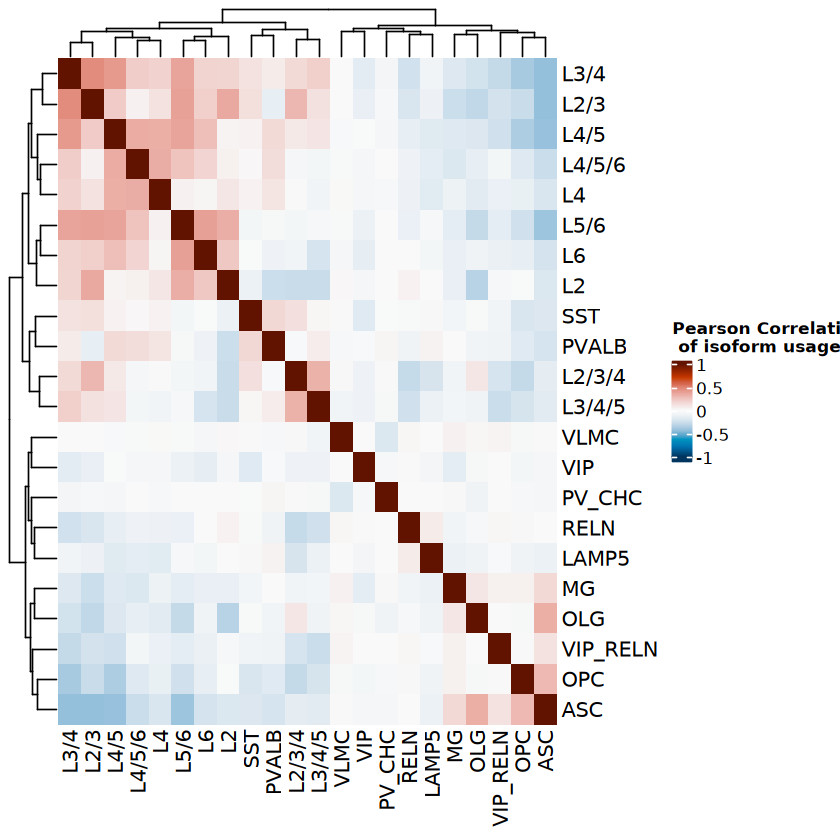

In [260]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$transcript_id %in% isosigi[isosigi$sig != "N",]$transcript_id,]
#isosigi = isosigt
#isosigf = isosigi[isosigi$sig != "N",]
#isosigf = isosigf %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosigf = isosigi[isosigi$transcript_id %in% isosigf$transcript_id,]
#isosigf$dr2 = isosigf$relative - isosigf$meanrelative
#isosigf1 = isosigf1[!isosigf1$areatr %in% c("EC"),]
isosigi = isosigi %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) > 17)
isosig.mx = dcast(isosigi,transcript_id~areatr,value.var = "dr",fun.aggregate = sum)
rownames(isosig.mx) = isosig.mx$transcript_id;isosig.mx = isosig.mx[-1]
dim(isosig.mx)
#isosig.mx = isosig.mx[,colSums(isosig.mx > 0) > 100]
dim(isosig.mx)
isosig.st = cor(isosig.mx,method = "pearson")
#isosig.st
library(circlize)
library(ComplexHeatmap)
splitc = colnames(isosig.st)
names(splitc) = colnames(isosig.st)
splitc = cellan[match(names(splitc),cellan$subclass),]$class
col_fun = colorRamp2(c(-1, 0, 1), hcl_palette = "RdBu",reverse = T)
pcorht = Heatmap(isosig.st,name = "Pearson Correlation\n of isoform usage",col = col_fun)
                 #column_split = splitc,row_split = splitc)
pcorht

In [122]:
mkls = qread("result/figure3/gene_marker_list_cell_24_12_09.qs")
mksub = mkls$subclass
degs = unique(mksub[abs(mksub$avg_log2FC) > 0.5 & mksub$p_val_adj < 0.01,]$gene)
length(degs)

[1] 9721

In [123]:
head(mksub)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene  
KIT     0.000000e+00 4.834011   0.819 0.087  0.000000e+00 LAMP5   KIT   
LAMP5   0.000000e+00 3.825464   0.809 0.167  0.000000e+00 LAMP5   LAMP5 
FBXL7   0.000000e+00 4.207251   0.738 0.107  0.000000e+00 LAMP5   FBXL7 
EYA4    0.000000e+00 4.779605   0.458 0.040  0.000000e+00 LAMP5   EYA4  
TACR1   0.000000e+00 4.704342   0.314 0.022  0.000000e+00 LAMP5   TACR1 
ADARB2 1.846017e-266 3.374952   0.842 0.223 3.317847e-262 LAMP5   ADARB2

In [273]:
Idents(srtt) = srtt$subclass
genecor <- GroupCorrelation(srtt, assay = "RNA")
genecor

ERROR: Error in object[[assay]][] <- grp.cors: object of type 'S4' is not subsettable


[1] 674  22

[1] 674  22

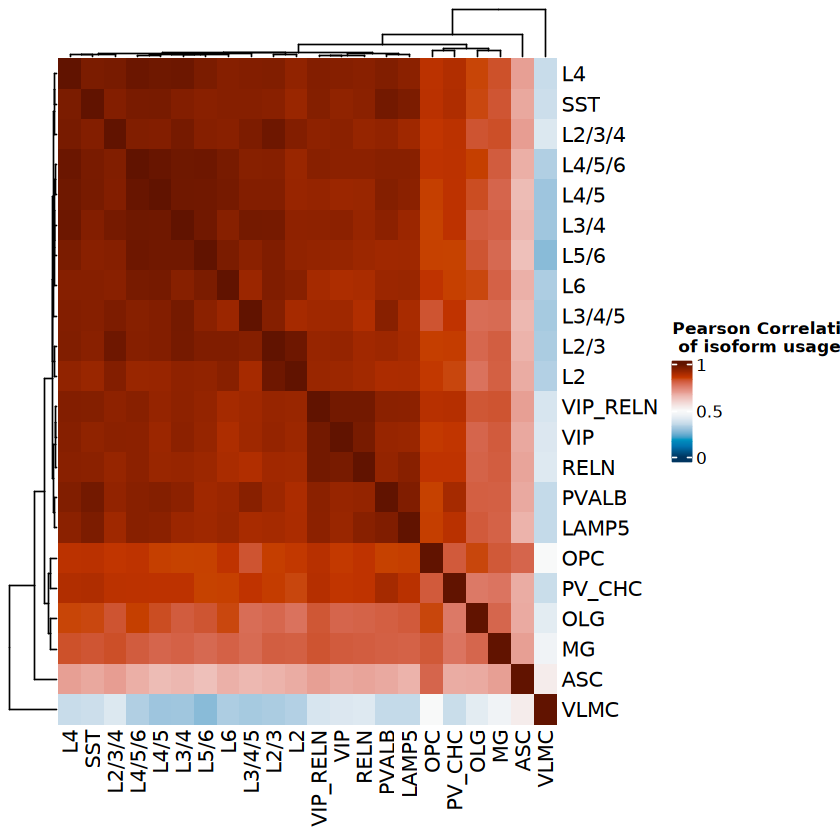

In [261]:
isosigi = isosigls$subclass
mksub = mksub[mksub$gene %in% degs,]
#isosigi = isosigt
#isosigf = isosigi[isosigi$sig != "N",]
#isosigf = isosigf %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosigf = isosigi[isosigi$transcript_id %in% isosigf$transcript_id,]
#isosigf$dr2 = isosigf$relative - isosigf$meanrelative
#isosigf1 = isosigf1[!isosigf1$areatr %in% c("EC"),]
isosigi = unique(isosigi[,c("gene_id","areatr","genecount")])
isosigi$genecount = isosigi$genecount / sum(isosigi$genecount)
isosigi = isosigi %>% group_by(gene_id) %>% filter(length(unique(areatr)) > 17)

isosig.mx = dcast(isosigi,gene_id~areatr,value.var = "genecount",fun.aggregate = sum)
rownames(isosig.mx) = isosig.mx$gene_id;isosig.mx = isosig.mx[-1]
dim(isosig.mx)
#isosig.mx = isosig.mx[,colSums(isosig.mx > 0) > 100]
dim(isosig.mx)
isosig.st2 = cor(isosig.mx,method = "pearson")
#isosig.st
library(circlize)
library(ComplexHeatmap)
splitc = colnames(isosig.st2)
names(splitc) = colnames(isosig.st2)
splitc = cellan[match(names(splitc),cellan$subclass),]$class
col_fun = colorRamp2(c(0, 1), hcl_palette = "RdBu",reverse = T)
pcorht = Heatmap(isosig.st2,name = "Pearson Correlation\n of isoform usage",col = col_fun)
                 #column_split = splitc,row_split = splitc)
pcorht

In [247]:
head(isosig.st2)

ASC       L2        L2/3      L2/3/4    L3/4      L3/4/5    L4       
ASC    1.0000000 0.4720244 0.4269183 0.5136733 0.4370899 0.2531264 0.5538326
L2     0.4720244 1.0000000 0.9470436 0.8428215 0.8834863 0.5785179 0.8912914
L2/3   0.4269183 0.9470436 1.0000000 0.9333943 0.9581433 0.6957363 0.9321655
L2/3/4 0.5136733 0.8428215 0.9333943 1.0000000 0.9241783 0.7365470 0.9206820
L3/4   0.4370899 0.8834863 0.9581433 0.9241783 1.0000000 0.7197236 0.9559224
L3/4/5 0.2531264 0.5785179 0.6957363 0.7365470 0.7197236 1.0000000 0.6867433
       L4/5      L4/5/6    L5/6      ⋯ MG        OLG       OPC       PV_CHC   
ASC    0.4491040 0.5243339 0.4201125 ⋯ 0.5058519 0.6263187 0.5522902 0.3959869
L2     0.8961784 0.8911220 0.9232008 ⋯ 0.5893321 0.7208476 0.5229746 0.5756673
L2/3   0.9421536 0.9277036 0.9521026 ⋯ 0.5731074 0.7401017 0.4883742 0.5769972
L2/3/4 0.9107929 0.9146325 0.8846163 ⋯ 0.5652870 0.7727534 0.4642342 0.5843105
L3/4   0.9643097 0.9408890 0.9443954 ⋯ 0.5779965 0.7452491 0.4730251 0.5865274
L3/4/5 0.6983846 0.6890161 0.6810109 ⋯ 0.3323562 0.5455241 0.2345602 0.3643521
       PVALB     RELN      SST       VIP       VIP_RELN  VLMC     
ASC    0.5387435 0.5886844 0.5445835 0.3583045 0.5316595 0.3155808
L2     0.8083656 0.7912789 0.8687040 0.6075272 0.7797603 0.1824604
L2/3   0.8617137 0.7779520 0.9008784 0.6247216 0.7785420 0.1797540
L2/3/4 0.8792995 0.7950648 0.9003639 0.5932478 0.7609462 0.2689498
L3/4   0.8986140 0.7795731 0.8975909 0.6032393 0.7793074 0.1857595
L3/4/5 0.6815921 0.5384209 0.6809606 0.3734080 0.5215122 0.1318101

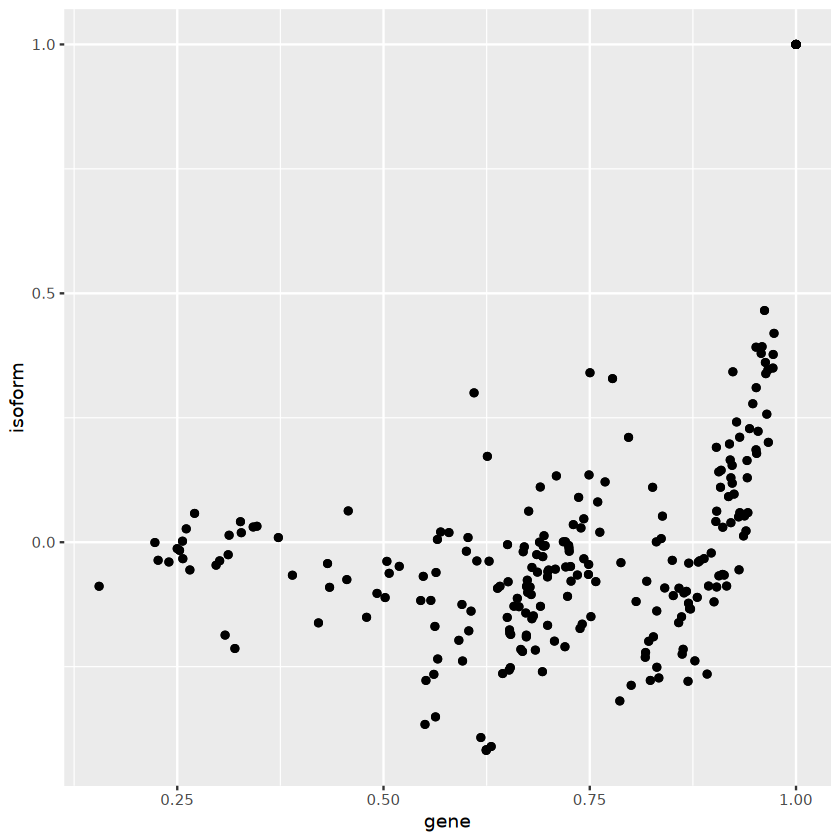

In [256]:
subcor1 = melt(isosig.st)
subcor2 = melt(isosig.st2)
colnames(subcor1)[3] = "isoform"
colnames(subcor2)[3] = "gene"
subcorcmp = merge(subcor1,subcor2,by = c("Var1","Var2"))
ggplot(subcorcmp,aes(x = gene,y = isoform)) + geom_point()


#### GLU GABA NN hetero

In [264]:
# isosiggl = isosigls.cl$GLU_GLU
# huntrans1 = unique(isosiggl[isosiggl$sig %in% c("Up","Down"),]$transcript_id)
# isosigga = isosigls.cl$GABA_GABA
# huntrans2 = unique(isosigga[isosigga$sig %in% c("Up","Down"),]$transcript_id)
# isosignn = isosigls.cl$NonNeuron_NonNeuron
# huntrans3 = unique(isosignn[isosignn$sig %in% c("Up","Down"),]$transcript_id)
# huntrans = c(huntrans1,huntrans2,huntrans3)
isosigi = isosigls$subclass
huntrans = unique(isosigi[isosigi$sig %in% c("Up","Down"),]$transcript_id)

isosiggl = isosigi[isosigi$transcript_id %in% huntrans & isosigi$areatr %in% cellan[cellan$class == "GLU",]$subclass,]
isosiggl = isosiggl[isosiggl$count > 10,]
isosiggl = isosiggl %>% group_by(gene_id,transcript_id) %>% filter(length(areatr) > 2) %>% 
           summarise(drl = sd(relative),count = sum(count))

isosigga = isosigi[isosigi$transcript_id %in% huntrans & isosigi$areatr %in% cellan[cellan$class == "GABA",]$subclass,]
isosigga = isosigga[isosigga$count > 10,]
isosigga = isosigga %>% group_by(gene_id,transcript_id) %>% filter(length(areatr) > 2) %>% summarise(drc = sd(relative))

isosignn = isosigi[isosigi$transcript_id %in% huntrans & isosigi$areatr %in% cellan[cellan$class == "NonNeuron",]$subclass,]
isosignn = isosignn[isosignn$count > 10,]
isosignn = isosignn %>% group_by(gene_id,transcript_id) %>% filter(length(areatr) > 2) %>% summarise(drb = sd(relative))

isosigtri = merge(isosiggl,isosigga,by = c("gene_id","transcript_id"))
isosigtri = merge(isosigtri,isosignn,by = c("gene_id","transcript_id"))
head(isosigtri)
nrow(isosigtri)
summary(isosigtri$drl)
summary(isosigtri$drb)
summary(isosigtri$drc)
isosigtri$transname = isosigtri$transcript_id
isosigtri[MySplit(isosigtri$transcript_id,"-",1) != isosigtri$gene_id,]$transname =
paste0(isosigtri[MySplit(isosigtri$transcript_id,"-",1) != isosigtri$gene_id,]$gene_id,"-",
       isosigtri[MySplit(isosigtri$transcript_id,"-",1) != isosigtri$gene_id,]$transname)

`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


gene_id transcript_id  drl        count drc        drb        
1 ABCC5   XM_005546512.2 0.04446722 1306  0.05025897 0.122379763
2 ABCF1   XM_005553641.2 0.02516056 2366  0.08696750 0.008861815
3 ABHD2   XM_005560462.2 0.05983703  782  0.03895463 0.060637597
4 ACLY    XM_005584205.2 0.04418536 1608  0.03019763 0.077785440
5 ACSL6   XM_015451371.1 0.02054087 3111  0.01410558 0.071805437
6 ACTR2   XM_005575729.2 0.04825583 3994  0.03617161 0.030697587

[1] 454

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01154 0.02800 0.03891 0.04273 0.05085 0.14805 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001357 0.037659 0.059207 0.069457 0.092611 0.262829 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009669 0.044311 0.062502 0.065149 0.081680 0.179402 

Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (`colour`)"
file saved to result/figure3/class_within_subclass_dtu_delta_tern_24_12_10.pdf



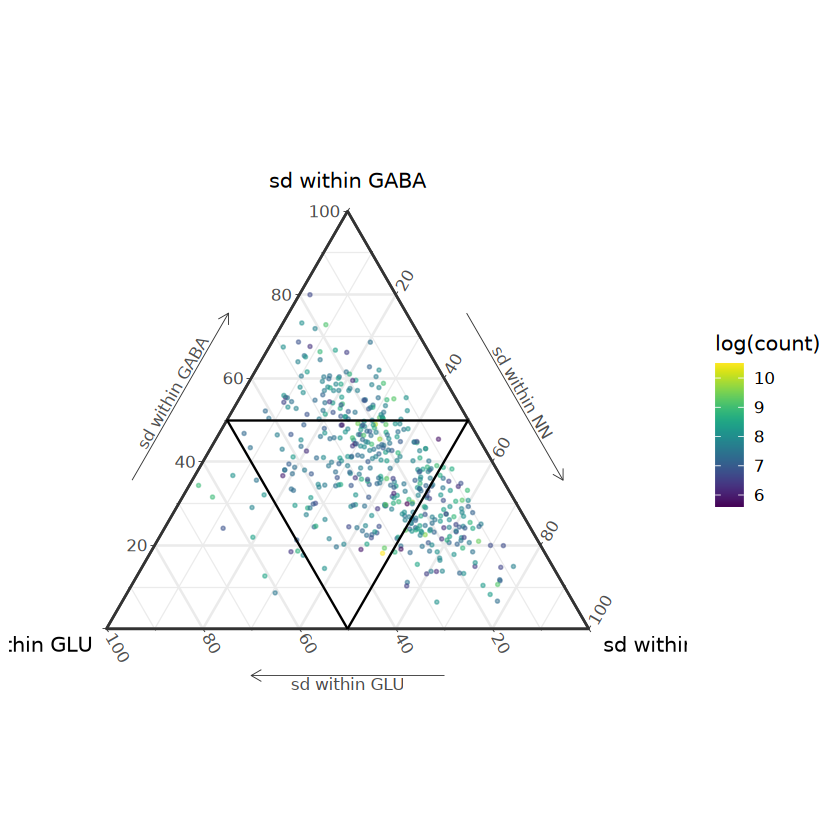

In [269]:

isosigtri$sig = "N"
#isosigtri[isosigtri$transcript_id %in% hubtrans,]$sig = "Y"
#isosigtri[isosigtri$gene_id %in% hubgene,]
#isosigtri[isosigtri$drb > isosigtri$drc & isosigtri$drb > isosigtri$drl,]$sig = "Y"
#isosigtri[isosigtri$drl > isosigtri$drc & isosigtri$drl > isosigtri$drb,]$sig = "Y"
#install.packages("ggtern")
library(ggtern)
library(ggpointdensity)
library(ggrepel)
labFnc <- function(x,digits=1) format(round(unique(x),digits),digits=digits)

mycolors = c("white","red")
names(mycolors) = c("N","Y")
isosigtri = isosigtri[order(isosigtri$sig),]
p2 = ggtern(data=isosigtri,aes(drl,drc,drb,color = log(count),color = sig)) + 
#geom_pointdensity() +
   geom_mask() +
   geom_point(alpha = 0.5,size = 0.5) + 
   # geom_text(data=isosigtri[isosigtri$sig != "N",],
   #           aes(drl,drc,drb,label = gene_id),size = 2,color = "black")+
 #  geom_text_repel(data=isosigtri[isosigtri$sig != "N",],aes(drl,drc,drb)) +
   theme_bw() +
   theme_showarrows() +
   theme_clockwise() +
   geom_Lline(Lintercept=0.50) +
   geom_Tline(Tintercept=0.50) +
   geom_Rline(Rintercept=0.50) +
   xlab("sd within GLU")+ 
   ylab("sd within GABA")+
   zlab("sd within NN")+ 
   scale_color_viridis() +
   theme(legend.position = "right")

p2
ggexport(p2,filename = "result/figure3/class_within_subclass_dtu_delta_tern_24_12_10.pdf",width = 4,height = 4)

#### Go analysis

In [281]:
MyGOPlot = function(hubgenei,ni,mytitle,mycolor = NULL){
    goi = gost(query = hubgenei,
               organism = "mfascicularis")
#godfi = CalOddRate(goi$result,5)
    godfi = goi$result
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
#godfi = godfi[godfi$p_value < 0.05,]
    godfi = godfi[godfi$intersection_size > 2,] %>% group_by(source) %>% arrange(gene_ratio) %>% 
    top_n(wt = gene_ratio,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
    print(nrow(godfi))

    if(is.null(mycolor)){
        mycolor = pal_flatui("default")(length(unique(godfi$source))) 
    }
    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]
    if(nrow(godfi) > 0){
        pgi = ggplot(godfi,
               aes(x = gene_ratio, y=term_name,fill = source)) + 
        geom_point(aes(size = intersection_size),shape = 21) +
        geom_bar(stat = "identity",width = 0.03) +
        geom_text(aes(label = term_name,x = 0),hjust = -0.01,vjust = -0.5) +
        scale_fill_manual(values = mycolor) +
 #       scale_fill_viridis(direction = 1,option = "A") +
        #scale_fill_distiller(direction = 1,palette = "Greens") +
    # scale_y_discrete(labels = rev(unique(godftf$term_name))) +
    #facet_grid(source~.,scales = "free",space = "free") + 
        xlab("gene counts") +
        theme_pubr() + theme(legend.position = "top",axis.text.y = element_blank()) +
        ggtitle(mytitle)
    }
    return(pgi)
    
}

MyGOCal = function(hubgenei,ni){
    goi = gost(query = hubgenei,
               organism = "mfascicularis")
#godfi = CalOddRate(goi$result,5)
    godfi = goi$result
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
#godfi = godfi[godfi$p_value < 0.05,]
    godfi = godfi[godfi$intersection_size > 2,]
    godfi = godfi[grepl(godfi$term_name,pattern = "synap|splic|dendrite") | godfi$source %in% c("HP","KEGG"),]
    godfi = godfi %>% group_by(source) %>% arrange(intersection_size) %>% 
    top_n(wt = intersection_size,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
   # godfi = godfi[godfi$source %in% c("GO:BP","HP","KEGG"),]
    print(nrow(godfi))

    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]

    return(godfi)
    
}

In [282]:
#head(clusteran)
#unique(clusteran$cluster)
#unique(clusteran$type)
#length(unique(clusteran[clusteran$type == clusterid[1],]$gene_id))
#length(unique(clusteran[clusteran$type == clusterid[2],]$gene_id))
#length(unique(clusteran[clusteran$type == clusterid[3],]$gene_id))
mycolor = pal_flatui("default")(5)
names(mycolor) = c("GO:BP","GO:MF","GO:CC","HP","KEGG")
# isosigi = isosigls$subclass
# isosigi = isosigi[isosigi$sig != "N",]
# isosigi = merge(isosigi,cellan,by.x = "areatr",by.y = "subclass")
# isosigi = isosigi %>% group_by(transcript_id) %>% filter(length(unique(class)) == 1)
# isosigi = isosigi[isosigi$class == "GABA",]
# hubgenei = unique(isosigi$gene_id)
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
#isosigi = isosigi %>% group_by(gene_id,transcript_id,sig) %>% filter(length(unique(areatr)) == 1)
isosigi = isosigi[isosigi$areatr == "L2",]
hubgenei = unique(isosigi$gene_id)
#hubgenei
#hubgenei = unique(clusteran[as.character(clusteran$cluster) %in% c("NN"),]$gene_id)
#hubgenei = unique(clusteran[as.character(clusteran$cluster) %in% c("2","6"),]$gene_id)
#hubgenei = unique(isosigc[isosigc$sig != "N",]$gene_id)
length(hubgenei)
pgi = MyGOPlot(hubgenei,5,"DTU within glu",mycolor)
pgi
#ggexport(pgi,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_total_GO_24_10_28.pdf",width = 4,height = 8)

[1] 272

ERROR: Error in function (type, msg, asError = TRUE) : Failed to connect to biit.cs.ut.ee port 80 after 254663 ms: Couldn't connect to server


In [15]:
library(openxlsx)

# 创建Excel工作簿
wb <- createWorkbook()

# 创建两个工作表：一个用于hubgene列表，一个用于GO结果
hubgene_wb <- createWorkbook()

hubgene_list <- list()

isosigi <- isosigls$subclass
isosigi <- isosigi[isosigi$sig == "Up", ]
areatrs <- unique(isosigi$areatr)
areatrs <- factor(areatrs, levels = suborder)
areatrs <- as.character(areatrs[order(areatrs)])

# 遍历每个区域
for (i in 1:length(areatrs)) {
    area <- areatrs[i]
    isosigii <- isosigi[isosigi$areatr == area, ]
    hubgene <- unique(isosigii$gene_id)
    
    # 打印基因数量
    print(paste0(area, ": ", length(hubgene), " genes"))
    
    # 保存hubgene到列表
    hubgene_list[[area]] <- data.frame(GeneID = hubgene)
}

# 将hubgene列表写入Excel的不同工作表
for (area in names(hubgene_list)) {
    addWorksheet(hubgene_wb, area)
    writeData(hubgene_wb, sheet = area, hubgene_list[[area]])
}

# 保存Excel文件
saveWorkbook(hubgene_wb, "result/figure_revision/Hubgene_by_subclass_25_11_28.xlsx", overwrite = TRUE)

[1] "L2: 272 genes"
[1] "L2/3: 202 genes"
[1] "L2/3/4: 169 genes"
[1] "L3/4: 189 genes"
[1] "L3/4/5: 112 genes"
[1] "L4: 181 genes"
[1] "L4/5: 178 genes"
[1] "L4/5/6: 200 genes"
[1] "L5/6: 197 genes"
[1] "L6: 173 genes"
[1] "LAMP5: 77 genes"
[1] "RELN: 127 genes"
[1] "VIP_RELN: 106 genes"
[1] "VIP: 76 genes"
[1] "PV_CHC: 11 genes"
[1] "PVALB: 214 genes"
[1] "SST: 186 genes"
[1] "ASC: 389 genes"
[1] "OPC: 90 genes"
[1] "OLG: 278 genes"
[1] "MG: 30 genes"
[1] "VLMC: 4 genes"


In [18]:
library(readxl)
file_path <- "result/figure_revision/Hubgene_by_subclass_25_11_28.xlsx"
sheet_names <- excel_sheets(file_path)
print(sheet_names)

 [1] "L2"       "L2_3"     "L2_3_4"   "L3_4"     "L3_4_5"   "L4"      
 [7] "L4_5"     "L4_5_6"   "L5_6"     "L6"       "LAMP5"    "RELN"    
[13] "VIP_RELN" "VIP"      "PVALB"    "SST"      "ASC"      "OPC"     
[19] "OLG"      "MG"      


In [56]:
gofls = list.files("result/figure_revision/GO_analysis/",full.names = T)
gofls = gofls[order(gofls)]

MyGOFilter = function(godfi,ni){
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
    # godfi = godfi[godfi$intersection_size > 2,]
    # godfi = godfi[grepl(godfi$term_name,pattern = "synap|splic|dendrite") | godfi$source %in% c("HP","KEGG"),]
    godfi = godfi %>% group_by(source) %>% arrange(intersection_size) %>% 
    top_n(wt = intersection_size,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
    print(nrow(godfi))
    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]
    return(godfi)
}

godf = NULL
for(i in 1:length(gofls)){
    godfi = read.csv(gofls[i])
    godfi = tryCatch(MyGOFilter(godfi,5),error = function(e) 0)
    if(!is.null(nrow(godfi))){
        if(nrow(godfi) > 0){
            godfi$areatr = sheet_names[i]
            godf = rbind(godf,godfi)
        }
    }
}
head(godf)

[1] 13
[1] 5
[1] 11
[1] 2
[1] 8
[1] 4
[1] 3
[1] 3
[1] 9
[1] 3
[1] 2
[1] 13
[1] 9
[1] 3
[1] 9
[1] 7
[1] 16
[1] 10
[1] 11
[1] 9


source term_name                                                term_id   
1 GO:MF  DNA exonuclease activity, producing 5'-phosphomonoesters GO:0016895
2 GO:MF  DNA exonuclease activity                                 GO:0004529
3 GO:MF  exonuclease activity                                     GO:0004527
4 HP     Neonatal hypotonia                                       HP:0001319
5 GO:BP  intracellular transport                                  GO:0046907
6 GO:BP  establishment of localization in cell                    GO:0051649
  highlighted adjusted_p_value negative_log10_of_adjusted_p_value term_size
1 false       0.013367903      1.873937                             17     
2 false       0.017034582      1.768669                             18     
3 true        0.005631442      2.249380                             70     
4 false       0.026389640      1.578567                            180     
5 false       0.017172569      1.765165                            993     
6 true        0.008733240      2.058825                           1419     
  query_size intersection_size effective_domain_size
1 173         4                15155                
2 173         4                15155                
3 173         7                15155                
4  63        11                 4759                
5 180        25                18644                
6 180        32                18644                
  intersections                                                                                                                                                                                         
1 APTX,EXD2,POLG,TATDN1                                                                                                                                                                                 
2 APTX,EXD2,POLG,TATDN1                                                                                                                                                                                 
3 APTX,CPSF3,EXD2,POLG,RAD1,TATDN1,XRN2                                                                                                                                                                 
4 AP4B1,BIN1,EGR2,EIF5A,NFIX,NTNG1,PDHX,SLC25A22,SPATA5,SYT1,TPM2                                                                                                                                       
5 AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CCDC91,CMTM6,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PEX5L,PICK1,PRICKLE1,RABGEF1,RAMP3,REPS2,SARNP,SRSF10,TRMT10B                                           
6 AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CACNB4,CCDC91,CEP19,CMTM6,CPLX2,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PDZD7,PEX5L,PICK1,PRICKLE1,RABGEF1,RACGAP1,RAMP3,REPS2,SARNP,SKA2,SRSF10,SYT1,TRMT10B
  gene_ratio areatr
1 0.23529412 L2    
2 0.22222222 L2    
3 0.10000000 L2    
4 0.06111111 L2    
5 0.02517623 L2    
6 0.02255109 L2

In [221]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
areatrs = unique(isosigi$areatr)
areatrs = factor(areatrs,levels = suborder)
areatrs = as.character(areatrs[order(areatrs)])
#areatrs = areatrs[1:15]
godf = NULL
for(i in 1:length(areatrs)){
    isosigii = isosigi[isosigi$areatr == areatrs[i],]
    hubgene = unique(isosigii$gene_id)
    print(length(hubgene))
    # godfi = tryCatch(MyGOCal(hubgene,5),error = function(e) 0)
    # if(!is.null(nrow(godfi))){
    #     if(nrow(godfi) > 0){
    #         godfi$areatr = areatrs[i]
    #         godf = rbind(godf,godfi)
    #     }
    # }
}
godf$areatr = factor(godf$areatr,levels = suborder[suborder %in% godf$areatr])

#ggexport(pgot,filename = "result/figure4/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_24_11_07.pdf",width = 6,height = 8)

[1] 264
[1] 7
[1] 184
[1] 3
[1] 229
[1] 6
[1] 164
[1] 0
[1] 162
[1] 1
[1] 187
[1] 0
[1] 188
[1] 0
[1] 174
[1] 0
[1] 203
[1] 0
[1] 205
[1] 2
[1] 132
[1] 4
[1] 195
[1] 1
[1] 157
[1] 6
[1] 114
[1] 8
[1] 23
[1] 1
[1] 209
[1] 0
[1] 194
[1] 0
[1] 488
[1] 13
[1] 297
[1] 0
[1] 161
[1] 15
[1] 55
[1] 0
[1] 3


No results to show
Please make sure that the organism is correct or set significant = FALSE



In [57]:
head(godf)
# unique(godf$source)
#suborder
godf$areatr = gsub(godf$areatr,pattern = "_",replacement = "\\/")
unique(godf$areatr)
godf[godf$areatr == "VIP/RELN",]$areatr = "VIP_RELN"

source term_name                                                term_id   
1 GO:MF  DNA exonuclease activity, producing 5'-phosphomonoesters GO:0016895
2 GO:MF  DNA exonuclease activity                                 GO:0004529
3 GO:MF  exonuclease activity                                     GO:0004527
4 HP     Neonatal hypotonia                                       HP:0001319
5 GO:BP  intracellular transport                                  GO:0046907
6 GO:BP  establishment of localization in cell                    GO:0051649
  highlighted adjusted_p_value negative_log10_of_adjusted_p_value term_size
1 false       0.013367903      1.873937                             17     
2 false       0.017034582      1.768669                             18     
3 true        0.005631442      2.249380                             70     
4 false       0.026389640      1.578567                            180     
5 false       0.017172569      1.765165                            993     
6 true        0.008733240      2.058825                           1419     
  query_size intersection_size effective_domain_size
1 173         4                15155                
2 173         4                15155                
3 173         7                15155                
4  63        11                 4759                
5 180        25                18644                
6 180        32                18644                
  intersections                                                                                                                                                                                         
1 APTX,EXD2,POLG,TATDN1                                                                                                                                                                                 
2 APTX,EXD2,POLG,TATDN1                                                                                                                                                                                 
3 APTX,CPSF3,EXD2,POLG,RAD1,TATDN1,XRN2                                                                                                                                                                 
4 AP4B1,BIN1,EGR2,EIF5A,NFIX,NTNG1,PDHX,SLC25A22,SPATA5,SYT1,TPM2                                                                                                                                       
5 AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CCDC91,CMTM6,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PEX5L,PICK1,PRICKLE1,RABGEF1,RAMP3,REPS2,SARNP,SRSF10,TRMT10B                                           
6 AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CACNB4,CCDC91,CEP19,CMTM6,CPLX2,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PDZD7,PEX5L,PICK1,PRICKLE1,RABGEF1,RACGAP1,RAMP3,REPS2,SARNP,SKA2,SRSF10,SYT1,TRMT10B
  gene_ratio areatr
1 0.23529412 L2    
2 0.22222222 L2    
3 0.10000000 L2    
4 0.06111111 L2    
5 0.02517623 L2    
6 0.02255109 L2

[1] "L2"       "L2/3"     "L2/3/4"   "L3/4"     "L3/4/5"   "L4"      
 [7] "L4/5"     "L4/5/6"   "L5/6"     "L6"       "LAMP5"    "RELN"    
[13] "VIP/RELN" "VIP"      "PVALB"    "SST"      "ASC"      "OPC"     
[19] "OLG"      "MG"

file saved to result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_25_11_28.pdf



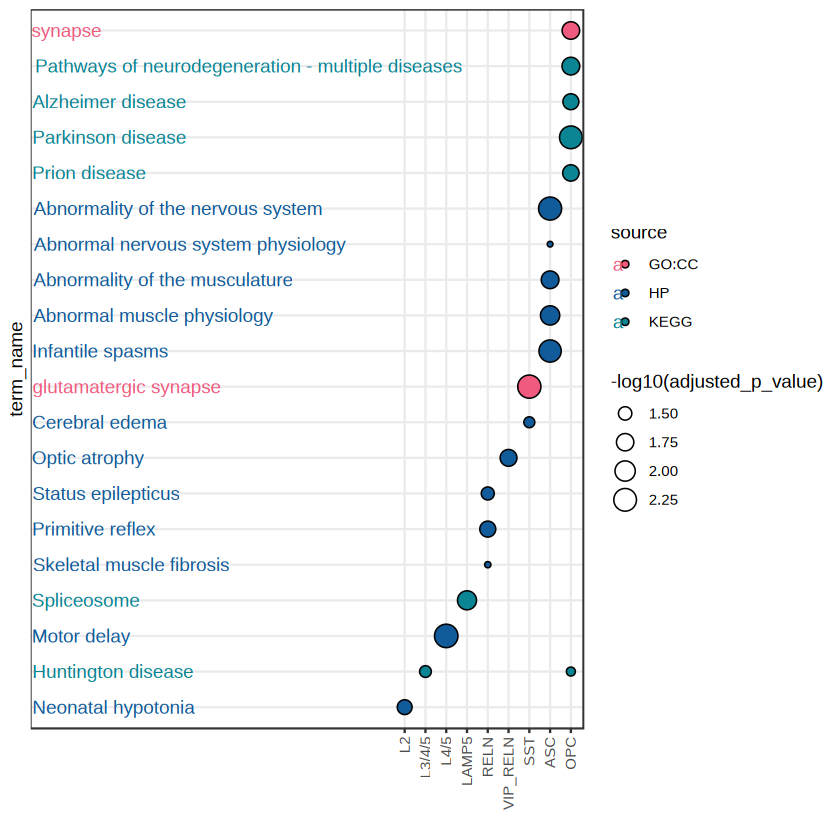

In [60]:
#godf.hub = godf[grepl(godf$term_name,pattern = "synap|dendrite"),]
godf.hub = godf[grepl(godf$term_name,pattern = "cort|neuron|synap|dendrite") | godf$source %in% c("HP","KEGG"),]
gocolors = c("#DC8686","#F05A7E","#125B9A","#0B8494")
gocolors = c("#F05A7E","#125B9A","#0B8494")
# godf.hub = godf[grepl(godf$term_name,pattern = "neuron|synap|dendrite") | godf$source %in% c("HP","KEGG","GO:CC","GO:BP"),]
# godf.hub = godf
# godf.hub = godf.hub[godf.hub$term_name != "anterograde trans-synaptic signaling",]
godf.hub$areatr = factor(godf.hub$areatr,levels = suborder[suborder %in% godf.hub$areatr])
pgot = ggplot(data = godf.hub) + 
     # geom_rect(data = unique(godft[,c("term_name","source")]),
     #                               aes(ymin = as.numeric(term_name)-0.5,ymax = as.numeric(term_name)+0.5,
     #                                                        xmin = -Inf,xmax = Inf,fill = source),
     #            alpha = 0.2) +
    geom_point(aes(x = areatr,y = term_name,size = -log10(adjusted_p_value),fill = source),shape = 21,color = "black") +
    geom_text(data = unique(godf.hub[,c("term_name","source")]),
              aes(y = term_name,label = term_name,x = -17,color = source),hjust = -0.01) +
    #scale_fill_frontiers() + 
    #scale_color_frontiers() + 
    scale_color_manual(values = gocolors) +
    scale_fill_manual(values = gocolors) +
    # scale_color_manual(values = mycolor) +
#    facet_grid(group~.,scales = "free",space = "free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5,hjust = 1),
        axis.text.y = element_blank(),  
       axis.ticks.y = element_blank(),
      panel.spacing = unit(0,'lines'),
      #panel.grid.major = element_blank(),
      #panel.grid.minor = element_blank(),
      panel.border = element_rect(fill = NA)) + xlab("")
pgot
ggexport(pgot,filename = "result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_25_11_28.pdf",width = 6,height = 7)

In [ ]:
clusterid = unique(clusteran$cluster)
godft = NULL
for(i in clusterid){
    godfi = MyGOCal(unique(clusteran[clusteran$cluster == i,]$gene_id),5)
    godfi$group = i
    godft = rbind(godft,godfi)
}


In [ ]:
pgot = ggplot(data = godft) + 
     # geom_rect(data = unique(godft[,c("term_name","source")]),
     #                               aes(ymin = as.numeric(term_name)-0.5,ymax = as.numeric(term_name)+0.5,
     #                                                        xmin = -Inf,xmax = Inf,fill = source),
     #            alpha = 0.2) +
    geom_point(aes(x = group,y = term_name,size = intersection_size,fill = source),shape = 21,color = "black") +
    geom_text(aes(y = term_name,label = term_name,x = 0,color = source),hjust = -0.01,vjust = -0.5) +
        scale_fill_manual(values = mycolor) + 
    scale_color_manual(values = mycolor) +
    #facet_grid(group~.,scales = "free",space = "free") +
    theme_bw() +
    theme(axis.text.y = element_blank(),
       axis.ticks.y = element_blank(),
      panel.spacing = unit(0,'lines'),
      panel.grid.major = element_blank(),
      #panel.grid.minor = element_blank(),
      panel.border = element_rect(fill = NA)) + xlab("")
pgot
ggexport(pgot,filename = "result/figure3/dtu_go_analysis_cluster_total_split_24_10_27.pdf",width = 6,height = 9)

#### Case list plot

In [176]:
hubshift = df_wide[df_wide$OPC == FALSE,]
hubshift = hubshift[!is.na(hubshift$transcript_id),]
unique(isosigi[isosigi$transcript_id %in% hubshift$transcript_id,]$gene_id)

[1] "ADGRB3"       "ADNP"         "ARHGEF7"      "ASPH"         "BCAS1"       
 [6] "DAB1"         "DCUN1D2"      "ECHDC1"       "EP300"        "HNRNPA3"     
[11] "IL1RAP"       "LOC102135846" "LSM6"         "NTM"          "NTRK2"       
[16] "PIAS2"        "PID1"         "PSMD12"       "PTPRD"        "REV1"        
[21] "RIMS1"        "RNMT"         "TJP1"         "VPS13C"

In [272]:
casect = fsraw.cor[fsraw.cor$subclass != "",] %>% group_by(class,subclass,gene_id,transcript_id) %>% 
                summarise(count = length(readid)) %>% 
                group_by(class,subclass,gene_id) %>% 
                mutate(genecount = sum(count),rate = count/genecount)

`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.


In [13]:
fsraw.cor[(fsraw.cor$gene_id %in% "EIF5A"),]%>% 
                group_by(class,subclass,gene_id,transcript_id) %>% 
                summarise(count = length(readid)) %>% 
                group_by(class,subclass,gene_id) %>% 
                mutate(genecount = sum(count),rate = count/genecount)

`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.


class     subclass gene_id transcript_id  count genecount rate      
1  GABA      LAMP5    EIF5A   EIF5A-FS-1       1    23       0.04347826
2  GABA      LAMP5    EIF5A   XM_005582727.1  16    23       0.69565217
3  GABA      LAMP5    EIF5A   XM_005582728.2   6    23       0.26086957
4  GABA      PVALB    EIF5A   EIF5A-FS-1       8    98       0.08163265
5  GABA      PVALB    EIF5A   XM_005582727.1  43    98       0.43877551
6  GABA      PVALB    EIF5A   XM_005582728.2  47    98       0.47959184
7  GABA      PV_CHC   EIF5A   XM_005582728.2   2     2       1.00000000
8  GABA      RELN     EIF5A   EIF5A-FS-1       2    26       0.07692308
9  GABA      RELN     EIF5A   XM_005582727.1  16    26       0.61538462
10 GABA      RELN     EIF5A   XM_005582728.2   8    26       0.30769231
11 GABA      SST      EIF5A   EIF5A-FS-1       2    68       0.02941176
12 GABA      SST      EIF5A   XM_005582727.1  43    68       0.63235294
13 GABA      SST      EIF5A   XM_005582728.2  23    68       0.33823529
14 GABA      VIP      EIF5A   EIF5A-FS-1       1    19       0.05263158
15 GABA      VIP      EIF5A   XM_005582727.1  12    19       0.63157895
16 GABA      VIP      EIF5A   XM_005582728.2   6    19       0.31578947
17 GABA      VIP_RELN EIF5A   EIF5A-FS-1       1    27       0.03703704
18 GABA      VIP_RELN EIF5A   XM_005582727.1  16    27       0.59259259
19 GABA      VIP_RELN EIF5A   XM_005582728.2  10    27       0.37037037
20 GLU       L2       EIF5A   EIF5A-FS-1       9   119       0.07563025
21 GLU       L2       EIF5A   XM_005582727.1  53   119       0.44537815
22 GLU       L2       EIF5A   XM_005582728.2  57   119       0.47899160
23 GLU       L2/3     EIF5A   EIF5A-FS-1      28   308       0.09090909
24 GLU       L2/3     EIF5A   XM_005582727.1 146   308       0.47402597
25 GLU       L2/3     EIF5A   XM_005582728.2 134   308       0.43506494
26 GLU       L2/3/4   EIF5A   EIF5A-FS-1       3    59       0.05084746
27 GLU       L2/3/4   EIF5A   XM_005582727.1  46    59       0.77966102
28 GLU       L2/3/4   EIF5A   XM_005582728.2  10    59       0.16949153
29 GLU       L3/4     EIF5A   EIF5A-FS-1      21   249       0.08433735
30 GLU       L3/4     EIF5A   XM_005582727.1 129   249       0.51807229
31 GLU       L3/4     EIF5A   XM_005582728.2  99   249       0.39759036
32 GLU       L3/4/5   EIF5A   EIF5A-FS-1       1    23       0.04347826
33 GLU       L3/4/5   EIF5A   XM_005582727.1  13    23       0.56521739
34 GLU       L3/4/5   EIF5A   XM_005582728.2   9    23       0.39130435
35 GLU       L4       EIF5A   EIF5A-FS-1      14   163       0.08588957
36 GLU       L4       EIF5A   XM_005582727.1  91   163       0.55828221
37 GLU       L4       EIF5A   XM_005582728.2  58   163       0.35582822
38 GLU       L4/5     EIF5A   EIF5A-FS-1      14   235       0.05957447
39 GLU       L4/5     EIF5A   XM_005582727.1 138   235       0.58723404
40 GLU       L4/5     EIF5A   XM_005582728.2  83   235       0.35319149
41 GLU       L4/5/6   EIF5A   EIF5A-FS-1       5   128       0.03906250
42 GLU       L4/5/6   EIF5A   XM_005582727.1  68   128       0.53125000
43 GLU       L4/5/6   EIF5A   XM_005582728.2  55   128       0.42968750
44 GLU       L5/6     EIF5A   EIF5A-FS-1       8   160       0.05000000
45 GLU       L5/6     EIF5A   XM_005582727.1  60   160       0.37500000
46 GLU       L5/6     EIF5A   XM_005582728.2  92   160       0.57500000
47 GLU       L6       EIF5A   EIF5A-FS-1      19   125       0.15200000
48 GLU       L6       EIF5A   XM_005582727.1  61   125       0.48800000
49 GLU       L6       EIF5A   XM_005582728.2  45   125       0.36000000
50 NonNeuron ASC      EIF5A   EIF5A-FS-1       7    68       0.10294118
51 NonNeuron ASC      EIF5A   XM_005582727.1  29    68       0.42647059
52 NonNeuron ASC      EIF5A   XM_005582728.2  32    68       0.47058824
53 NonNeuron MG       EIF5A   XM_005582727.1   3     3       1.00000000
54 NonNeuron OLG      EIF5A   EIF5A-FS-1      11   137       0.08029197
55 NonNeuron OLG      EIF5A   XM_005582727.

`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.


class subclass gene_id 1         2         groupid geneidn
1 GABA  LAMP5    ARPP19  0.4406780 0.5593220 11      2      
2 GABA  LAMP5    DBNDD2  0.7674419 0.2325581 11      8      
3 GABA  LAMP5    DDRGK1  0.3766234 0.6233766 11      1      
4 GABA  LAMP5    IDH3B   0.4651163 0.5348837 11      3      
5 GABA  LAMP5    NTRK2   0.6666667 0.3333333 11      7      
6 GABA  LAMP5    SEPT8   0.8750000 0.1250000 11      6

file saved to result/figure3/T44_case_subclass_isoform_rate_stat_pie_25_12_02.pdf



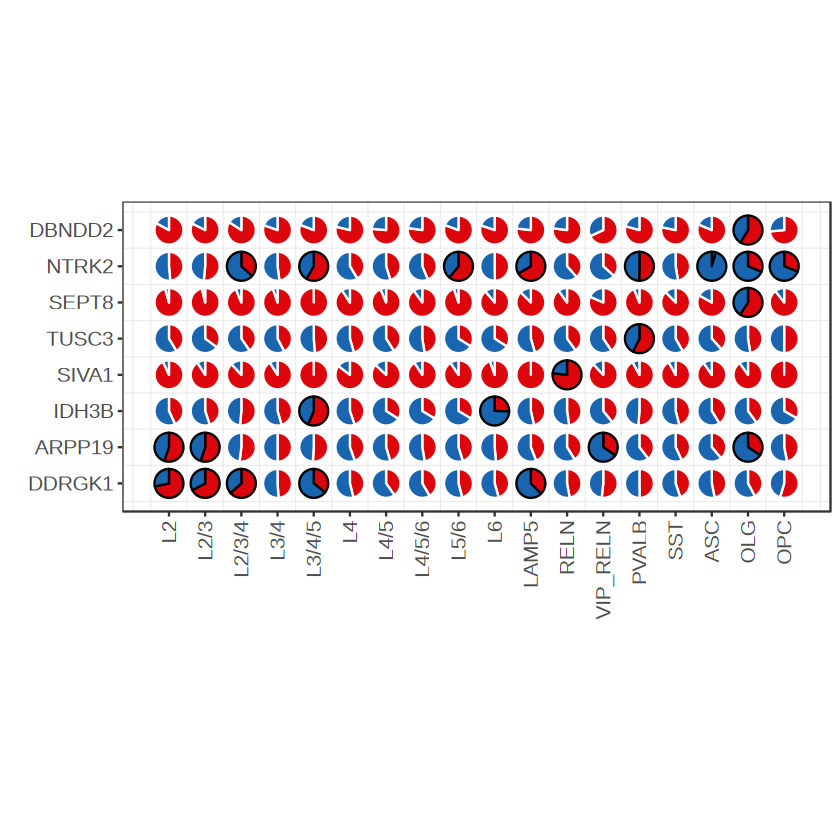

In [16]:
caseg = c("DDRGK1","ARPP19","IDH3B","SIVA1","TUSC3","SEPT8","NTRK2","DBNDD2")
hubtrans = c("XM_005568473.2","DDRGK1-FS-1","NM_001283415.1","XM_015452432.1","XM_005569136.2","XM_015429879.1",
            "XM_005582047.2","XM_005582051.2","XM_005582728.2","XM_005582727.1","XM_005562646.2","XM_005562645.2",
            "XM_005568512.1","XM_005568513.1","XM_005557741.2","XM_005557744.2","XM_005562346.2","XM_005562347.2")
fsraw.case = fsraw.cor[(fsraw.cor$gene_id %in% caseg) & (fsraw.cor$transcript_id %in% hubtrans),]
fsraw.case = fsraw.case %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
casect = fsraw.case[fsraw.case$subclass != "" & !is.na(fsraw.case$subclass),] %>% 
                group_by(class,subclass,gene_id,transcript_id) %>% 
                summarise(count = length(readid)) %>% 
                group_by(class,subclass,gene_id) %>% 
                mutate(genecount = sum(count),rate = count/genecount)
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OLG','OPC','MG','EC','VLMC')
isosigi2 = isosigls$subclass
#caseg = unique(isosigi$gene_id)
# isosigi2 = isosigls.t47$subclass
isosigi2 = isosigi2[isosigi2$sig != "N",]
# #isosigi2 = isosigi2[isosigi2$gene_id %in% caseg & isosigi2$sig != "N",] %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
# #isosigi = isosigi[isosigi$count > 20,]
# isosigi = isosigls.t47$subclass
# isosigi = isosigi %>% group_by(gene_id,areatr) %>% top_n(n = 3,wt = meanrelative)
# casecti = casect[casect$gene_id %in% caseg & casect$transcript_id %in% isosigi$transcript_id,]
casecti = casect
# casecti[!(casecti$transcript_id %in% isosigi2$transcript_id),]$transcript_id = "other"
# casecti = casecti %>% group_by(gene_id,transcript_id,class,subclass) %>% summarise(count = sum(count),
#                                                                             genecount = sum(genecount),
#                                                                             rate = count/genecount)
casecti = casecti[casecti$genecount > 10 & casecti$count > 5,]
casecti = casecti[!casecti$subclass %in% c("VLMC","VIP","PV_CHC","MG"),]

casecti = casecti %>% group_by(gene_id) %>% mutate(id = as.character(as.numeric(as.factor(transcript_id))))
casecti$gene_tran = paste0(casecti$gene_id,"-",casecti$id)
library(scatterpie)
casectl = dcast(casecti,class+subclass+gene_id~id,value.var = "rate")
casectl[is.na(casectl)] = 0
casectl = casectl[order(casectl$class,casectl$subclass),]
casectl$groupid = as.numeric(factor(casectl$subclass,levels = suborder[suborder %in% casectl$subclass]))
casectl$geneidn = as.numeric(factor(casectl$gene_id,levels = caseg))
head(casectl)
library(patchwork)
ison = casecti %>% group_by(gene_id) %>% summarise(transn = length(unique(transcript_id)))
ison = max(ison$transn)
casectl$sig = 'N'
casectl[paste0(casectl$subclass,casectl$gene_id) %in% paste0(isosigi2$areatr,isosigi2$gene_id),]$sig = "Y"
#caseg = c("INTU",'DNAJC7',"TUSC3","GRIP1","CACNB4","FAM173A","KLC1","MPG","MTG2","EIF5A","ARID4A","SIVA1","IDH3B")
#caseg = c("MYL6",'NTRK2',"DBNDD2","DDRGK1","ARPP19","ARPP21")
casectl$gene_id = factor(casectl$gene_id,levels = caseg)
#head(casectl)
plt = ggplot() + 
      geom_scatterpie(data = casectl[casectl$gene_id %in% caseg, ],
                      aes(x = groupid, y = geneidn, group = groupid,color = sig,
                                           r = 0.4),
                      cols=colnames(casectl)[4:(4+ison-1)]) + 
      coord_fixed() +
      scale_x_continuous(breaks = c(1:length(unique(casectl$subclass))),labels = suborder[suborder %in% casectl$subclass]) +
      scale_y_continuous(breaks = c(1:length(caseg)),labels = caseg) +
      scale_color_manual(values = c("white","black")) +
      scale_fill_manual(values = c('#DC050C','#1965B0','#F7F056')) +
      # geom_smooth(data = tem2, aes(x=x, y=y), se = F, method = 'loess',color = "black") +
      # scale_fill_discreterainbow() +
      #annotate("text", x = 8, y = 7, label = caseg[i], hjust = 1.1, vjust = 1.1, size = 5, angle = 90) +
      ylab("") + xlab("") +
      theme_bw() + theme(legend.position="none",axis.text = element_text(size = 12),panel.grid.major = element_blank(),
                         axis.text.x = element_text(angle = 90,vjust = 0.5,hjust = 1),
                        strip.background =element_rect(fill="white"))
plt
ggexport(plt,filename = "result/figure3/T44_case_subclass_isoform_rate_stat_pie_25_12_02.pdf",width = 6,height = 4)

In [21]:
casect.t47 = read.csv(file = "result/figure3/T47_case_subclass_isoform_rate_stat_25_12_02.csv")
casect.t42 = read.csv(file = "result/figure3/T42_case_subclass_isoform_rate_stat_25_12_02.csv")
# head(casect.t47)
casect$group = "T44"
casect.t47$group = "T47"
casect.t42$group = "T42"
casectt = rbind(casect,casect.t47[,-1],casect.t42[,-1])
head(casectt)

class subclass gene_id transcript_id  count genecount rate      group
1 GABA  LAMP5    ARPP19  NM_001283415.1 26    59        0.4406780 T44  
2 GABA  LAMP5    ARPP19  XM_015452432.1 33    59        0.5593220 T44  
3 GABA  LAMP5    DBNDD2  XM_005569136.2 33    43        0.7674419 T44  
4 GABA  LAMP5    DBNDD2  XM_015429879.1 10    43        0.2325581 T44  
5 GABA  LAMP5    DDRGK1  DDRGK1-FS-1    29    77        0.3766234 T44  
6 GABA  LAMP5    DDRGK1  XM_005568473.2 48    77        0.6233766 T44

In [39]:
classan = fsraw.case[,c("class","subclass")]
classan
casectt[casectt$subclass %in% classan[classan$class == "GLU",]$subclass,]$subclass = paste0(casectt[casectt$subclass %in% classan[classan$class == "GLU",]$subclass,]$subclass,"_GLU")
casectt

class     subclass
1     GLU       L3/4    
2     GLU       L3/4    
3     GLU       L2/3    
4     GLU       L2/3/4  
5     GLU       L4/5    
6     GLU       L2/3    
7     GLU       L2/3    
8     GLU       L2/3    
9     GLU       L4/5/6  
10    GLU       L4/5    
11    GLU       L4      
12    GLU       L6      
13    GLU       L2/3    
14    GLU       L4      
15    NonNeuron OLG     
16    GLU       L4      
17    GLU       L3/4    
18    GABA      VIP_RELN
19    NonNeuron OLG     
20    GLU       L4      
21    GABA      SST     
22    GABA      SST     
23    GLU       L4/5/6  
24    GABA      VIP_RELN
25    GLU       L5/6    
26    GABA      SST     
27    GLU       L4/5    
28    GLU       L6      
29    GLU       L2      
30    GLU       L5/6    
⋮     ⋮         ⋮       
58914 GLU       L3/4    
58915 GLU       L4      
58916 NonNeuron ASC     
58917 GLU       L2/3    
58918 GLU       L2/3    
58919 GLU       L2/3    
58920 NonNeuron ASC     
58921 GLU       L2/3/4  
58922 GLU       L2/3    
58923 GLU       L2/3    
58924 NonNeuron OLG     
58925 GLU       L2/3    
58926 GLU       L2/3    
58927 GLU       L5/6    
58928 GLU       L5/6    
58929 GLU       L2      
58930 GLU       L2/3    
58931 GABA      SST     
58932 GLU       L2/3    
58933 GLU       L2/3/4  
58934 GLU       L2/3    
58935 GABA      RELN    
58936 GLU       L2/3    
58937 GLU       L2/3/4  
58938 NonNeuron OLG     
58939 GLU       L2      
58940 GABA      SST     
58941 GLU       L2/3    
58942 GLU       L2/3    
58943 GLU       L2/3/4

class     subclass gene_id transcript_id  count genecount rate       group
1   GABA      LAMP5    ARPP19  NM_001283415.1  26    59       0.44067797 T44  
2   GABA      LAMP5    ARPP19  XM_015452432.1  33    59       0.55932203 T44  
3   GABA      LAMP5    DBNDD2  XM_005569136.2  33    43       0.76744186 T44  
4   GABA      LAMP5    DBNDD2  XM_015429879.1  10    43       0.23255814 T44  
5   GABA      LAMP5    DDRGK1  DDRGK1-FS-1     29    77       0.37662338 T44  
6   GABA      LAMP5    DDRGK1  XM_005568473.2  48    77       0.62337662 T44  
7   GABA      LAMP5    IDH3B   XM_005568512.1  20    43       0.46511628 T44  
8   GABA      LAMP5    IDH3B   XM_005568513.1  23    43       0.53488372 T44  
9   GABA      LAMP5    NTRK2   XM_005582047.2  20    30       0.66666667 T44  
10  GABA      LAMP5    NTRK2   XM_005582051.2  10    30       0.33333333 T44  
11  GABA      LAMP5    SEPT8   XM_005557741.2  63    72       0.87500000 T44  
12  GABA      LAMP5    SEPT8   XM_005557744.2   9    72       0.12500000 T44  
13  GABA      LAMP5    SIVA1   XM_005562346.2  52    53       0.98113208 T44  
14  GABA      LAMP5    SIVA1   XM_005562347.2   1    53       0.01886792 T44  
15  GABA      LAMP5    TUSC3   XM_005562645.2  10    22       0.45454545 T44  
16  GABA      LAMP5    TUSC3   XM_005562646.2  12    22       0.54545455 T44  
17  GABA      PVALB    ARPP19  NM_001283415.1 134   338       0.39644970 T44  
18  GABA      PVALB    ARPP19  XM_015452432.1 204   338       0.60355030 T44  
19  GABA      PVALB    DBNDD2  XM_005569136.2 157   198       0.79292929 T44  
20  GABA      PVALB    DBNDD2  XM_015429879.1  41   198       0.20707071 T44  
21  GABA      PVALB    DDRGK1  DDRGK1-FS-1    162   326       0.49693252 T44  
22  GABA      PVALB    DDRGK1  XM_005568473.2 164   326       0.50306748 T44  
23  GABA      PVALB    IDH3B   XM_005568512.1 126   246       0.51219512 T44  
24  GABA      PVALB    IDH3B   XM_005568513.1 120   246       0.48780488 T44  
25  GABA      PVALB    NTRK2   XM_005582047.2  87   173       0.50289017 T44  
26  GABA      PVALB    NTRK2   XM_005582051.2  86   173       0.49710983 T44  
27  GABA      PVALB    SEPT8   XM_005557741.2 276   294       0.93877551 T44  
28  GABA      PVALB    SEPT8   XM_005557744.2  18   294       0.06122449 T44  
29  GABA      PVALB    SIVA1   XM_005562346.2 212   230       0.92173913 T44  
30  GABA      PVALB    SIVA1   XM_005562347.2  18   230       0.07826087 T44  
⋮   ⋮         ⋮        ⋮       ⋮              ⋮     ⋮         ⋮          ⋮    
970 NonNeuron OLG      IDH3B   XM_005568512.1  40   114       0.3508772  T42  
971 NonNeuron OLG      IDH3B   XM_005568513.1  74   114       0.6491228  T42  
972 NonNeuron OLG      NTRK2   XM_005582047.2  28    72       0.3888889  T42  
973 NonNeuron OLG      NTRK2   XM_005582051.2  44    72       0.6111111  T42  
974 NonNeuron OLG      SEPT8   XM_005557741.2 138   242       0.5702479  T42  
975 NonNeuron OLG      SEPT8   XM_005557744.2 104   242       0.4297521  T42  
976 NonNeuron OLG      SIVA1   XM_005562346.2  60    74       0.8108108  T42  
977 NonNeuron OLG      SIVA1   XM_005562347.2  14    74       0.1891892  T42  
978 NonNeuron OLG      TUSC3   XM_005562645.2  14    38       0.3684211  T42  
979 NonNeuron OLG      TUSC3   XM_005562646.2  24    38       0.6315789  T42  
980 NonNeuron OPC      ARPP19  NM_001283415.1   6    22       0.2727273  T42  
981 NonNeuron OPC      ARPP19  XM_015452432.1  16    22       0.7272727  T42  
982 NonNeuron OPC      DBNDD2  XM_005569136.2   4     4       1.0000000  T42  
983 NonNeuron OPC      DDRGK1  DDRGK1-FS-1     10    10       1.0000000  T42  
984 NonNeuron OPC      IDH3B   XM_005568512.1   6     8       0.7500000  T42  
985 NonNeuron OPC      IDH3B   XM_005568513.1   2     8       0.2500000  T42  
986 NonNeuron OPC      NTRK2   XM_005582047.2   2    14       0.1428571  T42  
987 NonNeuron OPC      NTRK2   XM_005582051.2  12    14       0.8571429  T42  
988 NonNeuron OPC      SEPT8   XM_005557741.2  16    2

file saved to result/figure3/Case_subclass_isoform_rate_stat_allslice_boxplot_25_12_02.pdf



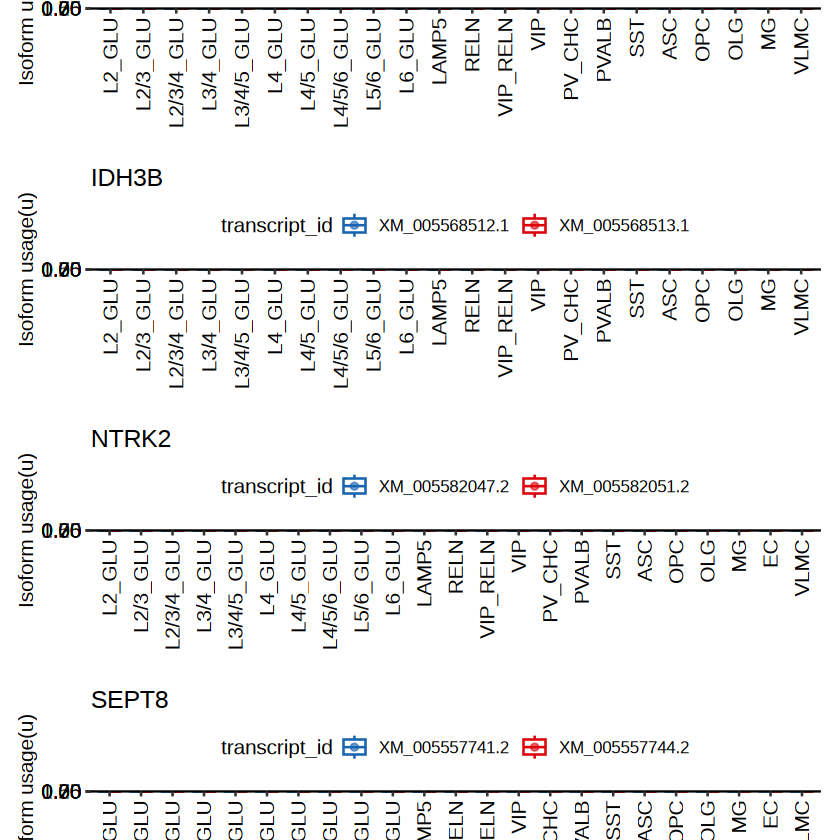

In [52]:
library(ggplot2)
library(ggpubr)
library(purrr) # 用于map函数
suborder2 = c('L2_GLU','L2/3_GLU','L2/3/4_GLU','L3/4_GLU','L3/4/5_GLU','L4_GLU','L4/5_GLU','L4/5/6_GLU','L5/6_GLU','L6_GLU','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')
# 1. 为所有基因的转录本定义一个统一的小颜色集
# 假设每个基因最多有2个转录本，我们准备2种颜色
# my_colors <- c("transcript_1" = "#1F77B4", "transcript_2" = "#FF7F0E") # 蓝色和橙色
casectt$subclass = factor(casectt$subclass,levels = suborder2)
# 2. 获取唯一的基因列表
gene_list <- unique(casectt$gene_id)

# 3. 为每个基因创建一个独立的图
plot_list <- map(gene_list, function(gene) {
  # 提取当前基因的数据
  data_sub <- casectt[casectt$gene_id == gene, ]
  
  # 获取当前基因独特的transcript_id，并将其重命名为统一的标签
  unique_transcripts <- unique(data_sub$transcript_id)
  
  # 定义一个统一的位置调整对象，确保箱线图和散点使用相同的并列规则
# width 参数控制着并列的间隔，您可以按需调整（通常 0.5-0.9 比较合适）
my_position <- position_dodge(width = 0.75)

p_single <- ggplot(data_sub, aes(x = subclass, y = rate, color = transcript_id)) +
  # 箱线图应用位置调整
  geom_boxplot(position = my_position) +
  # 散点图应用同样的位置调整，并使用 geom_point 配合 position_jitterdodge
  geom_point(
    position = position_jitterdodge(
      jitter.width = 0.2,   # 控制垂直方向抖动的强度
      dodge.width = 0.75,   # 这个值必须与上面 my_position 的 width 一致
      seed = 1             # 设置种子使随机抖动结果可重现
    ),
    size = 1.5,            # 控制点的大小
    alpha = 0.6            # 控制点的透明度，在点较多时有助于观察重叠部分
  ) +
  scale_color_discreterainbow() +
  theme_pubr() +
  ylim(0,1) +
  ylab("Isoform usage(u)") +
  xlab("") +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    legend.position = "top"
  ) +
  ggtitle(gene)

return(p_single)
})

# 4. 使用patchwork等包将所有图组合起来，它们将拥有独立的图例
# 安装并加载patchwork: install.packages("patchwork")
library(patchwork)

# 组合所有图，例如垂直排列
final_plot <- wrap_plots(plot_list, ncol = 1, guides = "collect") # guides="collect"可以尝试收集图例，但此处可能仍需独立
# 更直接的方式是让每个图保留自己的图例
final_plot <- wrap_plots(plot_list, ncol = 1)
ggexport(final_plot,filename = "result/figure3/Case_subclass_isoform_rate_stat_allslice_boxplot_25_12_02.pdf",width = 7,height = 30)
# 显示图形
print(final_plot)

In [19]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_09_04.qs")

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 130 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 97 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom

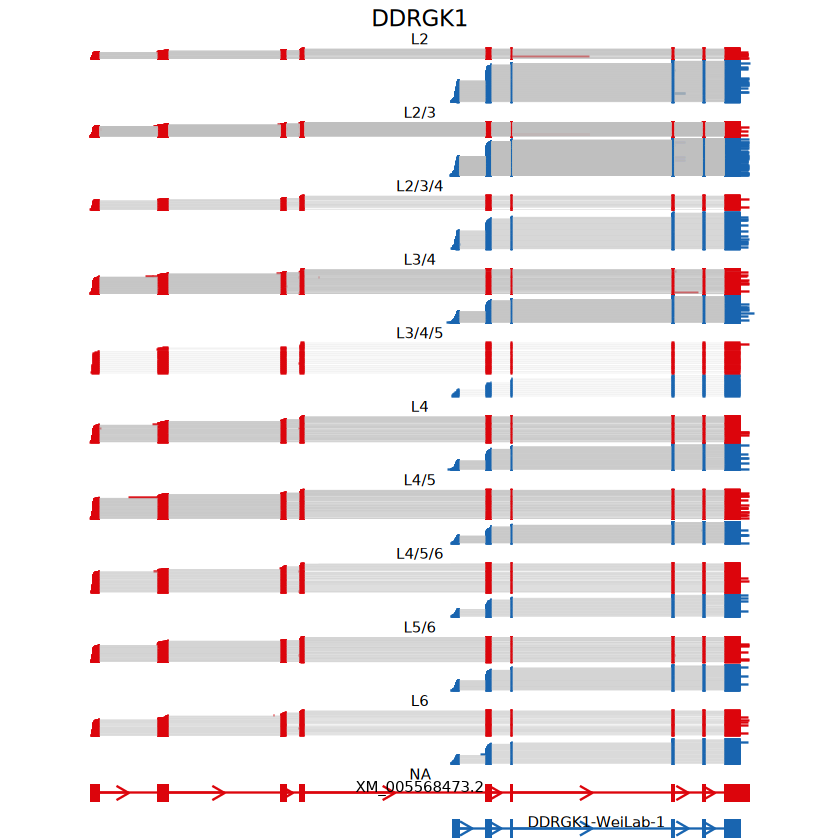

In [19]:
geneex = "DDRGK1"
mycolor = c('#1965B0','#DC050C')
grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",geneex,NULL)
grtdfl = grtdfl[grtdfl$group %in% cellan[cellan$class == "GLU",]$subclass,]
grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>2)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolor), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/case_subclass_readsplice_point_DDRGK1_25_01_28.pdf",width = 4,height = 5)

In [27]:
geneex = "TUSC3"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case",
                geneex,"_24_12_16.pdf")
grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",geneex,NULL)
#grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>3)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,NULL), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 12)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 52 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 27 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_se

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [29]:
geneex = "RBFOX1"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_",
                geneex,"_24_12_16.pdf")
grtdfl = BuildPlotBed(fsraw.cor,longbed,"class",geneex,NULL)
#grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>3)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = T,NULL), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 4)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 106 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 50 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 44 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmphekSUb/pdf144452ddb770e' for compression (reason: No such file or directory); compression has been turned off for this device"
Warning message:
"Removed 106 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning me

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 1966 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1963 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1966 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1963 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
file saved to /cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_CDC42_24_12_16.pdf



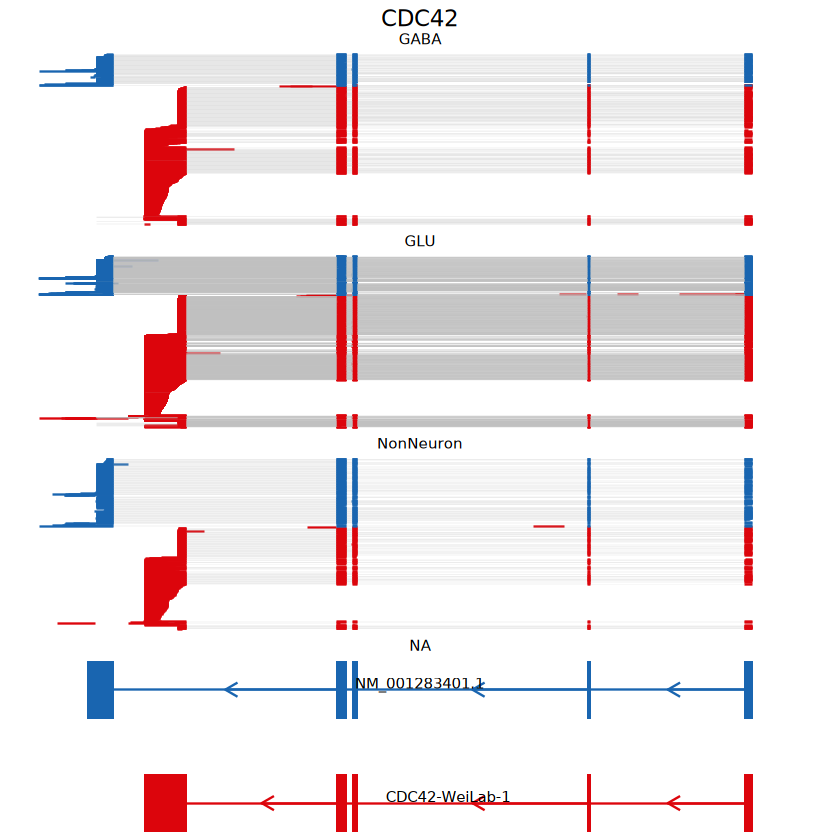

In [34]:
geneex = "CDC42"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_",
                geneex,"_24_12_16.pdf")
mycolor = c('#DC050C','#1965B0')
grtdfl = BuildPlotBed(fsraw.cor,longbed,"class",geneex,NULL)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = T,mycolor), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 4)

In [ ]:
#class
isosigi = isosigls$class
isosighub = isosigi[isosigi$sig == "Up" | isosigi$sig == "Down",]
gmksi = unique(isosighub$gene_id)
length(gmksi)
pcls.cl = list()
fsraw.cor = fsrawdp[fsrawdp$class != "",]
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"class",gmksi[i],NULL)
    pcls.cl[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
  # ggexport(parcl_casels
ggexport(pcls.cl,filename = "result/figure3/dtu_case_ls_class_24_04_21.pdf",
           width = 10,height = 8)

In [ ]:
isosigi = isosigls$subclass
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]
gmksi = unique(isosighub$gene_id)
pcls.subcl = list()
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",gmksi[i],NULL)
    pcls.subcl[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
ggexport(pcls.subcl,filename = "result/figure3/dtu_case_ls_subclass_24_04_22.pdf",
           width = 10,height = 16)

In [ ]:

fsraw.cor = fsrawdp[fsrawdp$subclass %in% cellan[cellan$class %in% c("GABA","GLU"),]$subclass,]
isosigi = isosigls.cl$GABA_GLU
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]
gmksi = unique(isosighub$gene_id)
pcls.gg = list()
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",gmksi[i],NULL)
    pcls.gg[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
ggexport(pcls.gg,filename = "result/figure3/dtu_case_ls_GLU_GABA_24_04_22.pdf",
           width = 10,height = 14)

In [ ]:
fsraw.cor = fsrawdp[fsrawdp$subclass %in% cellan[cellan$class %in% c("GABA"),]$subclass,]
isosigi = isosigls.cl$GABA_GABA
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]
gmksi = unique(isosighub$gene_id)
pcls.gaba = list()
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",gmksi[i],NULL)
    pcls.gaba[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
ggexport(pcls.gaba,filename = "result/figure3/dtu_case_ls_GABA_GABA_24_04_22.pdf",
           width = 10,height = 10)

In [ ]:
fsraw.cor = fsrawdp[fsrawdp$subclass %in% cellan[cellan$class %in% c("GLU"),]$subclass,]
isosigi = isosigls.cl$GLU_GLU
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]
gmksi = unique(isosighub$gene_id)
pcls.glu = list()
for(i in 1:length(gmksi)){
    print(i)
    grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",gmksi[i],NULL)
    pcls.glu[[i]] = tryCatch(IsoformReadPlot(gtf, grtdfl, gmksi[i],onlyhub = T), 
                                                  error = function(e) NULL)
                               
}
ggexport(pcls.glu,filename = "result/figure3/dtu_case_ls_GLU_GLU_24_04_22.pdf",
           width = 10,height = 12)

#### Summary data

In [57]:
library(writexl)
write_xlsx(datas3,"result/figure3/table_s3_metacell_dtu_total.xlsx")